# 0. Preliminaries

WARNING #1: this notebook is intended to be run through once. If you save your progress without finishing, you may need to comment out lines that you have already run, so that you don't start all over from scratch.

WARNING #2: this notebook has only been tested on Linux/Ubuntu machines. Some of the commands that are prefixed with `!` may not work on Windows or Macs.

Before installing Cactus, you need the following dependencies. On Ubuntu, run the following line in a terminal. (This has been verified on Ubuntu 16.04 and 18.04)

In [1]:
#!sudo apt-get install -y curl subversion git make patch pkg-config python numactl gcc g++ gfortran liblapack-dev libgsl-dev libfftw3-dev libhdf5-dev libjpeg-turbo?-dev libssl-dev libpapi-dev libhwloc-dev libopenmpi-dev libhdf5-openmpi-dev

Create a new folder somewhere on your machince where you want to store the Cactus directory. Once Cactus is built, its contents cannot be easily moved without breaking things. If the Cactus directory is later moved, one has to repeat the following steps to rebuild it from its new location. Once created, specify the parent directory in the following line:

In [2]:
etk_dir='/home/ejwest/ETK'

Change the working directory to the parent directory specified above.

In [3]:
!mkdir -p {etk_dir}
%cd {etk_dir}

/home/ejwest/ETK


# 1. Download Cactus

Step 1 is to download the code. Cactus uses a script named `GetComponents` to find and prepare all the source code modules that it needs for a given installation. The `GetComponents` script can be downloaded with a simple invocation of curl. To download `GetComponents`, execute the following lines.

In [4]:
!curl -kLO https://raw.githubusercontent.com/gridaphobe/CRL/ET_2019_03/GetComponents

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   99k  100   99k    0     0  25389      0  0:00:04  0:00:04 --:--:-- 25389


Step 2 is to download your thornlist. In this tutorial, we are going to use the Einstein Toolkit, a collection of thorns designed to solve the Einstein equations numerically. To download the thornlist, called `einsteintoolkit.th`, execute the following lines.

In [5]:
!curl -kLO https://bitbucket.org/einsteintoolkit/manifest/raw/ET_2019_03/einsteintoolkit.th

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16039  100 16039    0     0   6904      0  0:00:02  0:00:02 --:--:--  6904


You can view a file in the notebook by using the "magic" command `%pycat <filename>`. However, `%pycat` tries to highlight syntax as if the file is written in python. Alternatively you can simply use `%cat <filename>` to view a file. Unfortunately, unlike `%pycat`, `%cat` leaves the contents of the file on the screen. Throughout this tutorial we will often use `%pycat` to view files and just ignore the syntax highlighting.

To view the downloaded thornlist using `%pycat`, uncomment and execute the following lines. Note that at the top of the file is a line that reads `DEFINE_ROOT = Cactus`. This means that Cactus, and all its thorns, will be checked out under that directory.

In [6]:
%pycat einsteintoolkit.th

Step 3 is to checkout the components listed in the thornlist. You do this with the `GetComponents` script.
However before you can execute it, you need to turn on its execute bit. That is what the `chmod` line below does. To run `GetComponents`, execute the following lines.

In [7]:
!chmod a+x GetComponents
!echo no|./GetComponents --update einsteintoolkit.th

-----------------------------------------------------------------
  Checking out module: ExternalLibraries/HDF5
      from repository: https://github.com/EinsteinToolkit/ExternalLibraries-HDF5.git/trunk
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: ExternalLibraries/OpenCL
      from repository: https://github.com/EinsteinToolkit/ExternalLibraries-OpenCL.git/trunk
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusBase/Boundary
      from repository: https://bitbucket.org/cactuscode/cactusbase.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CTThorns/CT_Analytic
      from repository: https://bitbucket.org/eloisa/ctthorns.git
                 into: Cactus/arrangements
---------------------------------------------------------------

-----------------------------------------------------------------
  Checking out module: CactusUtils/OpenCLRunTime
      from repository: https://bitbucket.org/cactuscode/cactusutils.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusUtils/Formaline
      from repository: https://bitbucket.org/cactuscode/cactusutils.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusUtils/MemSpeed
      from repository: https://bitbucket.org/cactuscode/cactusutils.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusUtils/NaNCatcher
      from repository: https://bitbucket.org/cactuscode/cactusutils.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: Cac

-----------------------------------------------------------------
  Checking out module: ExternalLibraries/LAPACK
      from repository: https://github.com/EinsteinToolkit/ExternalLibraries-LAPACK.git/trunk
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: McLachlan/m
      from repository: https://bitbucket.org/einsteintoolkit/mclachlan.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: McLachlan/par
      from repository: https://bitbucket.org/einsteintoolkit/mclachlan.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: McLachlan/ML_WaveToy_CL
      from repository: https://bitbucket.org/einsteintoolkit/mclachlan.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking ou

-----------------------------------------------------------------
  Checking out module: ExternalLibraries/OpenBLAS
      from repository: https://github.com/EinsteinToolkit/ExternalLibraries-OpenBLAS.git/trunk
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusTest/TestAllTypes
      from repository: https://bitbucket.org/cactuscode/cactustest.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusTest/TestArrays
      from repository: https://bitbucket.org/cactuscode/cactustest.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusTest/TestComplex
      from repository: https://bitbucket.org/cactuscode/cactustest.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  

-----------------------------------------------------------------
  Checking out module: ./simfactory
      from repository: https://bitbucket.org/simfactory/simfactory2.git
                 into: Cactus
                   as: simfactory2
-----------------------------------------------------------------
  Checking out module: CactusIO/IOJpeg
      from repository: https://bitbucket.org/cactuscode/cactusio.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: EinsteinEOS/EOS_Hybrid
      from repository: https://bitbucket.org/einsteintoolkit/einsteineos.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: EinsteinEOS/EOS_IdealFluid
      from repository: https://bitbucket.org/einsteintoolkit/einsteineos.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking

-----------------------------------------------------------------
  Checking out module: WVUThorns_Diagnostics/Seed_Magnetic_Fields_BNS
      from repository: https://bitbucket.org/zach_etienne/wvuthorns_diagnostics.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: Carpet/Carpet
      from repository: https://bitbucket.org/eschnett/carpet.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: Carpet/CarpetEvolutionMask
      from repository: https://bitbucket.org/eschnett/carpet.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: Carpet/CarpetIOASCII
      from repository: https://bitbucket.org/eschnett/carpet.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out mod

-----------------------------------------------------------------
  Checking out module: EinsteinInitialData/IDLinearWaves
      from repository: https://bitbucket.org/einsteintoolkit/einsteininitialdata.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: EinsteinInitialData/Meudon_Bin_BH
      from repository: https://bitbucket.org/einsteintoolkit/einsteininitialdata.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: EinsteinInitialData/Meudon_Bin_NS
      from repository: https://bitbucket.org/einsteintoolkit/einsteininitialdata.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: EinsteinInitialData/Meudon_Mag_NS
      from repository: https://bitbucket.org/einsteintoolkit/einsteininitialdata.git
                 into: Cactus/arrangeme

-----------------------------------------------------------------
  Checking out module: CactusWave/WaveToyF77
      from repository: https://bitbucket.org/cactuscode/cactuswave.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusWave/WaveToyF90
      from repository: https://bitbucket.org/cactuscode/cactuswave.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusWave/WaveToyFreeF90
      from repository: https://bitbucket.org/cactuscode/cactuswave.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusPUGH/PUGH
      from repository: https://bitbucket.org/cactuscode/cactuspugh.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: Numerical/AEI

In what follows, it will be useful to have a shortcut variable for the `Cactus` directory. All simulations are launched from this directory. To create a shortcut variable, edit and execute the following line.

In [8]:
cactus_dir='/home/ejwest/ETK/Cactus'

Move to the `Cactus` directory.

In [9]:
%cd {cactus_dir}

/home/ejwest/ETK/Cactus


# 2. Configure Simfactory

Cactus is normally built with a tool called Simfactory. Simfactory, in turn, will call make.
Before it can work, however, it needs to be configured. To configure Simfactory, edit and execute the following lines. Replace the email address in the command below with yours and then execute. (The email address isn't sent anywhere, all it's used for is allowing Cactus to send job change state notifications to you.)

In [10]:
!./simfactory/bin/sim setup-silent --setup-email=ewest@d.umn.edu 

Unknown machine name newton


Here we will define some necessary Simulation Factory defaults.


Determining local machine name: newton
Creating machine newton from generic: machine newton [/home/ejwest/ETK/Cactus/repos/simfactory2/mdb/machines/newton.ini] created successfully

--------------------SUMMARY--------------------:


[default]
user            = ejwest
email           = ewest@d.umn.edu
allocation      = NO_ALLOCATION


------------------END SUMMARY------------------:

Contents successfully written to /home/ejwest/ETK/Cactus/repos/simfactory2/etc/defs.local.ini


The above command created a machine-specific file `<machine>.ini` (where `<machine>` is the name of your machine) stored in the machine database, located at `simfactory/mdb/machines`. Your machine name can be identified using the following.

In [26]:
!hostname

newton


Let's create a shortcut variable for the `<machine>.ini` file. Change the name of the `<machine>.ini` file in the path below to your machine name, returned by the hostname command above.

In [27]:
mdb_file='/home/ejwest/ETK/Cactus/simfactory/mdb/machines/newton.ini'
!echo {mdb_file}

/home/ejwest/ETK/Cactus/simfactory/mdb/machines/newton.ini


One of the things you may want to change in your mdb file is the directory where simulation output data are dumped. By default, a folder named `simulations` is created in your home directory for this purpose. If you want output data to be printed elsewhere, change the `basedir` entry in the mdb file. To do this, first define a shortcut variable for the desired path.

In [28]:
basedir='/home/ejwest/ETK/simulations'

You may also want to change the number of `procs` for your machine, that is, the number of logical cores on your machine (number of physical cores times 2 if your CPU allows hyperthreading, otherwise just the number of physical cores).

In [29]:
ppn=2
maxnumthreads=2
numthreads=2

Now run the following script to update the mdb file.

In [30]:
# uncomment these lines if you changed basedir
!awk -n '/^basedir *=/ {{gsub($3, "'{basedir}'")}}; {{print}}' $mdb_file > {mdb_file}.tmp
%mv {mdb_file}.tmp {mdb_file}

# uncomment these lines if you changed ppn
!awk -n '/^ppn *=/ {{gsub($3, "'{ppn}'")}}; \
         /^max-num-threads *=/ {{gsub($3, "'{maxnumthreads}'")}}; \
         /^num-threads *=/ {{gsub($3, "'{numthreads}'")}}; \
         {{print}}' $mdb_file > {mdb_file}.tmp
%mv {mdb_file}.tmp {mdb_file}

View the mdb file using `%pycat` and verify that the change (if any) stuck.

In [31]:
%pycat {mdb_file}

# 3. Building Cactus

At long last, you are ready to actually build Cactus. Cactus can often figure out what compilers and build
options to use automatically, but in some cases it is necessary to specify it by hand. The file containing this information is called the `OptionList`. You can specify an `OptionList` by hand using the `--optionlist=filename.cfg` option in the command below. OptionList examples are found in `Cactus/simfactory/mdb/optionlists`. A good template to start with on a workstation is `generic.cfg`. Here we will assume that Cactus is smart enough to figure things out on its own, without any OptionList intervention.

To start from a clean slate and remove any previous configurations, uncomment and execute the following lines.

In [34]:
%cd {cactus_dir}
%rm -rf configs

/home/ejwest/ETK/Cactus


Finally, below is the command to build Cactus using our thornlist. As written, it will build in parallel using two processes. That's what the `-j` option does. If all goes well, this step takes a while. Go get a coffee and come back in 30 minutes or so! To proceed to build Cactus, uncomment and execute the following lines.

In [35]:
!time ./simfactory/bin/sim build -j2 --thornlist=thornlists/einsteintoolkit.th

Using configuration: sim
Reconfiguring sim
Writing configuration to: /home/ejwest/ETK/Cactus/configs/sim/OptionList
Cactus - version: 4.2.3
Reconfiguring sim.
Adding configuration options from '/home/ejwest/ETK/Cactus/configs/sim/OptionList'...
  Setting VERSION to '2018-12-13'
  Setting CPP to 'cpp'
  Setting CC to 'gcc'
  Setting CXX to 'g++'
  Setting FPP to 'cpp'
  Setting F90 to 'gfortran'
  Setting CPPFLAGS to ''
  Setting FPPFLAGS to '-traditional'
  Setting CFLAGS to '-g -std=gnu99'
  Setting CXXFLAGS to '-g -std=gnu++11'
  Setting F90FLAGS to '-g -fcray-pointer -ffixed-line-length-none'
  Setting LDFLAGS to '-rdynamic'
  Setting DEBUG to 'no'
  Setting CPP_DEBUG_FLAGS to ''
  Setting C_DEBUG_FLAGS to ''
  Setting CXX_DEBUG_FLAGS to ''
  Setting OPTIMISE to 'yes'
  Setting CPP_OPTIMISE_FLAGS to ''
  Setting C_OPTIMISE_FLAGS to '-O2'
  Setting CXX_OPTIMISE_FLAGS to '-O2'
  Setting F90_OPTIMISE_FLAGS to '-O2'
  Setting PROFILE to 'no'
  Setting CPP_PROFILE_FLAGS to ''
  Setting C

checking for isnormal in header math.h and library m... yes
checking for signbit in header math.h and library m... yes
checking for mkstemp... yes
checking for va_copy... yes
creating cctk_Archdefs.h
creating make.arch.defn
creating cctk_Extradefs.h
creating make.extra.defn
updating cache ./config.cache
creating ./config.status
creating make.config.defn
creating make.config.deps
creating make.config.rules
creating cctk_Config.h
Determining number of fortran underscores...
Compiling test file with gfortran -g -fcray-pointer -ffixed-line-length-none ...
Lowercase - One trailing underscore
Compiling test file with gfortran -g -fcray-pointer -ffixed-line-length-none ...
Lowercase - One trailing underscore
Use make sim to build the configuration.
Complete rebuild required
Cleaning sim
Cleaning configuration sim
Deleting all built files in /home/ejwest/ETK/Cactus/configs/sim
Updated script file for configuration sim
Updated runscript file for configuration sim
Updated thorn list for configur

   ModifiedSchwarzschildBL
           Requires:          GenericFD 
           Optional:          LoopControl 
   Multipole
           Optional:          HDF5 
   NPScalars
   NPScalars_Proca
   NaNChecker
           Provides:          NaNChecker 
   NewRad
           Requires:          GenericFD 
   NoExcision
           Optional-ifactive: Carpet 
   NoMPI
           Optional:          MPI 
   NullConstr
           Requires thorns:   Fortran NullEvolve NullGrid NullInterp
   NullEvolve
           Requires thorns:   Fortran NullDecomp NullGrid NullInterp
   NullExact
           Requires thorns:   Fortran NullEvolve NullGrid NullInterp
   NullGrid
           Provides:          NullGrid 
           Requires thorns:   Fortran
   NullInterp
           Provides:          NullInterp 
           Requires:          Fortran 
           Requires thorns:   NullGrid
   NullNews
           Requires:          MPI 
           Requires thorns:   NullDecomp NullGrid NullInterp
   NullPsiInt
           

           Implements: interp2
           0 Public, 0 Protected, 0 Private variable groups
   CarpetLib
           Implements: CarpetLib
           0 Public, 0 Protected, 0 Private variable groups
   CarpetMask
           Implements: CarpetMask
           Inherits:  grid SphericalSurface 
           0 Public, 0 Protected, 0 Private variable groups
   CarpetProlongateTest
           Implements: CarpetProlongateTest
           Inherits:  grid 
           0 Public, 0 Protected, 6 Private variable groups
   CarpetReduce
           Implements: reduce
           0 Public, 0 Protected, 4 Private variable groups
   CarpetRegrid
           Implements: CarpetRegrid
           0 Public, 0 Protected, 0 Private variable groups
   CarpetRegrid2
           Implements: CarpetRegrid2
           6 Public, 0 Protected, 6 Private variable groups
   CarpetRegridTest
           Implements: CarpetRegridTest
           Inherits:  grid 
           0 Public, 0 Protected, 1 Private variable groups
   CarpetSlab


           Implements: IDScalarWaveElliptic
           Inherits:  Grid WaveToy EllBase IDScalarWave 
           0 Public, 0 Protected, 2 Private variable groups
   IDWaveMoL
           Implements: idwavemol
           Inherits:  wavemol grid 
           0 Public, 0 Protected, 0 Private variable groups
   ID_converter_GiRaFFE
           Implements: ID_converter_GiRaFFE
           Inherits:  ADMBase Boundary SpaceMask Tmunubase HydroBase grid GiRaFFE 
           0 Public, 0 Protected, 0 Private variable groups
   ID_converter_ILGRMHD
           Implements: ID_converter_ILGRMHD
           Inherits:  ADMBase Boundary SpaceMask Tmunubase HydroBase grid IllinoisGRMHD 
           0 Public, 0 Protected, 0 Private variable groups
   IOASCII
           Implements: IOASCII
           0 Public, 0 Protected, 0 Private variable groups
   IOBasic
           Implements: IOBasic
           Inherits:  IO 
           0 Public, 0 Protected, 2 Private variable groups
   IOHDF5
           Implements: IOHDF5

           Implements: NullNews
           Inherits:  NullGrid NullVars NullInterp 
           18 Public, 0 Protected, 7 Private variable groups
   NullPsiInt
           Implements: NullPsiInt
           Inherits:  NullVars NullGrid NullNews NullInterp NullEvolve 
           3 Public, 0 Protected, 4 Private variable groups
   NullSHRExtract
           Implements: NullSHRExtract
           Inherits:  NullInterp NullGrid NullVars 
           8 Public, 20 Protected, 27 Private variable groups
   NullVars
           Implements: NullVars
           4 Public, 0 Protected, 0 Private variable groups
   OpenSSL
           Implements: OpenSSL
           0 Public, 0 Protected, 0 Private variable groups
   Outflow
           Implements: outflow
           Inherits:  ADMBase HydroBase SphericalSurface 
           0 Public, 0 Protected, 5 Private variable groups
   PAPI
           Implements: PAPI
           0 Public, 0 Protected, 0 Private variable groups
   PUGH
           Implements: Driver
     

           Implements: TestLoop
           Inherits:  grid 
           0 Public, 0 Protected, 3 Private variable groups
   TestLoopControl
           Implements: TestLoopControl
           Inherits:  grid 
           0 Public, 0 Protected, 3 Private variable groups
   TestMath
           Implements: TestMath
           0 Public, 0 Protected, 0 Private variable groups
   TestMoL
           Implements: TestMoL
           Inherits:  MethodOfLines 
           0 Public, 0 Protected, 16 Private variable groups
   TestPar
           Implements: TestPar
           0 Public, 0 Protected, 0 Private variable groups
   TestReduce
           Implements: testreduce
           0 Public, 0 Protected, 8 Private variable groups
   TestSchedule
           Implements: TestSchedule
           0 Public, 0 Protected, 0 Private variable groups
   TestStrings
           Implements: teststrings
           0 Public, 0 Protected, 0 Private variable groups
   TestTable
           Implements: TestTable
           0

          0 Global, 0 Restricted, 44 Private parameters
   CoordGauge
          0 Global, 2 Restricted, 1 Private parameters
   Coordinates
          0 Global, 1 Restricted, 71 Private parameters
   CoordinatesSymmetry
          0 Global, 0 Restricted, 6 Private parameters
   CycleClock
          0 Global, 0 Restricted, 1 Private parameters
   DemoInterp
          0 Global, 0 Restricted, 3 Private parameters
   Dissipation
          0 Global, 18 Restricted, 0 Private parameters
   DistortedBHIVP
          0 Global, 0 Restricted, 11 Private parameters
   EHFinder
          0 Global, 3 Restricted, 56 Private parameters
   EOS_Base
          0 Global, 0 Restricted, 0 Private parameters
   EOS_Hybrid
          0 Global, 3 Restricted, 0 Private parameters
   EOS_IdealFluid
          0 Global, 1 Restricted, 0 Private parameters
   EOS_Omni
          0 Global, 28 Restricted, 0 Private parameters
   EOS_Polytrope
          0 Global, 4 Restricted, 0 Private parameters
   EinsteinExact_Test
    

          0 Global, 0 Restricted, 0 Private parameters
   Periodic
          0 Global, 0 Restricted, 8 Private parameters
   PeriodicCarpet
          0 Global, 0 Restricted, 5 Private parameters
   Poisson
          0 Global, 0 Restricted, 4 Private parameters
   ProcaBase
          0 Global, 10 Restricted, 0 Private parameters
   ProcaEvolve
          0 Global, 3 Restricted, 6 Private parameters
   Proca_simpleID
          0 Global, 7 Restricted, 0 Private parameters
   PunctureTracker
          0 Global, 0 Restricted, 10 Private parameters
   QuasiLocalMeasures
          0 Global, 0 Restricted, 13 Private parameters
   ReductionTest
          0 Global, 0 Restricted, 0 Private parameters
   ReductionTest2
          0 Global, 0 Restricted, 0 Private parameters
   ReductionTest3
          0 Global, 0 Restricted, 0 Private parameters
   ReflectionSymmetry
          0 Global, 0 Restricted, 13 Private parameters
   RegridSyncTest
          0 Global, 0 Restricted, 0 Private parameters
   Ro

          15 schedule blocks.
   CarpetRegrid
          1 schedule blocks.
   CarpetRegrid2
          2 schedule blocks.
   CarpetRegridTest
          3 schedule blocks.
   CarpetSlab
          0 schedule blocks.
   CarpetTracker
          1 schedule blocks.
   CartGrid3D
          11 schedule blocks.
   Cartoon2D
          6 schedule blocks.
   Constants
          0 schedule blocks.
   Convert_to_HydroBase
          2 schedule blocks.
   CoordBase
          1 schedule blocks.
   CoordGauge
          8 schedule blocks.
   Coordinates
          26 schedule blocks.
   CoordinatesSymmetry
          2 schedule blocks.
   CycleClock
          1 schedule blocks.
   DemoInterp
          6 schedule blocks.
   Dissipation
          6 schedule blocks.
   DistortedBHIVP
          2 schedule blocks.
   EHFinder
          86 schedule blocks.
   EOS_Base
          0 schedule blocks.
   EOS_Hybrid
          2 schedule blocks.
   EOS_IdealFluid
          1 schedule blocks.
   EOS_Omni
          6 sche

          7 schedule blocks.
   TestPar
          2 schedule blocks.
   TestReduce
          5 schedule blocks.
   TestSchedule
          19 schedule blocks.
   TestStrings
          1 schedule blocks.
   TestTable
          1 schedule blocks.
   TestTimers
          3 schedule blocks.
   TestTypes
          2 schedule blocks.
   Time
          7 schedule blocks.
   TimerInfo
          1 schedule blocks.
   TimerReport
          3 schedule blocks.
   Timers
          2 schedule blocks.
   TmunuBase
          7 schedule blocks.
   Trigger
          3 schedule blocks.
   TwoPunctures
          5 schedule blocks.
   TwoPunctures_KerrProca
          5 schedule blocks.
   Vaidya2
          10 schedule blocks.
   Vectors
          2 schedule blocks.
   VolumeIntegrals_GRMHD
          10 schedule blocks.
   VolumeIntegrals_vacuum
          10 schedule blocks.
   WatchDog
          1 schedule blocks.
   WaveBinarySource
          1 schedule blocks.
   WaveExtractL
          17 schedule blocks.

dtbmv.f:210:0:

       INTEGER I,INFO,IX,J,JX,KPLUS1,KX,L
 
dtbsv.f:213:0:

       INTEGER I,INFO,IX,J,JX,KPLUS1,KX,L
 
dtpmv.f:166:0:

       INTEGER I,INFO,IX,J,JX,K,KK,KX
 
dtpsv.f:168:0:

       INTEGER I,INFO,IX,J,JX,K,KK,KX
 
dtrmv.f:171:0:

       INTEGER I,INFO,IX,J,JX,KX
 
dtrsv.f:167:0:

       INTEGER I,INFO,IX,J,JX,KX
 
sdsdot.f:228:18:

          SDSDOT = DSDOT
                  1
sdsdot.f:253:15:

       SDSDOT = DSDOT
               1
srotmg.f:225:0:

                   SH22 = SH22*GAM
 
srotmg.f:224:0:

                   SH21 = SH21*GAM
 
srotmg.f:202:0:

                   SH12 = SH12*GAM
 
srotmg.f:201:0:

                   SH11 = SH11*GAM
 
srotmg.f:184:0:

                IF (SFLAG.EQ.ZERO) THEN
 
sspr.f:152:0:

       INTEGER I,INFO,IX,J,JX,K,KK,KX
 
sspr2.f:167:0:

       INTEGER I,INFO,IX,IY,J,JX,JY,K,KK,KX,KY
 
sspr2.f:167:0: Warning: ‘kx’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sspr2.f:167:0: Warning: ‘jy’ may be used uninitialized 

ztpmv.f:166:0:

       INTEGER I,INFO,IX,J,JX,K,KK,KX
 
ztpsv.f:168:0:

       INTEGER I,INFO,IX,J,JX,K,KK,KX
 
ztrmv.f:171:0:

       INTEGER I,INFO,IX,J,JX,KX
 
ztrsv.f:173:0:

       INTEGER I,INFO,IX,J,JX,KX
 
BLAS: Installing...
~/ETK/Cactus/configs/sim/scratch
BLAS: Cleaning up...
BLAS: Done.
Finished running configuration script for thorn BLAS.

********************************************************************************
Running configuration script for thorn FFTW3:
FFTW3 selected, but FFTW3_DIR not set. Checking some places...
Found FFTW3 in /usr
Finished running configuration script for thorn FFTW3.

********************************************************************************
Running configuration script for thorn FORTRAN:
Found a traditional Fortran cpp
Finished running configuration script for thorn FORTRAN.

********************************************************************************
Running configuration script for thorn GSL:
GSL selected, but GSL_DIR not set. 

cgelss.f:447:0:

          IF( M.GE.MNTHR ) THEN
 
cgeqlf.f:158:0:

      $                   MU, NB, NBMIN, NU, NX
 
cgerfsx.f:496:23:

             REF_TYPE = PARAMS( LA_LINRX_ITREF_I )
                       1
cgerqf.f:158:0:

      $                   MU, NB, NBMIN, NU, NX
 
cgesvd.f:325:25:

             LWORK_CGEQRF=DUM(1)
                         1
cgesvd.f:328:27:

             LWORK_CUNGQR_N=DUM(1)
                           1
cgesvd.f:330:27:

             LWORK_CUNGQR_M=DUM(1)
                           1
cgesvd.f:334:25:

             LWORK_CGEBRD=DUM(1)
                         1
cgesvd.f:338:27:

             LWORK_CUNGBR_P=DUM(1)
                           1
cgesvd.f:341:27:

             LWORK_CUNGBR_Q=DUM(1)
                           1
cgesvd.f:449:28:

                LWORK_CGEBRD=DUM(1)
                            1
cgesvd.f:454:33:

                   LWORK_CUNGBR_Q=DUM(1)
                                 1
cgesvd.f:460:33:

                   LWORK_CUNGBR_Q=DUM(1)

cgglse.f:282:13:

       LOPT = WORK( P+MN+1 )
             1
cggqrf.f:282:13:

       LOPT = WORK( 1 )
             1
cggrqf.f:281:13:

       LOPT = WORK( 1 )
             1
chbev.f:226:21:

             W( 1 ) = AB( 1, 1 )
                     1
chbev.f:228:21:

             W( 1 ) = AB( KD+1, 1 )
                     1
chbevd.f:326:18:

          W( 1 ) = AB( 1, 1 )
                  1
chbevx.f:378:21:

             W( 1 ) = CTMP1
                     1
chbtrd.f:462:21:

             D( I ) = AB( KD1, I )
                     1
chbtrd.f:669:21:

             D( I ) = AB( 1, I )
                     1
cheequb.f:263:16:

           AVG = AVG + S( I )*WORK( I )
                1
cheequb.f:280:15:

           C1 = ( N-2 ) * ( WORK( I ) - T*SI )
               1
cheequb.f:281:15:

           C0 = -(T*SI)*SI + 2*WORK( I )*SI - N*AVG
               1
cheequb.f:315:16:

           AVG = AVG + ( U + WORK( I ) ) * D / N
                1
cheev.f:227:18:

          W( 1 ) = A( 1, 1 )
        

chetf2.f:204:0:

       INTEGER            I, IMAX, J, JMAX, K, KK, KP, KSTEP
 
chetrd.f:331:24:

                D( J ) = A( J, J )
                        1
chetrd.f:363:24:

                D( J ) = A( J, J )
                        1
chgeqz.f:854:0:

             IF( ILZ )
 
chgeqz.f:796:0:

             IF( ILQ ) THEN
 
chgeqz.f:688:0:

          IF( .NOT.ILSCHR ) THEN
 
chpev.f:209:18:

          W( 1 ) = AP( 1 )
                  1
chpevd.f:306:18:

          W( 1 ) = AP( 1 )
                  1
chpevx.f:331:21:

             W( 1 ) = AP( 1 )
                     1
chpevx.f:335:24:

                W( 1 ) = AP( 1 )
                        1
chpgst.f:188:21:

                BJJ = BP( JJ )
                     1
chpgst.f:209:21:

                AKK = AP( KK )
                     1
chpgst.f:210:21:

                BKK = BP( KK )
                     1
chpgst.f:240:21:

                AKK = AP( KK )
                     1
chpgst.f:241:21:

                BKK = BP( KK )
       

claic1.f:197:21:

                TMP = SQRT( S*CONJG( S )+C*CONJG( C ) )
                     1
claic1.f:251:19:

                T = C / ( B+SQRT( B*B+C ) )
                   1
claic1.f:253:19:

                T = SQRT( B*B+C ) - B
                   1
claic1.f:258:18:

             TMP = SQRT( SINE*CONJG( SINE )+COSINE*CONJG( COSINE ) )
                  1
claic1.f:283:18:

             TMP = SQRT( S*CONJG( S )+C*CONJG( C ) )
                  1
claic1.f:341:19:

                T = C / ( B+SQRT( ABS( B*B-C ) ) )
                   1
claic1.f:352:22:

                   T = -C / ( B+SQRT( B*B+C ) )
                      1
claic1.f:354:22:

                   T = B - SQRT( B*B+C )
                      1
claic1.f:360:18:

             TMP = SQRT( SINE*CONJG( SINE )+COSINE*CONJG( COSINE ) )
                  1
clals0.f:413:0:

      $                            DIFRJ ) / ( POLES( I, 2 )+DJ )
 
clangb.f:150:0:

       REAL               SCALE, SUM, VALUE, TEMP
 
clange.f:140:0:

    

cpotf2.f:180:18:

             AJJ = REAL( A( J, J ) ) - CDOTC( J-1, A( 1, J ), 1,
                  1
cpotf2.f:207:18:

             AJJ = REAL( A( J, J ) ) - CDOTC( J-1, A( J, 1 ), LDA,
                  1
cppsvx.f:393:0:

                SCOND = MAX( SMIN, SMLNUM ) / MIN( SMAX, BIGNUM )
 
cppsvx.f:393:0: Warning: ‘bignum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
cpptrf.f:195:18:

             AJJ = REAL( AP( JJ ) ) - CDOTC( J-1, AP( JC ), 1, AP( JC ),
                  1
cpptri.f:167:18:

             AJJ = AP( JJ )
                  1
cspr.f:156:0:

       INTEGER            I, INFO, IX, J, JX, K, KK, KX
 
csptrf.f:600:0:

             IPIV( K ) = KP
 
csptrf.f:287:0:

                KPC = ( IMAX-1 )*IMAX / 2 + 1
 
cstegr.f:256:23:

      $           ABSTOL, M, W, Z, LDZ, ISUPPZ, WORK, LWORK, IWORK,
                       1
cstein.f:400:0:

             IF( ABS( XJ-XJM ).GT.ORTOL )
 
cstein.f:400:0: Warning: ‘xjm’ may be used uninitialized in this functio

cungbr.f:240:18:

          LWKOPT = WORK( 1 )
                  1
cungql.f:220:0:

             IWS = LDWORK*NB
 
cungrq.f:220:0:

             IWS = LDWORK*NB
 
cunmql.f:281:0:

          IWS = NW*NB
 
cunmrq.f:282:0:

          IWS = NW*NB
 
dbdsdc.f:461:0:

      $                      WORK( WSTART ), IWORK, INFO )
 
dbdsdc.f:461:0: Warning: ‘poles’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dbdsdc.f:461:0: Warning: ‘ivt’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dbdsdc.f:461:0: Warning: ‘is’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dbdsdc.f:461:0: Warning: ‘ic’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dbdsdc.f:461:0: Warning: ‘givnum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dbdsdc.f:461:0: Warning: ‘givcol’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dbdsdc.f:461:0: Warning: ‘difr’ may be used uninitialized in this function [-Wmaybe

dgelss.f:444:0:

          IF( M.GE.MNTHR ) THEN
 
dgeqlf.f:158:0:

      $                   MU, NB, NBMIN, NU, NX
 
dgerfsx.f:496:23:

             REF_TYPE = PARAMS( LA_LINRX_ITREF_I )
                       1
dgerqf.f:158:0:

      $                   MU, NB, NBMIN, NU, NX
 
dgesdd.f:1350:0:

      $                           WORK( IL ), M )
 
dgesdd.f:922:0:

      $                           WORK( IR ), LDWRKR )
 
dgesdd.f:559:0:

          IF( M.GE.MNTHR ) THEN
 
dgesdd.f:610:0:

                   LDWRKR = ( LWORK-N*N-3*N-BDSPAC ) / N
 
dgesvd.f:317:25:

             LWORK_DGEQRF=DUM(1)
                         1
dgesvd.f:320:27:

             LWORK_DORGQR_N=DUM(1)
                           1
dgesvd.f:322:27:

             LWORK_DORGQR_M=DUM(1)
                           1
dgesvd.f:326:25:

             LWORK_DGEBRD=DUM(1)
                         1
dgesvd.f:330:27:

             LWORK_DORGBR_P=DUM(1)
                           1
dgesvd.f:334:27:

             LWORK_DORGBR_Q=D

dggbal.f:528:14:

          IR = LSCALE( I ) + SIGN( HALF, LSCALE( I ) )
              1
dggbal.f:536:14:

          JC = RSCALE( I ) + SIGN( HALF, RSCALE( I ) )
              1
dggglm.f:287:13:

       LOPT = WORK( M+NP+1 )
             1
dgglse.f:282:13:

       LOPT = WORK( P+MN+1 )
             1
dggqrf.f:282:13:

       LOPT = WORK( 1 )
             1
dggrqf.f:281:13:

       LOPT = WORK( 1 )
             1
dhgeqz.f:1334:0:

             IF( ILZ ) THEN
 
dhgeqz.f:825:0:

             IF( ILQ ) THEN
 
dhgeqz.f:713:0:

          IF( .NOT.ILSCHR ) THEN
 
dlaebz.f:319:45:

      $                   RELTOL, PIVMIN, D, E, E2, NVAL, AB, C, MOUT,
                                             1
dlaed0.f:197:0:

      $                   IGIVPT, INDXQ, IPERM, IPRMPT, IQ, IQPTR, IWREM,
 
dlaed0.f:197:0: Warning: ‘iqptr’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dlaed0.f:197:0: Warning: ‘iq’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dlaed0.f:19

dlarrc.f:136:54:

       SUBROUTINE DLARRC( JOBT, N, VL, VU, D, E, PIVMIN,
                                                      1
dlarrd.f:737:0:

                IF( W( JE ).GE.WUL .AND. IDISCU.GT.0 ) THEN
 
dlarrd.f:720:0:

                IF( W( JE ).LE.WLU .AND. IDISCL.GT.0 ) THEN
 
dlarre.f:390:0:

      $       ((IRANGE.EQ.VALRNG).AND.(D(1).GT.VL).AND.(D(1).LE.VU)).OR.
 
dlarrv.f:280:34:

       SUBROUTINE DLARRV( N, VL, VU, D, L, PIVMIN,
                                  1
dlaruv.f:441:0:

       ISEED( 4 ) = IT4
 
dlaruv.f:440:0:

       ISEED( 3 ) = IT3
 
dlaruv.f:439:0:

       ISEED( 2 ) = IT2
 
dlaruv.f:438:0:

       ISEED( 1 ) = IT1
 
dlasd2.f:300:0:

       INTEGER            CT, I, IDXI, IDXJ, IDXJP, J, JP, JPREV, K2, M,
 
dlasd4.f:304:0:

          TAU = TAU2 / ( D( N )+SQRT( D( N )*D( N )+TAU2 ) )
 
dlasd7.f:310:0:

       INTEGER            I, IDXI, IDXJ, IDXJP, J, JP, JPREV, K2, M, N,
 
dlasd8.f:325:0:

      $                   / ( DSIGMA( I )+DJ )
 
dlasq4.f:420:

dormrq.f:280:0:

          IWS = NW*NB
 
dormrz.f:304:0:

          IWS = NW*NB
 
dpbsvx.f:432:0:

                SCOND = MAX( SMIN, SMLNUM ) / MIN( SMAX, BIGNUM )
 
dpbsvx.f:432:0: Warning: ‘bignum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dporfsx.f:475:23:

             REF_TYPE = PARAMS( LA_LINRX_ITREF_I )
                       1
dposvx.f:394:0:

                SCOND = MAX( SMIN, SMLNUM ) / MIN( SMAX, BIGNUM )
 
dposvx.f:394:0: Warning: ‘bignum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dppsvx.f:394:0:

                SCOND = MAX( SMIN, SMLNUM ) / MIN( SMAX, BIGNUM )
 
dppsvx.f:394:0: Warning: ‘bignum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dspgvd.f:313:14:

       LWMIN = MAX( DBLE( LWMIN ), DBLE( WORK( 1 ) ) )
              1
dspgvd.f:314:15:

       LIWMIN = MAX( DBLE( LIWMIN ), DBLE( IWORK( 1 ) ) )
               1
dsptrf.f:597:0:

             IPIV( K ) = KP
 
dsptrf.f:280:0:

                KPC

sbdsdc.f:461:0:

      $                      WORK( WSTART ), IWORK, INFO )
 
sbdsdc.f:461:0: Warning: ‘poles’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sbdsdc.f:461:0: Warning: ‘ivt’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sbdsdc.f:461:0: Warning: ‘is’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sbdsdc.f:461:0: Warning: ‘ic’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sbdsdc.f:461:0: Warning: ‘givnum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sbdsdc.f:461:0: Warning: ‘givcol’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sbdsdc.f:461:0: Warning: ‘difr’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sbdsdc.f:461:0: Warning: ‘difl’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sgbrfsx.f:523:23:

             REF_TYPE = PARAMS( LA_LINRX_ITREF_I )
                       1
sgbsvx.f:467:0:

                RO

sgerfsx.f:496:23:

             REF_TYPE = PARAMS( LA_LINRX_ITREF_I )
                       1
sgerqf.f:158:0:

      $                   MU, NB, NBMIN, NU, NX
 
sgesdd.f:1350:0:

      $                           WORK( IL ), M )
 
sgesdd.f:922:0:

      $                           WORK( IR ), LDWRKR )
 
sgesdd.f:559:0:

          IF( M.GE.MNTHR ) THEN
 
sgesdd.f:610:0:

                   LDWRKR = ( LWORK-N*N-3*N-BDSPAC ) / N
 
sgesvd.f:317:25:

             LWORK_SGEQRF=DUM(1)
                         1
sgesvd.f:320:27:

             LWORK_SORGQR_N=DUM(1)
                           1
sgesvd.f:322:27:

             LWORK_SORGQR_M=DUM(1)
                           1
sgesvd.f:326:25:

             LWORK_SGEBRD=DUM(1)
                         1
sgesvd.f:330:27:

             LWORK_SORGBR_P=DUM(1)
                           1
sgesvd.f:334:27:

             LWORK_SORGBR_Q=DUM(1)
                           1
sgesvd.f:450:28:

                LWORK_SGEBRD=DUM(1)
                            1

sggbal.f:528:14:

          IR = LSCALE( I ) + SIGN( HALF, LSCALE( I ) )
              1
sggbal.f:536:14:

          JC = RSCALE( I ) + SIGN( HALF, RSCALE( I ) )
              1
sggglm.f:287:13:

       LOPT = WORK( M+NP+1 )
             1
sgglse.f:282:13:

       LOPT = WORK( P+MN+1 )
             1
sggqrf.f:282:13:

       LOPT = WORK( 1 )
             1
sggrqf.f:281:13:

       LOPT = WORK( 1 )
             1
shgeqz.f:1334:0:

             IF( ILZ ) THEN
 
shgeqz.f:825:0:

             IF( ILQ ) THEN
 
shgeqz.f:713:0:

          IF( .NOT.ILSCHR ) THEN
 
slaebz.f:319:45:

      $                   RELTOL, PIVMIN, D, E, E2, NVAL, AB, C, MOUT,
                                             1
slaed0.f:197:0:

      $                   IGIVPT, INDXQ, IPERM, IPRMPT, IQ, IQPTR, IWREM,
 
slaed0.f:197:0: Warning: ‘iqptr’ may be used uninitialized in this function [-Wmaybe-uninitialized]
slaed0.f:197:0: Warning: ‘iq’ may be used uninitialized in this function [-Wmaybe-uninitialized]
slaed0.f:19

slarre.f:394:0:

      $       ((IRANGE.EQ.VALRNG).AND.(D(1).GT.VL).AND.(D(1).LE.VU)).OR.
 
slarrv.f:280:34:

       SUBROUTINE SLARRV( N, VL, VU, D, L, PIVMIN,
                                  1
slaruv.f:442:0:

       ISEED( 4 ) = IT4
 
slaruv.f:441:0:

       ISEED( 3 ) = IT3
 
slaruv.f:440:0:

       ISEED( 2 ) = IT2
 
slaruv.f:439:0:

       ISEED( 1 ) = IT1
 
slasd2.f:300:0:

       INTEGER            CT, I, IDXI, IDXJ, IDXJP, J, JP, JPREV, K2, M,
 
slasd4.f:304:0:

          TAU = TAU2 / ( D( N )+SQRT( D( N )*D( N )+TAU2 ) )
 
slasd7.f:310:0:

       INTEGER            I, IDXI, IDXJ, IDXJP, J, JP, JPREV, K2, M, N,
 
slasd8.f:325:0:

      $                   / ( DSIGMA( I )+DJ )
 
slasq4.f:420:0:

       TAU = S
 
slasy2.f:426:0:

          IF( JPSV.NE.I )
 
slasy2.f:420:0:

          IF( IPSV.NE.I ) THEN
 
slatbs.f:794:0:

                   X( J ) = X( J ) / TJJS - SUMJ
 
slatps.f:775:0:

                   X( J ) = X( J ) / TJJS - SUMJ
 
slatrs.f:769:0:

                   X

sppsvx.f:394:0:

                SCOND = MAX( SMIN, SMLNUM ) / MIN( SMAX, BIGNUM )
 
sppsvx.f:394:0: Warning: ‘bignum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sspgvd.f:313:14:

       LWMIN = MAX( REAL( LWMIN ), REAL( WORK( 1 ) ) )
              1
sspgvd.f:314:15:

       LIWMIN = MAX( REAL( LIWMIN ), REAL( IWORK( 1 ) ) )
               1
ssptrf.f:595:0:

             IPIV( K ) = KP
 
ssptrf.f:278:0:

                KPC = ( IMAX-1 )*IMAX / 2 + 1
 
sstebz.f:660:0:

                ELSE IF( W( JE ).GE.WUL .AND. IDISCU.GT.0 ) THEN
 
sstebz.f:658:0:

                IF( W( JE ).LE.WLU .AND. IDISCL.GT.0 ) THEN
 
sstedc.f:214:0:

      $                   LWMIN, M, SMLSIZ, START, STOREZ, STRTRW
 
sstedc.f:482:0:

       IWORK( 1 ) = LIWMIN
 
sstegr.f:256:23:

      $           ABSTOL, M, W, Z, LDZ, ISUPPZ, WORK, LWORK, IWORK,
                       1
sstein.f:409:0:

             IF( NRM.LT.STPCRT )
 
sstein.f:375:0:

      $            SASUM( BLKSIZ, WORK( INDRV1

zgees.f:288:21:

             HSWORK = WORK( 1 )
                     1
zgeesx.f:343:21:

             HSWORK = WORK( 1 )
                     1
zgeesx.f:272:0:

      $                   ITAU, IWRK, LWRK, MAXWRK, MINWRK
 
zgeev.f:280:21:

             HSWORK = WORK( 1 )
                     1
zgeevx.f:404:21:

             HSWORK = WORK( 1 )
                     1
zgegv.f:693:20:

             SBETA = ( SCALE*BETA( JC ) )*BNRM
                    1
zgehrd.f:300:0:

          DO 40 I = ILO, IHI - 1 - NX, NB
 
zgels.f:499:0:

       WORK( 1 ) = DBLE( WSIZE )
 
zgels.f:358:0:

          IF( .NOT.TPSD ) THEN
 
zgelsd.f:465:0:

          IF( M.GE.MNTHR ) THEN
 
zgelss.f:272:28:

                LWORK_ZGEQRF=DUM(1)
                            1
zgelss.f:276:28:

                LWORK_ZUNMQR=DUM(1)
                            1
zgelss.f:290:28:

                LWORK_ZGEBRD=DUM(1)
                            1
zgelss.f:294:28:

                LWORK_ZUNMBR=DUM(1)
                            

zgesvd.f:247:0:

      $                   NRVT, WRKBL
 
zgesvd.f:663:0:

          IF( M.GE.MNTHR ) THEN
 
zgesvx.f:443:0:

                ROWCND = MAX( RCMIN, SMLNUM ) / MIN( RCMAX, BIGNUM )
 
zgesvx.f:443:0: Warning: ‘bignum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
zgetc2.f:204:0:

          A( N, N ) = DCMPLX( SMIN, ZERO )
 
zgetc2.f:186:0:

      $      CALL ZSWAP( N, A( 1, JPV ), 1, A( 1, I ), 1 )
 
zgetc2.f:180:0:

      $      CALL ZSWAP( N, A( IPV, 1 ), LDA, A( I, 1 ), LDA )
 
zggbak.f:259:19:

                K = RSCALE( I )
                   1
zggbak.f:269:19:

                K = RSCALE( I )
                   1
zggbak.f:283:19:

                K = LSCALE( I )
                   1
zggbak.f:293:19:

                K = LSCALE( I )
                   1
zggbal.f:541:14:

          IR = LSCALE( I ) + SIGN( HALF, LSCALE( I ) )
              1
zggbal.f:549:14:

          JC = RSCALE( I ) + SIGN( HALF, RSCALE( I ) )
              1
zggglm.f:288:13:

 

zhegvd.f:366:13:

       LOPT = MAX( DBLE( LOPT ), DBLE( WORK( 1 ) ) )
             1
zhegvd.f:367:14:

       LROPT = MAX( DBLE( LROPT ), DBLE( RWORK( 1 ) ) )
              1
zhegvd.f:368:14:

       LIOPT = MAX( DBLE( LIOPT ), DBLE( IWORK( 1 ) ) )
              1
zherfsx.f:481:23:

             REF_TYPE = PARAMS( LA_LINRX_ITREF_I )
                       1
zhetd2.f:251:21:

             E( I ) = ALPHA
                     1
zhetd2.f:279:23:

             D( I+1 ) = A( I+1, I+1 )
                       1
zhetd2.f:282:18:

          D( 1 ) = A( 1, 1 )
                  1
zhetd2.f:295:21:

             E( I ) = ALPHA
                     1
zhetd2.f:324:21:

             D( I ) = A( I, I )
                     1
zhetd2.f:327:18:

          D( N ) = A( N, N )
                  1
zhetf2.f:209:0:

       INTEGER            I, IMAX, J, JMAX, K, KK, KP, KSTEP
 
zhetrd.f:331:24:

                D( J ) = A( J, J )
                        1
zhetrd.f:363:24:

                D( J ) = A( J, J )
 

zhptrf.f:529:0:

                IF( KP.LT.N )
 
zla_lin_berr.f:151:21:

                TMP = (SAFE1 + CABS1(RES(I,J)))/AYB(I,J)
                     1
zlabrd.f:273:21:

             D( I ) = ALPHA
                     1
zlabrd.f:313:24:

                E( I ) = ALPHA
                        1
zlabrd.f:357:21:

             D( I ) = ALPHA
                     1
zlabrd.f:391:24:

                E( I ) = ALPHA
                        1
zlaed8.f:256:0:

       INTEGER            I, IMAX, J, JLAM, JMAX, JP, K2, N1, N1P1, N2
 
zlag2c.f:148:25:

             SA( I, J ) = A( I, J )
                         1
zlahef.f:548:0:

                   JMAX = IMAX + IZAMAX( N-IMAX, W( IMAX+1, K+1 ), 1 )
 
zlahqr.f:538:0:

      $         CALL ZSCAL( I2-I, DCONJG( TEMP ), H( I, I+1 ), LDH )
 
zlahr2.f:307:0:

       A( K+NB, NB ) = EI
 
zlahr2.f:307:0: Warning: ‘REALPART_EXPR <ei>’ may be used uninitialized in this function [-Wmaybe-uninitialized]
zlaic1.f:197:21:

                TMP = SQRT( S*DCON

zlarfgp.f:241:25:

                   BETA = -SAVEALPHA
                         1
zlarrv.f:280:34:

       SUBROUTINE ZLARRV( N, VL, VU, D, L, PIVMIN,
                                  1
zlat2c.f:157:28:

                SA( I, J ) = A( I, J )
                            1
zlat2c.f:170:28:

                SA( I, J ) = A( I, J )
                            1
zlatrd.f:274:26:

                E( I-1 ) = ALPHA
                          1
zlatrd.f:328:24:

                E( I ) = ALPHA
                        1
zlauu2.f:168:18:

             AII = A( I, I )
                  1
zlauu2.f:187:18:

             AII = A( I, I )
                  1
zpbsvx.f:430:0:

                SCOND = MAX( SMIN, SMLNUM ) / MIN( SMAX, BIGNUM )
 
zpbsvx.f:430:0: Warning: ‘bignum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
zpoequb.f:180:15:

       S( 1 ) = A( 1, 1 )
               1
zpoequb.f:184:18:

          S( I ) = A( I, I )
                  1
zporfsx.f:473:23:

             RE

zsysv.f:229:21:

             LWKOPT = WORK(1)
                     1
zsytf2.f:506:0:

      $            CALL ZSWAP( N-KP, A( KP+1, KK ), 1, A( KP+1, KP ), 1 )
 
ztgevc.f:699:0:

                IF( ILBACK ) THEN
 
ztgevc.f:575:0:

             IF( ILALL ) THEN
 
ztgsyl.f:611:0:

                SCALE = SCALE2
 
ztptri.f:230:0:

      $                     AP( JCLAST ), AP( JC+1 ), 1 )
 
ztrsen.f:356:0:

          WORK( 1 ) = LWMIN
 
ztzrzf.f:251:0:

             IWS = LDWORK*NB
 
zuncsd.f:526:0:

      $             WORK(IORBDB), LORBDBWORK, CHILDINFO )
 
zuncsd.f:526:0: Warning: ‘itauq1’ may be used uninitialized in this function [-Wmaybe-uninitialized]
zuncsd.f:526:0: Warning: ‘itaup2’ may be used uninitialized in this function [-Wmaybe-uninitialized]
zuncsd.f:579:0:

      $                   WORK(IORGQR), LORGQRWORK, INFO )
 
zuncsd.f:550:0:

      $                   WORK(IORGLQ), LORGLQWORK, INFO )
 
zuncsd.f:526:0:

      $             WORK(IORBDB), LORBDBWORK, CHILDINFO )
 
z

   Creating parameter bindings...
   Creating variable bindings...
   Creating schedule bindings...
   Creating function bindings...
CST finished.
Checking status of thorn CoordBase
COMPILING CactusBase/CoordBase/src/Domain.c
COMPILING CactusBase/CoordBase/src/CoordBase.c
COMPILING CactusBase/CoordBase/src/GHExtension.c
COMPILING configs/sim/bindings/build/CoordBase/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_CoordBase.a
Checking status of thorn CartGrid3D
COMPILING CactusBase/CartGrid3D/src/Startup.c
COMPILING CactusBase/CartGrid3D/src/ParamCheck.c
COMPILING CactusBase/CartGrid3D/src/DecodeSymParameters.c
COMPILING CactusBase/CartGrid3D/src/CartGrid3D.c
COMPILING CactusBase/CartGrid3D/src/GetSymmetry.c
COMPILING CactusBase/CartGrid3D/src/SetSymmetry.c
COMPILING CactusBase/CartGrid3D/src/Symmetry.c
COMPILING CactusBase/CartGrid3D/src/RegisterSymmetries.c
COMPILING configs/sim/bindings/build/CartGrid3D/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cac

COMPILING EinsteinAnalysis/ADMAnalysis/src/Trace.c
COMPILING configs/sim/bindings/build/ADMAnalysis/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_ADMAnalysis.a
Checking status of thorn Boundary
COMPILING CactusBase/Boundary/src/ScalarBoundary.c
COMPILING CactusBase/Boundary/src/StaticBoundary.c
COMPILING CactusBase/Boundary/src/CopyBoundary.c
COMPILING CactusBase/Boundary/src/FlatBoundary.c
COMPILING CactusBase/Boundary/src/RadiationBoundary.c
COMPILING CactusBase/Boundary/src/RobinBoundary.c
COMPILING CactusBase/Boundary/src/NoneBoundary.c
COMPILING CactusBase/Boundary/src/Boundary.c
COMPILING CactusBase/Boundary/src/Register.c
COMPILING CactusBase/Boundary/src/Check.c
COMPILING configs/sim/bindings/build/Boundary/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Boundary.a
Checking status of thorn ADMBase
COMPILING EinsteinBase/ADMBase/src/ParamCheck.c
COMPILING EinsteinBase/ADMBase/src/Initialisation.c
COMPILING EinsteinB

COMPILING CactusNumerical/SummationByParts/src/Dissipation_6_5_min_err_coeff.F90
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Dissipation_6_5_min_err_coeff.f90:936:32:

   subroutine set_bmatrix ( b, bb, lsh, gsh, lbnd, h, dfl )
                                1
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Dissipation_6_5_min_err_coeff.f90:936:37:

   subroutine set_bmatrix ( b, bb, lsh, gsh, lbnd, h, dfl )
                                     1
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Dissipation_6_5_min_err_coeff.f90:791:0:

                         a(nkk,nkk-6) * var(:,:,or) ) * idel
 
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Dissipation_6_5_min_err_coeff.f90:281:0:

   INTEGER*4 :: nii, njj, nkk
 
note: ‘nkk’ was declared here
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Dissipation_6_5_min_err_coeff.f90:592:0:

                         a(njj,njj-6) * var(:,or,:) ) * idel
 
/home/ejwest/ETK/Cactus/configs

COMPILING CactusNumerical/SummationByParts/src/Coefficients2_4_2.F90
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Coefficients2_4_2.f90:1:44:

 subroutine set_coeff2_4_2 ( nsize, loc_order, bb, gsize, imin, imax, dd )
                                            1
COMPILING CactusNumerical/SummationByParts/src/Coefficients2_4_2_min_err_coeff.F90
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Coefficients2_4_2_min_err_coeff.f90:1:48:

 subroutine set_coeff2_4_2_opt ( nsize, loc_order, bb, gsize, imin, imax, dd )
                                                1
COMPILING CactusNumerical/SummationByParts/src/Coefficients2_4.F90
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Coefficients2_4.f90:1:42:

 subroutine set_coeff2_4 ( nsize, loc_order, bb, gsize, imin, imax, dd )
                                          1
COMPILING CactusNumerical/SummationByParts/src/Coefficients_6_3.F90
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Coefficient

/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Coefficients_6_5.f90:1:43:

 subroutine set_coeff_6_5 ( nsize, loc_order, bb, gsize, imin, imax, dd )
                                           1
COMPILING CactusNumerical/SummationByParts/src/Coefficients_6_5_min_err_coeff.F90
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Coefficients_6_5_min_err_coeff.f90:1:47:

 subroutine set_coeff_6_5_opt ( nsize, loc_order, bb, gsize, imin, imax, dd )
                                               1
COMPILING CactusNumerical/SummationByParts/src/Poisoning.F90
COMPILING CactusNumerical/SummationByParts/src/get_offset.c
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/get_offset.c: In function ‘get_shiftout’:
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/get_offset.c:14:32: warning: unused variable ‘cctkGH’ [-Wunused-variable]
     cGH const * restrict const cctkGH = cctkGH_;
                                ^~~~~~
COMPILING CactusNumerical/SummationByPar

COMPILING EinsteinAnalysis/AHFinder/src/AHFinder_flow.F
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinder/AHFinder_flow.f:25:13:

      &y,z,rmx,status,logf)
             1
COMPILING EinsteinAnalysis/AHFinder/src/AHFinder_mask.F
COMPILING EinsteinAnalysis/AHFinder/src/AHFinder_output.F
COMPILING EinsteinAnalysis/AHFinder/src/AHFinder_find3.F
COMPILING EinsteinAnalysis/AHFinder/src/AHFinder_calcsigma.F
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinder/AHFinder_calcsigma.f:983:0:

      $           - dble(m) * phiy * zlm0(l,m) * sinmphi(m)
 
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinder/AHFinder_calcsigma.f:978:0:

      $           - dble(m) * phix * zlm0(l,m) * sinmphi(m)
 
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinder/AHFinder_calcsigma.f:983:0:

      $           - dble(m) * phiy * zlm0(l,m) * sinmphi(m)
 
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinder/AHFinder_calcsigma.f:978:0:

      $           - dble(m) * phix * zlm0(l,m) * sinmphi(m)
 
COMPILING EinsteinAnalysis

COMPILING EinsteinAnalysis/AHFinderDirect/src/patch/grid.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/patch/fd_grid.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/patch/patch.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/patch/ghost_zone.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/patch/patch_interp.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/patch/patch_info.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/patch/patch_system.cc
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/patch/patch_system.cc:2548:13: warning: ‘void AHFinderDirect::WriteAttribute(hid_t, const char*, char)’ defined but not used [-Wunused-function]
 static void WriteAttribute (const hid_t dataset, const char* const name, const char value)
             ^~~~~~~~~~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/patch/patch_system.cc: In member function ‘void AHFinderDirect::patch_system::output_unknown_gridfn(bool, int, const char*, const cGH*, bool, bool, int, const char*, boo

COMPILING EinsteinAnalysis/AHFinderDirect/src/elliptic/Jacobian.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/elliptic/dense_Jacobian.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/elliptic/lapack_wrapper.F77
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/elliptic/lapack_wrapper.f:19:44:

      $                                  N, A, LDA, anorm, rcond,
                                            1
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/elliptic/lapack_wrapper.f:19:56:

      $                                  N, A, LDA, anorm, rcond,
                                                        1
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/elliptic/lapack_wrapper.f:20:57:

      $                                  WORK, IWORK, info)
                                                         1
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/elliptic/lapack_wrapper.f:20:51:

      $                                  WORK, IWORK, info)
       

COMPILING EinsteinAnalysis/AHFinderDirect/src/gr/misc-gr.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/driver/state.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/driver/setup.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/driver/find_horizons.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/driver/initial_guess.cc
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/driver/initial_guess.cc: In function ‘void AHFinderDirect::{anonymous}::setup_coord_ellipsoid(AHFinderDirect::patch_system&, fp, fp, fp, fp, fp, fp, bool)’:
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/driver/initial_guess.cc:329:47: warning: ‘r’ may be used uninitialized in this function [-Wmaybe-uninitialized]
   p.ghosted_gridfn(gfns::gfn__h, irho,isigma) = r;
   ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~
COMPILING EinsteinAnalysis/AHFinderDirect/src/driver/Newton.cc
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/driver/Newton.cc: In function ‘void AHFinderDirect::Newton(const cGH*,

COMPILING EinsteinAnalysis/AHFinderDirect/src/driver/announce.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/driver/aliased_functions.cc
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/driver/aliased_functions.cc: In function ‘CCTK_INT4 AHFinderDirect::AHFinderDirect_local_coordinate_origin(CCTK_INT4, CCTK_REAL8*, CCTK_REAL8*, CCTK_REAL8*)’:
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/driver/aliased_functions.cc:73:28: warning: unused variable ‘verbose_info’ [-Wunused-variable]
 const struct verbose_info& verbose_info = state.verbose_info;
                            ^~~~~~~~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/driver/aliased_functions.cc: In function ‘CCTK_INT4 AHFinderDirect::AHFinderDirect_horizon_was_found(CCTK_INT4)’:
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/driver/aliased_functions.cc:117:28: warning: unused variable ‘verbose_info’ [-Wunused-variable]
 const struct verbose_info& verbose_info = state.verbose_info;
  

COMPILING Carpet/CarpetLib/src/dist.cc
COMPILING Carpet/CarpetLib/src/fulltree.cc
COMPILING Carpet/CarpetLib/src/gdata.cc
COMPILING Carpet/CarpetLib/src/gf.cc
COMPILING Carpet/CarpetLib/src/ggf.cc
COMPILING Carpet/CarpetLib/src/gh.cc
COMPILING Carpet/CarpetLib/src/limits.cc
COMPILING Carpet/CarpetLib/src/mem.cc
COMPILING Carpet/CarpetLib/src/memstat.cc
COMPILING Carpet/CarpetLib/src/mpi_string.cc
COMPILING Carpet/CarpetLib/src/region.cc
COMPILING Carpet/CarpetLib/src/startup_time.cc
COMPILING Carpet/CarpetLib/src/th.cc
COMPILING Carpet/CarpetLib/src/timestat.cc
COMPILING Carpet/CarpetLib/src/vect.cc
COMPILING Carpet/CarpetLib/src/copy_3d.cc
COMPILING Carpet/CarpetLib/src/copy_4d.cc
COMPILING Carpet/CarpetLib/src/interpolate_3d_2tl.cc
COMPILING Carpet/CarpetLib/src/interpolate_3d_3tl.cc
COMPILING Carpet/CarpetLib/src/interpolate_3d_4tl.cc
COMPILING Carpet/CarpetLib/src/interpolate_3d_5tl.cc
COMPILING Carpet/CarpetLib/src/interpolate_eno_3d_3tl.cc
COMPILING Carpet/CarpetLib/src/restrict_

COMPILING configs/sim/bindings/build/Fortran/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Fortran.a
Checking status of thorn CalcK
COMPILING EinsteinAnalysis/CalcK/src/CalcK.F90
COMPILING EinsteinAnalysis/CalcK/src/copy.F90
COMPILING configs/sim/bindings/build/CalcK/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_CalcK.a
Checking status of thorn CarpetEvolutionMask
COMPILING Carpet/CarpetEvolutionMask/src/evolution_mask.cc
COMPILING Carpet/CarpetEvolutionMask/src/evolution_mask_init.c
COMPILING Carpet/CarpetEvolutionMask/src/evolution_mask_enforce.c
COMPILING configs/sim/bindings/build/CarpetEvolutionMask/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_CarpetEvolutionMask.a
Checking status of thorn CarpetIOASCII
COMPILING Carpet/CarpetIOASCII/src/ioascii.cc
COMPILING configs/sim/bindings/build/CarpetIOASCII/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Carpet

COMPILING configs/sim/bindings/build/Constants/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Constants.a
Checking status of thorn Convert_to_HydroBase
COMPILING WVUThorns/Convert_to_HydroBase/src/Convert_to_HydroBase.C
COMPILING configs/sim/bindings/build/Convert_to_HydroBase/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Convert_to_HydroBase.a
Checking status of thorn CoordGauge
COMPILING EinsteinBase/CoordGauge/src/Slicing.c
COMPILING configs/sim/bindings/build/CoordGauge/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_CoordGauge.a
Checking status of thorn LAPACK
COMPILING ExternalLibraries/LAPACK/src/lapack.F90
COMPILING configs/sim/bindings/build/LAPACK/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_LAPACK.a
Checking status of thorn TGRtensor
COMPILING EinsteinUtils/TGRtensor/src/constants.F90
COMPILING EinsteinUtils/TGRtensor/src/tensor.F90
COMPILING Eins

COMPILING Llama/Coordinates/src/global_to_local.cc
/home/ejwest/ETK/Cactus/configs/sim/build/Coordinates/global_to_local.cc: In function ‘CCTK_INT4 Coordinates::Coordinates_GlobalToLocal(CCTK_POINTER_TO_CONST, CCTK_INT4, CCTK_INT4, CCTK_POINTER_TO_CONST, CCTK_INT4*, CCTK_POINTER, CCTK_POINTER, CCTK_POINTER)’:
/home/ejwest/ETK/Cactus/configs/sim/build/Coordinates/global_to_local.cc:49:32: warning: unused variable ‘cctkGH’ [-Wunused-variable]
     cGH const * restrict const cctkGH = (cGH*) cctkGH_;
                                ^~~~~~
COMPILING Llama/Coordinates/src/twopatchcartesian.cc
COMPILING Llama/Coordinates/src/cylinderinbox.cc
COMPILING Llama/Coordinates/src/spherecolumn.cc
/home/ejwest/ETK/Cactus/configs/sim/build/Coordinates/spherecolumn.cc: In function ‘void Coordinates::Coordinates_SetJacobian_SphereColumn(cGH*)’:
/home/ejwest/ETK/Cactus/configs/sim/build/Coordinates/spherecolumn.cc:306:15: warning: unused variable ‘Rstart’ [-Wunused-variable]
     CCTK_REAL Rstart = sphere

COMPILING configs/sim/bindings/build/DemoInterp/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_DemoInterp.a
Checking status of thorn SphericalSurface
COMPILING CactusNumerical/SphericalSurface/src/check.c
COMPILING CactusNumerical/SphericalSurface/src/radius.c
COMPILING CactusNumerical/SphericalSurface/src/setup.cc
COMPILING configs/sim/bindings/build/SphericalSurface/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_SphericalSurface.a
Checking status of thorn Dissipation
COMPILING CactusNumerical/Dissipation/src/apply_dissipation.F77
COMPILING CactusNumerical/Dissipation/src/basegrid.c
COMPILING CactusNumerical/Dissipation/src/dissipation.c
COMPILING CactusNumerical/Dissipation/src/paramcheck.c
COMPILING CactusNumerical/Dissipation/src/setup_epsdis.c
COMPILING configs/sim/bindings/build/Dissipation/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Dissipation.a
Checking status of thorn DistortedB

/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_SingleVarCalls.f90:742:0:

            press_th = coldeos_thfac*(barotropiceos_gammath - 1.0d0)*rho(i)*eps_th
 
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_SingleVarCalls.f90:570:0:

   real*8 :: eps_cold, eps_th
 
note: ‘eps_th’ was declared here
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_SingleVarCalls.f90:724:0:

                 (xrho - barotropiceos_logrho(ir-1)) + barotropiceos_logpress(ir-1)
 
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_SingleVarCalls.f90:564:0:

   real*8           :: xrho,xye,xtemp,xenr,xent
 
note: ‘xrho’ was declared here
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_SingleVarCalls.f90:568:0:

   integer :: ir
 
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_SingleVarCalls.f90:699:0:

            press_th = coldeos_thfac*(coldeos_gammath - 1.0d0)*rho(i)*eps_th
 
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_Sin

COMPILING EinsteinEOS/EOS_Omni/src/EOS_Omni_Handles.c
COMPILING EinsteinEOS/EOS_Omni/src/EOS_Omni_MultiVarCalls.F90
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_MultiVarCalls.f90:758:76:

  subroutine EOS_Omni_EOS_DEpsByDRho_DEpsByDPress(eoskey,keytemp,rf_precision,&
                                                                            1
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_MultiVarCalls.f90:759:26:

       npoints,rho,eps,temp,ye,depsdrho,depsdpress,keyerr,anyerr)
                          1
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_MultiVarCalls.f90:759:29:

       npoints,rho,eps,temp,ye,depsdrho,depsdpress,keyerr,anyerr)
                             1
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_MultiVarCalls.f90:1343:0:

                 (xrho - coldeos_logrho(ir-1)) + coldeos_gamma(ir-1)
 
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_MultiVarCalls.f90:1240:0:

   integer :: ir
 
/home/ejwe

COMPILING EinsteinInitialData/Exact/src/metrics/boost_rotation_symmetric.F
COMPILING EinsteinInitialData/Exact/src/metrics/bowl.F
COMPILING EinsteinInitialData/Exact/src/metrics/constant_density_star.F
COMPILING configs/sim/bindings/build/Exact/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Exact.a
Checking status of thorn Extract
COMPILING EinsteinAnalysis/Extract/src/D2_extract_int.F
COMPILING EinsteinAnalysis/Extract/src/D3_extract_int.F
COMPILING EinsteinAnalysis/Extract/src/D3_to_D2_int.F
COMPILING EinsteinAnalysis/Extract/src/cartesian_to_spherical_int.F
COMPILING EinsteinAnalysis/Extract/src/unphysical_to_physical_int.F
COMPILING EinsteinAnalysis/Extract/src/ADMmass_integrand3D_int.F
COMPILING EinsteinAnalysis/Extract/src/momentum_integrand3D_int.F
COMPILING EinsteinAnalysis/Extract/src/spin_integrand3D_int.F
COMPILING EinsteinAnalysis/Extract/src/met_rad_der_int.F
COMPILING EinsteinAnalysis/Extract/src/Extract.F
/home/ejwest/ETK/Cactus/configs/si

COMPILING CactusExamples/FleshInfo/src/Coord.c
COMPILING configs/sim/bindings/build/FleshInfo/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_FleshInfo.a
Checking status of thorn Formaline
COMPILING CactusUtils/Formaline/src/announce.cc
/home/ejwest/ETK/Cactus/configs/sim/build/Formaline/announce.cc: In function ‘void Formaline::Formaline_AnnounceInitial(cGH*)’:
/home/ejwest/ETK/Cactus/configs/sim/build/Formaline/announce.cc:427:13: warning: ignoring return value of ‘char* getcwd(char*, size_t)’, declared with attribute warn_unused_result [-Wunused-result]
       getcwd(cwd, sizeof cwd);
       ~~~~~~^~~~~~~~~~~~~~~~~
COMPILING CactusUtils/Formaline/src/file.cc
COMPILING CactusUtils/Formaline/src/id.cc
COMPILING CactusUtils/Formaline/src/json_file.cc
COMPILING CactusUtils/Formaline/src/multistorage.cc
COMPILING CactusUtils/Formaline/src/output_source.c
/home/ejwest/ETK/Cactus/configs/sim/build/Formaline/output_source.c:121:14: warning: ‘start_routine’ def

COMPILING EinsteinEvolve/GRHydro/src/GRHydro_ENOScalars.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_ENOReconstruct.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_EOS.c
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Flux.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_FluxSplit.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_HLLE.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_HLLC.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Loop.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Minima.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Minima.cc
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_PPM.F90
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_PPM.f90:18:10:

      nx,dx,rho,velx,vely,velz,eps,press,rhominus,&
          1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_PPM.f90:2439:10:

      nx,dx,velx,temperature,press,&
          1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_PPM.f90:3865:49:

 subroutine SimplePPM_tracer_1d(apply_enhanced_

COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Set_TP_GF.c
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Differences.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_EoSChangeGamma.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Tmunu.F90
COMPILING EinsteinEvolve/GRHydro/src/Con2PrimM_fortran_interfaces.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Con2PrimM.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Con2PrimM_pt_EOSOmniold.c
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmniold.c: In function ‘grhydro_con2primm_pt2_’:
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmniold.c:371:13: warning: unused variable ‘uold’ [-Wunused-variable]
   CCTK_REAL uold = u;
             ^~~~
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmniold.c:242:14: warning: unused variable ‘j’ [-Wunused-variable]
   CCTK_INT i,j, i_increase ;
              ^
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_

/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmniold.c: In function ‘grhydro_con2primm_pt2_’:
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmniold.c:451:17: warning: ‘x_3d[2]’ may be used uninitialized in this function [-Wmaybe-uninitialized]
     *epsilon = u/rho0;
                ~^~~~~
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Con2PrimM_pt_EOSOmni.c
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmni.c: In function ‘grhydro_con2primm_pt_’:
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmni.c:243:41: warning: variable ‘failinfomode’ set but not used [-Wunused-but-set-variable]
   CCTK_INT nf, nfudgemax, failwarnmode, failinfomode;
                                         ^~~~~~~~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmni.c:243:27: warning: variable ‘failwarnmode’ set but not used [-Wunused-but-set-variable]
   CCTK_INT nf, nfudge

/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmni.c: In function ‘grhydro_con2primm_pt_’:
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmni.c:591:17: warning: ‘x_3d[2]’ may be used uninitialized in this function [-Wmaybe-uninitialized]
     *epsilon = u/rho0;
                ~^~~~~
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Con2PrimM_pt.c
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt.c: In function ‘twod_newton_raphson’:
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt.c:512:13: warning: variable ‘vsq’ set but not used [-Wunused-but-set-variable]
   CCTK_REAL vsq,W,W_old;
             ^~~
At top level:
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt.c:478:13: warning: ‘validate_x’ defined but not used [-Wunused-function]
 static void validate_x(CCTK_REAL x[2], CCTK_REAL x0[2] )
             ^~~~~~~~~~
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Con2PrimM_pt

/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_UpdateMaskM.f90:7348:0:

     do j = 1, cctk_lsh(2)
 
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_UpdateMaskM.f90:7348:0: Warning: ‘pg33_p’ may be used uninitialized in this function [-Wmaybe-uninitialized]
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_UpdateMaskM.f90:7348:0: Warning: ‘pg23_p’ may be used uninitialized in this function [-Wmaybe-uninitialized]
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_UpdateMaskM.f90:7348:0: Warning: ‘pg22_p’ may be used uninitialized in this function [-Wmaybe-uninitialized]
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_UpdateMaskM.f90:7348:0: Warning: ‘pg13_p’ may be used uninitialized in this function [-Wmaybe-uninitialized]
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_UpdateMaskM.f90:7348:0: Warning: ‘pg12_p’ may be used uninitialized in this function [-Wmaybe-uninitialized]
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRH

COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Source.F90
COMPILING configs/sim/bindings/build/GRHydro/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_GRHydro.a
Checking status of thorn GRHydro_InitData
<stdin>:110:2: warning: #warning "This algorithm does only work on Cartesian grids!!" [-Wcpp]
COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_C2P2C.F90
COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_C2P2CM.F90
COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_Con2Prim.F90
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_Con2Prim.f90:686:31:

   GRHydro_init_data_reflevel = aint(log10(dble(cctk_levfac(1)))/log10(2.0d0))
                               1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_Con2Prim.f90:1950:15:

   integer didit,i,j,k,nx,ny,nz
               1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_Con2Prim.f90:1950:17:

   integer didit,i,j,k,nx,ny,nz
                

COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_Only_Atmo.F90
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_Only_Atmo.f90:1283:0:

     atmo = atmo * initial_atmosphere_factor
 
COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_ReadConformalData.F90
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_ReadConformalData.f90:1703:27:

   INTEGER*4 :: i,j,k,handle,ierr
                           1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_ReadConformalData.f90:1712:21:

   REAL*8 :: xpress(1) = 0.0d0
                     1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_ReadConformalData.f90:1749:0:

   if (initial_atmosphere_factor > 0.0) rho_min = rho_min * initial_atmosphere_factor
 
COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_SimpleWave.F90
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_SimpleWave.f90:1704:14:

   REAL*8 :: dr, k1, k2, k3, k4, in_data, old_data, sourc

/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_MonopoleM.f90:1706:25:

        velzl, velzr, epsl, epsr
                         1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_MonopoleM.f90:1706:31:

        velzl, velzr, epsl, epsr
                               1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_MonopoleM.f90:1705:16:

   REAL*8 :: rhol, rhor, velxl, velxr, velyl, velyr, &
                1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_MonopoleM.f90:1705:22:

   REAL*8 :: rhol, rhor, velxl, velxr, velyl, velyr, &
                      1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_MonopoleM.f90:1708:27:

   REAL*8 :: ux,uy,uz,ut,tmp,tmp2,tmp3
                           1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_MonopoleM.f90:1708:32:

   REAL*8 :: ux,uy,uz,ut,tmp,tmp2,tmp3
                                1
/home/ejwest/ETK/Cactus/configs/sim

/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_AlfvenWaveM.f90:1768:0:

              diaglength=range_x*range_y/range_d
 
COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_Bondi.c
COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_BondiM.c
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_BondiM.c:373:13: warning: ‘bl_gcov_func’ defined but not used [-Wunused-function]
 static void bl_gcov_func( CCTK_REAL *x, CCTK_REAL gcov[NDIM][NDIM])
             ^~~~~~~~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_BondiM.c:346:13: warning: ‘setutcon’ defined but not used [-Wunused-function]
 static void setutcon(CCTK_REAL *vcon, CCTK_REAL gcov[][NDIM])
             ^~~~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_BondiM.c:225:13: warning: ‘dxc_dxs_iso_calc’ defined but not used [-Wunused-function]
 static void dxc_dxs_iso_calc(CCTK_REAL *x_cart, CCTK_REAL *x_spher, CCTK_REAL dxc_dxs[NDIM][NDIM] )
    

/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_BondiM_new.f90:1713:22:

   REAL*8 :: f,df,ddf,a,b,c,rsm,roverm,dudr,uisocheck2,auiso,buiso
                      1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_BondiM_new.f90:1713:24:

   REAL*8 :: f,df,ddf,a,b,c,rsm,roverm,dudr,uisocheck2,auiso,buiso
                        1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_BondiM_new.f90:1713:26:

   REAL*8 :: f,df,ddf,a,b,c,rsm,roverm,dudr,uisocheck2,auiso,buiso
                          1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_BondiM_new.f90:1713:20:

   REAL*8 :: f,df,ddf,a,b,c,rsm,roverm,dudr,uisocheck2,auiso,buiso
                    1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_BondiM_new.f90:1713:16:

   REAL*8 :: f,df,ddf,a,b,c,rsm,roverm,dudr,uisocheck2,auiso,buiso
                1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_BondiM_new.f90:1713:

COMPILING configs/sim/bindings/build/HTTPDExtra/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_HTTPDExtra.a
Checking status of thorn HelloWorld
COMPILING CactusExamples/HelloWorld/src/HelloWorld.c
COMPILING configs/sim/bindings/build/HelloWorld/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_HelloWorld.a
Checking status of thorn HighOrderWaveTest
COMPILING configs/sim/bindings/build/HighOrderWaveTest/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_HighOrderWaveTest.a
Checking status of thorn HydroBase
COMPILING EinsteinBase/HydroBase/src/StartUp.c
COMPILING EinsteinBase/HydroBase/src/Initialisation.c
COMPILING EinsteinBase/HydroBase/src/ParamCheck.c
COMPILING configs/sim/bindings/build/HydroBase/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_HydroBase.a
Checking status of thorn Hydro_Analysis
COMPILING EinsteinAnalysis/Hydro_Analysis/src/Hydro_Analysis.c
COMPILI

COMPILING EinsteinInitialData/Hydro_RNSID/src/rnsid_util.c
COMPILING EinsteinInitialData/Hydro_RNSID/src/hdf5_save.c
/home/ejwest/ETK/Cactus/configs/sim/build/Hydro_RNSID/hdf5_save.c: In function ‘hdf5_save_var’:
/home/ejwest/ETK/Cactus/configs/sim/build/Hydro_RNSID/hdf5_save.c:49:15: warning: variable ‘status’ set but not used [-Wunused-but-set-variable]
   herr_t      status;
               ^~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/Hydro_RNSID/hdf5_save.c: In function ‘hdf5_read_var’:
/home/ejwest/ETK/Cactus/configs/sim/build/Hydro_RNSID/hdf5_save.c:259:27: warning: variable ‘dataspace_id’ set but not used [-Wunused-but-set-variable]
   hid_t       dataset_id, dataspace_id;  /* identifiers for dsets*/
                           ^~~~~~~~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/Hydro_RNSID/hdf5_save.c:257:31: warning: unused variable ‘attributeH5c128’ [-Wunused-variable]
   hid_t       attributeH5type,attributeH5c128;
                               ^~~~~~~~~~~~~~~
/home/ej

COMPILING EinsteinInitialData/IDAxiOddBrillBH/src/Stab2d.F
/home/ejwest/ETK/Cactus/configs/sim/build/IDAxiOddBrillBH/Stab2d.f:83:20:

       integer :: i,j,k,kk
                    1
/home/ejwest/ETK/Cactus/configs/sim/build/IDAxiOddBrillBH/Stab2d.f:83:22:

       integer :: i,j,k,kk
                      1
/home/ejwest/ETK/Cactus/configs/sim/build/IDAxiOddBrillBH/Stab2d.f:206:21:

       integer :: i, j, k
                     1
/home/ejwest/ETK/Cactus/configs/sim/build/IDAxiOddBrillBH/Stab2d.f:206:24:

       integer :: i, j, k
                        1
/home/ejwest/ETK/Cactus/configs/sim/build/IDAxiOddBrillBH/Stab2d.f:17:26:

       integer iscale,i,j,k,ier
                          1
COMPILING EinsteinInitialData/IDAxiOddBrillBH/src/ParamCheck.c
COMPILING configs/sim/bindings/build/IDAxiOddBrillBH/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_IDAxiOddBrillBH.a
Checking status of thorn IDBrillData
COMPILING EinsteinInitialData/IDBrillData/src/brillda

Checking status of thorn IDScalarWaveC
COMPILING CactusWave/IDScalarWaveC/src/InitialData.c
COMPILING CactusWave/IDScalarWaveC/src/CheckParameters.c
COMPILING configs/sim/bindings/build/IDScalarWaveC/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_IDScalarWaveC.a
Checking status of thorn IDScalarWaveCXX
COMPILING CactusWave/IDScalarWaveCXX/src/InitialData.cc
COMPILING CactusWave/IDScalarWaveCXX/src/CheckParameters.cc
COMPILING configs/sim/bindings/build/IDScalarWaveCXX/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_IDScalarWaveCXX.a
Checking status of thorn IDScalarWaveElliptic
COMPILING CactusWave/IDScalarWaveElliptic/src/SourceData.F90
COMPILING configs/sim/bindings/build/IDScalarWaveElliptic/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_IDScalarWaveElliptic.a
Checking status of thorn IDWaveMoL
COMPILING CactusExamples/IDWaveMoL/src/InitialData.c
COMPILING CactusExamples/IDWaveMoL/src/Chec

patching file Lorene/C++/Source/Non_class_members/Coef/Makefile
patching file Lorene/C++/Source/Non_class_members/Coef/Makefile_lib
patching file Lorene/C++/Source/Non_class_members/Coef/Makefile_lib_g
patching file Lorene/C++/Source/Non_class_members/Graphics/Makefile
patching file Lorene/C++/Source/Non_class_members/Graphics/Makefile_lib
patching file Lorene/C++/Source/Non_class_members/Graphics/Makefile_lib_g
patching file Lorene/C++/Source/Non_class_members/Makefile
patching file Lorene/C++/Source/Non_class_members/Operators/Makefile
patching file Lorene/C++/Source/Non_class_members/Operators/Makefile_lib
patching file Lorene/C++/Source/Non_class_members/Operators/Makefile_lib_g
patching file Lorene/C++/Source/Non_class_members/PDE/Makefile
patching file Lorene/C++/Source/Non_class_members/PDE/Makefile_lib
patching file Lorene/C++/Source/Non_class_members/PDE/Makefile_lib_g
patching file Lorene/C++/Source/Non_class_members/Utilities/Makefile
patching file Lorene/C++/Source/Non_clas

base_val_name_theta.C: In function ‘void basename_t_cossin_cp(int, int, char*)’:
base_val_name_theta.C:332:6: warning: ‘%d’ directive writing between 1 and 10 bytes into a region of size 4 [-Wformat-overflow=]
 void basename_t_cossin_cp(int k, int j, char* name) {
      ^~~~~~~~~~~~~~~~~~~~
base_val_name_theta.C:332:6: note: directive argument in the range [0, 2147483647]
In file included from /usr/include/stdio.h:862:0,
                 from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/base_val.h:181,
                 from base_val_name_theta.C:72:
/usr/include/x86_64-linux-gnu/bits/stdio2.h:34:43: note: ‘__builtin___sprintf_chk’ output between 2 and 11 bytes into a destination of size 4
       __bos (__s), __fmt, __va_arg_pack ());
                                           ^
base_val_name_theta.C: In function ‘void basename_t_cossin_sp(int, int, char*)’:
base_val_name_theta.C:356:6: warning: ‘%d’ directive writing between 1 and 10 bytes into a region o

base_val_name_theta.C: In function ‘void basename_t_leg_pi(int, int, char*)’:
base_val_name_theta.C:690:6: warning: ‘%d’ directive writing between 1 and 10 bytes into a region of size 4 [-Wformat-overflow=]
 void basename_t_leg_pi(int k, int j, char* name) {
      ^~~~~~~~~~~~~~~~~
base_val_name_theta.C:690:6: note: directive argument in the range [1, 2147483647]
In file included from /usr/include/stdio.h:862:0,
                 from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/base_val.h:181,
                 from base_val_name_theta.C:72:
/usr/include/x86_64-linux-gnu/bits/stdio2.h:34:43: note: ‘__builtin___sprintf_chk’ output between 2 and 11 bytes into a destination of size 4
       __bos (__s), __fmt, __va_arg_pack ());
                                           ^
base_val_name_theta.C:690:6: warning: ‘%d’ directive writing between 1 and 10 bytes into a region of size 4 [-Wformat-overflow=]
 void basename_t_leg_pi(int k, int j, char* name) {
      ^~

base_val_name_theta.C: In function ‘void basename_t_cl_cos_i(int, int, char*)’:
base_val_name_theta.C:286:6: warning: ‘%d’ directive writing between 1 and 10 bytes into a region of size 4 [-Wformat-overflow=]
 void basename_t_cl_cos_i(int , int j, char* name) {
      ^~~~~~~~~~~~~~~~~~~
base_val_name_theta.C:286:6: note: directive argument in the range [1, 2147483647]
In file included from /usr/include/stdio.h:862:0,
                 from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/base_val.h:181,
                 from base_val_name_theta.C:72:
/usr/include/x86_64-linux-gnu/bits/stdio2.h:34:43: note: ‘__builtin___sprintf_chk’ output between 2 and 11 bytes into a destination of size 4
       __bos (__s), __fmt, __va_arg_pack ());
                                           ^
base_val_name_theta.C: In function ‘void basename_t_sin_i(int, int, char*)’:
base_val_name_theta.C:301:6: warning: ‘%d’ directive writing between 1 and 10 bytes into a region of size 4

base_val_name_r.C: In function ‘void basename_r_legp(int, int, int, char*)’:
base_val_name_r.C:248:6: warning: ‘%d’ directive writing between 1 and 10 bytes into a region of size 4 [-Wformat-overflow=]
 void basename_r_legp(int, int, int i, char* name) {
      ^~~~~~~~~~~~~~~
base_val_name_r.C:248:6: note: directive argument in the range [0, 2147483647]
In file included from /usr/include/stdio.h:862:0,
                 from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/base_val.h:181,
                 from base_val_name_r.C:57:
/usr/include/x86_64-linux-gnu/bits/stdio2.h:34:43: note: ‘__builtin___sprintf_chk’ output between 2 and 11 bytes into a destination of size 4
       __bos (__s), __fmt, __va_arg_pack ());
                                           ^
base_val_name_r.C: In function ‘void basename_r_legi(int, int, int, char*)’:
base_val_name_r.C:262:6: warning: ‘%d’ directive writing between 1 and 10 bytes into a region of size 4 [-Wformat-overflow=]
 

bin_ns_bh_kij.C: In member function ‘void Et_bin_nsbh::fait_taij_auto()’:
bin_ns_bh_kij.C:100:5: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
     for (int i=0 ; i<3 ; i++)
     ^~~
bin_ns_bh_kij.C:103:7: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
       for (int i=0 ; i<3 ; i++)
       ^~~
binary.C: In member function ‘void Binary::fait_decouple()’:
binary.C:365:6: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
      for (int j=0 ; j<nt ; j++)
      ^~~
binary.C:400:3: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
   if (l==nz_un-1)
   ^~
binary.C:416:6: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
      for (int j=0 ; j<nt ; j++)
      ^~~
binary.C:451:3: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
   if (l==nz_deux-1)
   ^~
blackhole_rk_phi.

eos_fitting.C: In constructor ‘Eos_fitting::Eos_fitting(FILE*)’:
eos_fitting.C:86:10: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
     fread(dataname, sizeof(char), 160, fich) ;
     ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
eos.C: In constructor ‘Eos::Eos(FILE*)’:
eos.C:127:10: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
     fread(name, sizeof(char), 100, fich) ;
     ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
eos_mag.C: In constructor ‘Eos_mag::Eos_mag(FILE*)’:
eos_mag.C:108:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(tmp_name, sizeof(char), 160, fich) ;
   ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
etoile_bin.C: In constructor ‘Etoile_bin::Etoile_bin(Map&, const Eos&, const Base_vect&, FILE*)’

citcossins.C: In function ‘void citcossins(const int*, const int*, double*, const int*, double*)’:
citcossins.C:169:13: warning: unused variable ‘sinth’ [-Wunused-variable]
     double* sinth = chebimp_ini(nt);
             ^~~~~
citcossinc.C: In function ‘void citcossinc(const int*, const int*, double*, const int*, double*)’:
citcossinc.C:169:13: warning: unused variable ‘sinth’ [-Wunused-variable]
     double* sinth = chebimp_ini(nt);
             ^~~~~
cftcossinc.C: In function ‘void cftcossinc(const int*, const int*, double*, const int*, double*)’:
cftcossinc.C:385:17: warning: unused variable ‘fmoins0’ [-Wunused-variable]
          double fmoins0 = 0.5 * ( ff0[0] - ff0[ n3f*nm1 ] );
                 ^~~~~~~
cftcossinc.C:453:17: warning: unused variable ‘fmoins0’ [-Wunused-variable]
          double fmoins0 = 0.5 * ( ff0[0] - ff0[ n3f*nm1 ] );
                 ^~~~~~~
cftcossinc.C:173:13: warning: unused variable ‘x’ [-Wunused-variable]
     double* x = chebimp_ini(nt);
           

sh_pvect_r.C: In function ‘Tbl _sh_pvect_r_cheb(int, int, double)’:
sh_pvect_r.C:187:5: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
     for (int i=0 ; i<n ; i++)
     ^~~
sh_pvect_r.C:190:7: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
       cfrcheb(deg, deg, coloc, deg, coloc) ;
       ^~~~~~~
sh_pvect_r.C: In function ‘Tbl _sh_pvect_r_chebp(int, int, double)’:
sh_pvect_r.C:251:7: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
       for (int i=0 ; i<n ; i++)
       ^~~
sh_pvect_r.C:254:2: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
  cfrchebp(deg, deg, coloc, deg, coloc) ;
  ^~~~~~~~
param_elliptic_2d.C: In member function ‘void Param_elliptic::set_poisson_2d(const Scalar&, bool)’:
param_elliptic_2d.C:77:4: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
    if (operateurs[conte] != 0x0)
    ^~
par

In file included from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/grilles.h:159:0,
                 from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/mtbl.h:98,
                 from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/coord.h:74,
                 from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/map.h:613,
                 from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/tensor.h:258,
                 from scalar_raccord_externe.C:50:
/home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/grilles.h: In member function ‘void Scalar::raccord_externe(int, int, int)’:
/home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/grilles.h:451:18: warning: assuming signed overflow does not occur when assuming that (X - c) <= X is always true [-Wstrict-overflow]
      assert(l>=0 && l<nzone) ;

a - Source/Non_class_members/Coef/FFT991/Objects/cfrcheb.o
a - Source/Non_class_members/Coef/FFT991/Objects/cftcosi.o
a - Source/Non_class_members/Coef/FFT991/Objects/citcossinci.o
a - Source/Non_class_members/Coef/FFT991/Objects/cfpcossin.o
a - Source/Non_class_members/Coef/FFT991/Objects/citcossins.o
a - Source/Non_class_members/Coef/FFT991/Objects/cipcossin.o
a - Source/Non_class_members/Coef/FFT991/Objects/cfrchebp.o
a - Source/Non_class_members/Coef/FFT991/Objects/cftcossinci.o
a - Source/Non_class_members/Coef/FFT991/Objects/circhebpimp.o
a - Source/Non_class_members/Coef/FFT991/Objects/cftcossins.o
a - Source/Non_class_members/Coef/FFT991/Objects/cftcossincp.o
a - Source/Non_class_members/Coef/FFT991/Objects/cftcossinsp.o
a - Source/Non_class_members/Coef/FFT991/Objects/cfrchebpimi.o
a - Source/Non_class_members/Coef/FFT991/Objects/cftcosp.o
a - Source/Non_class_members/Coef/FFT991/Objects/circhebp.o
a - Source/Non_class_members/Operators/Objects/op_scost.o
a - Source/Non_class_

insmts.f:170:39:

         IF(ERR1(J).LT.ERR0(LR+1)) THEN
                                       1
insmts.f:174:13:

         ELSE
             1
insmts.f:185:28:

         BBB(JR,1)=ERR0(NR1)
                            1
insmts.f:207:42:

         IPOS2(J)=MAX0(IPOS(LR1),IPOS(LR))
                                          1
insmts.f:218:14:

         ENDDO
              1
insmts.f:281:14:

         ENDIF
              1
insmts.f:292:50:

         BBB(J0,3)=CC(JM1)**2+BB(JR)**2+AA(JP1)**2
                                                  1
insmts.f:316:22:

   995        CONTINUE
                      1
insmts.f:317:22:

   996        CONTINUE
                      1
insmts.f:374:14:

         J=J+1
              1
insmts.f:443:14:

         ENDIF
              1
insmts.f:471:22:

   885        CONTINUE
                      1
insmts.f:472:22:

   886        CONTINUE
                      1
insmts.f:501:14:

         J=J+1
              1
insmts.f:533:12:

         END
            1
i

fuce3s.f:2049:4:

 2000        format(1x,'fou',20i5)
    1
fuce3s.f:2048:4:

 1010        format(1x,' ')
    1
fuce3s.f:2047:4:

 1000        format(1x,'f',10d12.4)
    1
fuce3s.f:506:12:

         lz2=.99999+float(mu2)/ny1
            1
fuce3s.f:1083:12:

         lz2=.99999+float(mu2)/nr1
            1
fuce3s.f:1664:12:

         ly2=.99999+float(mu2)/nr1
            1
fuce3s.f:675:0:

         if(lr2.ge.lr1.or.lrr1.eq.1) then
 
fuce3s.f:130:0:

      1        mu2,lz1,ly1,lrr,lm,lz2,ly2,jjz,lsy,lsr,lz3,jy,nr64y,n63r,
 
fuce3s.f:130:0: Warning: ‘lrr’ may be used uninitialized in this function [-Wmaybe-uninitialized]
fuce3s.f:1661:0:

         if(lrr.gt.nr1) lrr=1
 
fuce3s.f:130:0:

      1        mu2,lz1,ly1,lrr,lm,lz2,ly2,jjz,lsy,lsr,lz3,jy,nr64y,n63r,
 
fuce3s.f:503:0:

         if(lrr.gt.ny1) lrr=1
 
fcir3s.f:325:13:

         save N25,IDE1,IDE2,IDE3,IDE4,IDE5,IDE6,INITI,NR1,NY1,NZ1
             1
fcir3s.f:326:13:

         save NY11,NCR,NCY,NCZ,NEQ,NR,NZ,NY,NNN65,NN64Z,NN65Z,NR1Y1

tfm1s.f:120:5:

   101        format(1x,'tfm')
     1
tfm1s.f:121:5:

   100        format(1x,'tfm',10d12.4)
     1
cd1xms.f:154:5:

   110        format(1x,'ced1m64',20i5)
     1
cd1xms.f:153:5:

   101        format(1x,'ced164')
     1
cd1xms.f:152:5:

   100        format(1x,'ced1m64',10d12.4)
     1
derfms.f:74:13:

         save N0,N2,N3,N4,N65,N63,N66,N466,N366,N266
             1
derfms.f:75:13:

         save N166,NM66,N6565,N1M65,NDIM,NEQ
             1
derfms.f:149:5:

   101  FORMAT(1X,' ')
     1
derfms.f:150:5:

   100  FORMAT(1X,10E12.4)
     1
fcir2s.f:275:4:

 1010   FORMAT(1X,' ')
    1
fcir2s.f:274:4:

 1000   FORMAT(1X,10E11.3)
    1
grgp3s.f:236:30:

         CC(LR)=CDEN(LR,LY,LF)
                              1
grgp3s.f:279:22:

         DO LF=4,LF1,4
                      1
grgp3s.f:316:24:

         DO 778 LT=1,NT1
                        1
grgp3s.f:371:14:

         ENDDO
              1
grgp3s.f:388:30:

         RAP=(VA1*LEL+DE1)/VH1
                          

ilggos.f:318:5:

   200        FORMAT(1X,8E15.8)
     1
ilggos.f:316:5:

   100        FORMAT(1X,10E10.3)
     1
ilggos.f:92:11:

         NR=BB(1,5)
           1
ilggos.f:102:13:

         IDEG=BB(NR1,5)
             1
pegpjs.f:623:14:

         ENDDO
              1
grgp2s.f:107:51:

      1        DEN1,CDEN,BB,CC,SOLH,VH1,VA1,DE1,RAP
                                                   1
grgp2s.f:136:13:

         PAUSE
             1
grgp2s.f:227:30:

         CC(LR)=CDEN(LR,LY,LF)
                              1
grgp2s.f:239:39:

         IF(IPA.EQ.1) CDEN(NR1,LY,LF)=0
                                       1
grgp2s.f:272:22:

         DO LF=4,LF1,4
                      1
grgp2s.f:308:24:

         DO 778 LT=1,NT1
                        1
grgp2s.f:363:14:

         ENDDO
              1
grgp2s.f:380:32:

         RAP=(VA1*LELLE+DE1)/VH1
                                1
grgp2s.f:394:29:

         LELLE=LT+LT-2+IPA+MM
                             1
grgp2s.f:403:32:

         RAP=(V

tfmys.f:81:13:

         save NFON,NDIM,N65,N63,N6565,NM65,N66,ifax,trigs
             1
tfmys.f:125:5:

   101  FORMAT(1X,'TFM')
     1
tfmys.f:126:5:

   100  FORMAT(1X,'TFM',10D12.4)
     1
disems.f:81:13:

         save N1,N0,N2,N3,N4,N5,N65,N63,N66,N466,N366,N266,N166
             1
disems.f:82:13:

         save NM66,N6565,N6566,N1M65,N1301,A75,A25,ANM,ANM1,AB1
             1
disems.f:83:13:

         save NDIM,NEQ
             1
disems.f:444:4:

  101   FORMAT(1X,' ')
    1
disems.f:443:4:

  100   FORMAT(1X,10E12.4)
    1
cd1mrs.f:81:13:

         save ndim,nfonc,n1,n11,n65,NM65,N6564,N6565
             1
cd1mrs.f:82:13:

         save N651,NM651,N63,NM64,NM66
             1
cd1mrs.f:235:5:

   101  FORMAT(1X,' ')
     1
cd1mrs.f:234:5:

   100  FORMAT(1X,10E12.4)
     1
cheyms.f:89:5:

   200        FORMAT(10X,'DIMENSIONS INSUFFISANTES DANS CHEYMS, N=',I4)
     1
cheyms.f:204:3:

 110        FORMAT(1X,20I5)
   1
cheyms.f:206:3:

 101        FORMAT(1X,'CHEM64')
   1
cheyms.f:20

cepl3s.f:529:5:

   101        FORMAT(1X,' ')
     1
cepl3s.f:528:5:

   100        FORMAT(1X,10E10.3)
     1
ciy22s.f:107:13:

         save NDY,NDZ,NEQ,NZ,NY,NY64,MULTY,NY65,NYR64
             1
ciy22s.f:108:13:

         save NYR65
             1
ciy22s.f:381:5:

   200  FORMAT(1X,'FOU',20I5)
     1
ciy22s.f:380:5:

   101  FORMAT(1X,'FOU')
     1
ciy22s.f:379:5:

   100  FORMAT(1X,'FOU',9D12.4)
     1
ciy22s.f:203:0:

        IDR2=IDR
 
tfmzs.f:86:13:

         save NFON,NDIM,N65,N63,N6565,NM65,N66,ifax,trigs
             1
tfmzs.f:130:5:

   101  FORMAT(1X,'TFM')
     1
tfmzs.f:131:5:

   100  FORMAT(1X,'TFM',10D12.4)
     1
poisson2d.f:22:15:

      1               ALAMB,POT)
               1
poisson2d.f:121:23:

         NDL(NZON+3)=NF
                       1
poisson2d.f:280:15:

      1             DEN2,TRAB0,TRAB1,ERRE,SOLHH,POT)
               1
ilgprs.f:97:17:

         NR1=NR+1
                 1
ilgprs.f:146:14:

         ENDDO
              1
ilgprs.f:177:14:

         E

tfmxs.f:81:13:

         save NFON,NDIM,N65,N63,N6565,NM65,N66,ifax,trigs
             1
tfmxs.f:125:5:

   101  FORMAT(1X,'TFM')
     1
tfmxs.f:126:5:

   100  FORMAT(1X,'TFM',10D12.4)
     1
cerx3s.f:110:13:

         save NDR,NDY,NDZ,NEQ,NR,NZ,NY,NNN65,NN64R,NN65R,NY1Z1,MULTR
             1
cerx3s.f:111:13:

         save IRESTR,N6R,MULT1,IREEE2,II,I2,LRR1,LRR2,LDR,N64R,N65R,N6565
             1
cerx3s.f:113:13:

         save N365R,IRR2R
             1
cerx3s.f:462:5:

  1010  FORMAT(1X,' ')
     1
cerx3s.f:461:5:

  1000  FORMAT(1X,10E12.4)
     1
cerx3s.f:293:11:

        LZ2=.99999+FLOAT(MU2)/NY1
           1
cerx3s.f:293:0:

        LZ2=.99999+FLOAT(MU2)/NY1
 
cerx3s.f:287:0:

        LRR=1
 
cerx3s.f:290:0:

        IF(LRR.GT.NY1) LRR=1
 
cheles.f:598:5:

   300  FORMAT(1X,4I4,5E10.3)
     1
cheles.f:597:5:

   111  FORMAT(1X,10E10.2)
     1
cheles.f:596:5:

   101  FORMAT(1X,' ')
     1
cheles.f:595:5:

   100  FORMAT(1X,10E10.3)
     1
cety3s.f:190:42:

         if((n64y/8)*

chezms.f:93:5:

   200        format(10x,'dimensions insuffisantes dans chem64,n=',i4)
     1
chezms.f:197:5:

   110        format(1x,20i5)
     1
chezms.f:199:3:

 101        format(1x,'chem64')
   1
chezms.f:198:5:

   100        format(1x,10d12.4)
     1
chezms.f:132:4:

   18        continue
    1
chezms.f:113:4:

   10        continue
    1
cey2ms.f:77:13:

         save N1,N2,N21,X0,PI,SEN,N65,NDIM,N63,N6565,NM65,NM650,NM651
             1
cey2ms.f:78:13:

         save N62,NM652,N6519,NM6,NM653,NM62,NM20,NFON
             1
cey2ms.f:208:5:

   110  FORMAT(1X,3I5,5E12.4)
     1
cey2ms.f:210:3:

 101    FORMAT(1X,'CHEM64')
   1
cey2ms.f:209:5:

   100  FORMAT(1X,10E12.4)
     1
lege1.f:122:5:

   300  format(1x,3i5,10e11.3)
     1
lege1.f:128:5:

   101  format(1x,' ')
     1
lege1.f:127:5:

   100  format(1x,10d12.4)
     1
chinms.f:84:13:

         save N1,N2,N21,N3,X0,PI,SEN,NFON,NDIM,N65,NM65
             1
chinms.f:85:13:

         save N651,NM650,NM651,NM655,NM623,N63,N65N6

intras.f:75:5:

   100  FORMAT(1X,10D24.16)
     1
tfinms.f:93:13:

         save ndim,n2,n21,jump,NFON,N65,NM643,JJJ,ifax,trigs
             1
tfinms.f:187:5:

   101  FORMAT(1X,'TFM')
     1
tfinms.f:188:5:

   100  FORMAT(1X,'TFM',10D12.4)
     1
chiyms.f:88:13:

         save N1,N2,N21,N3,X0,PI,SEN,NFON,NDIM,N65,NM65
             1
chiyms.f:89:13:

         save N651,NM650,NM655,NM623,N63,N65N65,NM20,NM201,NM2064
             1
chiyms.f:228:4:

  300   FORMAT(10X,'DANS CHINM64 LMAX=',I5)
    1
chiyms.f:229:5:

   120  FORMAT(1X,'CHIM64',20I5)
     1
chiyms.f:227:4:

  110   FORMAT(1X,'CHIM64',5D24.16)
    1
chiyms.f:226:3:

 101    FORMAT(1X,'CHINM64')
   1
chiyms.f:225:3:

 100    FORMAT(1X,'CHINM64',10D12.4)
   1
tfm2s.f:82:13:

         save NFON,NDIM,N65,N63,N6565,NM65,N66,ifax,trigs
             1
tfm2s.f:115:5:

   101  FORMAT(1X,'TFM')
     1
tfm2s.f:116:5:

   100  FORMAT(1X,'TFM',10D12.4)
     1
ciy2ms.f:81:13:

         save N1,N2,N3,X0,N21,PI,SEN,N65,NDIM,N66,N6565
     

chizms.f:250:3:

 300        format(10x,'DANS CHIZMS LMAX=',i5)
   1
chizms.f:249:3:

 120        format(1x,'CHIZMS',20i5)
   1
chizms.f:248:3:

 110        format(1x,'CHIZMS',5d24.16)
   1
chizms.f:247:3:

 101        format(1x,'CHIZMS')
   1
chizms.f:246:3:

 100        format(1x,'CHIZMS',10d12.4)
   1
chizms.f:92:41:

         save ndim, nfon, n1, n2, n21, an2, x0, pi, sen, n65
                                         1
chizms.f:135:0:

         nm655=nm65+n65
 
chi2ms.f:81:13:

         save N1,N2,N3,N21,X0,PI,SEN,N65,NDIM
             1
chi2ms.f:82:13:

         save N63,N66,N6565,NM65,NM650,NM651,N62,NM652
             1
chi2ms.f:83:13:

         save N6519,NM6,NM7,NM62,NM20,NM19,NFON
             1
chi2ms.f:88:5:

   200  FORMAT(10X,'DIMENSIONS INSUFFISANTES DANS CHI2MS,N=',I4)
     1
chi2ms.f:192:5:

   110  FORMAT(1X,2I5,5E16.4)
     1
chi2ms.f:194:3:

 101    FORMAT(1X,'CHEM64')
   1
chi2ms.f:193:5:

   100  FORMAT(1X,10D12.4)
     1
priq1s.f:194:12:

         END
           

tfiyms.f:68:13:

         save NFON,NDIM,N65,NM65,trigs,ifax
             1
tfiyms.f:105:5:

   101  FORMAT(1X,'TFM')
     1
tfiyms.f:106:5:

   100  FORMAT(1X,'TFM',10D12.4)
     1
cetams.f:74:13:

         save N520,NC257,X0,X1,PI,PIT,N1,N2,AN2,N21
             1
cetams.f:75:13:

         save SEN,COSE,NCONTR,N65,NFON
             1
cetams.f:76:13:

         save NM65,NM655,NM265,NM259,NM261,N63,N66
             1
cetams.f:77:13:

         save N654,N6565,N356,N357,N365,N6555
             1
cetams.f:282:3:

 101        FORMAT(1X,'CETAMS')
   1
cetams.f:281:3:

 100        FORMAT(10X,10E12.4)
   1
cerars.f:71:13:

         data ncontr/0/
             1
cerars.f:73:13:

         save NCONTR,X0,PI,PIT,N1,N2,N21,X5,SEN,COSE
             1
cerars.f:174:3:

 101    FORMAT(1X,'CHE64')
   1
cerars.f:173:4:

  100   FORMAT(10X,10E12.4)
    1
gr2p1s.f:97:14:

         ENDIF
              1
gr2p1s.f:138:14:

         ENDIF
              1
gr2p1s.f:285:14:

         ENDDO
              1
fuci3s.

fuci3s.f:768:0:

         if(lr2.ge.lr1.or.lrr1.eq.1) then
 
fuci3s.f:652:0:

         ly2=mu2-(lz2-1)*ny1
 
fuci3s.f:2249:0:

         if(lrr.gt.nr1) lrr=1
 
fuci3s.f:650:0:

         lz2=.99999+float(mu2)/ny1
 
fuci3s.f:647:0:

         if(lrr.gt.ny1) lrr=1
 
dis2ms.f:71:13:

         save N1,N0,N2,N4,N65,N63,N653,N654,N655,N465,N4655
             1
dis2ms.f:72:13:

         save N365,N3655,N265,N2655,N065,N0656,NM65,N6565,NM66
             1
dis2ms.f:73:13:

         save NEQ,NDIM
             1
dis2ms.f:192:5:

   101  FORMAT(1X,' ')
     1
dis2ms.f:191:5:

   100  FORMAT(1X,10E12.4)
     1
cd2yms.f:171:5:

   110        format(1x,'ced2m64',20i5)
     1
cd2yms.f:170:5:

   101        format(1x,'ced2m64')
     1
cd2yms.f:169:5:

   100        format(1x,'ced2m64',10d12.4)
     1
cirx2s.f:100:13:

         save NZ64,MULTZ,NZ65,NZR64,NZR65
             1
cirx2s.f:307:5:

   200  FORMAT(1X,'FOU',20I5)
     1
cirx2s.f:306:5:

   101  FORMAT(1X,'FOU')
     1
cirx2s.f:305:5:

   100  FORMA

chexms.f:95:5:

   200        format(10x,'dimensions insuffisantes dans chem64,n=',i4)
     1
chexms.f:199:5:

   110        format(1x,20i5)
     1
chexms.f:201:3:

 101        format(1x,'chem64')
   1
chexms.f:200:5:

   100        format(1x,10d12.4)
     1
chexms.f:134:4:

   18        continue
    1
chexms.f:115:4:

   10        continue
    1
cey23s.f:109:13:

         save NDR,NDY,NDZ,NEQ,NR,NZ,NY,NNN65,NN64Y,NN65Y
             1
cey23s.f:110:13:

         save NR1Z1,MULTY,IRESTY,N6Y,MULT1,IREEE2,II,I2
             1
cey23s.f:111:13:

         save LZZ1,LZZ2,LDZ,N64Y,N65Y,N6565Y,N365Y,IRR2Y
             1
cey23s.f:293:11:

        LZ2=.99999+FLOAT(MU2)/NR1
           1
cey23s.f:336:0:

        LSR=LR2+1
 
cey23s.f:199:0:

        LZ2=LZZ2
 
cd1zms.f:154:5:

   110        format(1x,'ced1m64',20i5)
     1
cd1zms.f:153:5:

   101        format(1x,'ced164')
     1
cd1zms.f:152:5:

   100        format(1x,'ced1m64',10d12.4)
     1
cirams.f:81:13:

         save M1025,N1,N11,N2,N21,N3,X

bin_bh.C: In constructor ‘Bin_BH::Bin_BH(FILE*)’:
bin_bh.C:57:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(&omega, sizeof(double), 1, fich) ;
   ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bin_bh.C:58:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(&dist, sizeof(double), 1, fich) ;
   ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bin_bh.C:59:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(&radius2, sizeof(double), 1, fich) ;
   ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bin_bh.C:60:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(&np, sizeof(int), 1, fich) ;
   ~~~~~^~~~~~~~~~~~~~~~~~~~

bin_ns.C: In constructor ‘Bin_NS::Bin_NS(FILE*)’:
bin_ns.C:57:14: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
         fread(eos_name1, sizeof(char), 100, fich) ;
         ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bin_ns.C:58:14: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
         fread(&gamma_poly1, sizeof(double), 1, fich) ;
         ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bin_ns.C:59:14: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
         fread(&kappa_poly1, sizeof(double), 1, fich) ;
         ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bin_ns.C:60:14: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result

bin_ns_aux.C: In constructor ‘Bin_NS::Bin_NS(int, const double*, const double*, const double*, const char*)’:
bin_ns_aux.C:93:10: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
     fread(&mer, sizeof(int), 1, fich) ; // mer
     ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~
ar: creating /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/Lib/liblorene_export.a
a - mag_ns.o
a - mag_ns_aux.o
a - bin_bh.o
a - bin_ns.o
a - bin_bh_aux.o
a - write_lines.o
a - bin_ns_aux.o
LORENE: Installing...
~/ETK/Cactus/configs/sim/scratch
LORENE: Cleaning up...
LORENE: Done.
COMPILING configs/sim/bindings/build/LORENE/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_LORENE.a
Checking status of thorn LeanBSSNMoL
COMPILING Lean/LeanBSSNMoL/src/adm_vs_bssn.F90
COMPILING Lean/LeanBSSNMoL/src/boundaries.F90
COMPILING Lean/LeanBSSNMoL/src/calc_bssn_rhs.F90
COMPILING Lean/LeanBSSNMoL/src/

COMPILING CactusNumerical/LocalReduce/src/CountFunctions.c
COMPILING CactusNumerical/LocalReduce/src/ReductionSum.c
COMPILING CactusNumerical/LocalReduce/src/SumFunctions.c
COMPILING CactusNumerical/LocalReduce/src/ReductionNorm1.c
COMPILING CactusNumerical/LocalReduce/src/Norm1Functions.c
COMPILING CactusNumerical/LocalReduce/src/ReductionNorm2.c
COMPILING CactusNumerical/LocalReduce/src/Norm2Functions.c
COMPILING CactusNumerical/LocalReduce/src/ReductionNorm3.c
COMPILING CactusNumerical/LocalReduce/src/Norm3Functions.c
COMPILING CactusNumerical/LocalReduce/src/ReductionNorm4.c
COMPILING CactusNumerical/LocalReduce/src/Norm4Functions.c
COMPILING CactusNumerical/LocalReduce/src/ReductionNormInf.c
COMPILING CactusNumerical/LocalReduce/src/NormInfFunctions.c
COMPILING configs/sim/bindings/build/LocalReduce/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_LocalReduce.a
Checking status of thorn ML_ADMConstraints
COMPILING McLachlan/ML_ADMConstraints/src/Bounda

COMPILING EinsteinInitialData/Meudon_Mag_NS/src/check_parameters.cc
COMPILING configs/sim/bindings/build/Meudon_Mag_NS/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Meudon_Mag_NS.a
Checking status of thorn Minkowski
COMPILING EinsteinExact/Minkowski/src/Boundaries.cc
COMPILING EinsteinExact/Minkowski/src/Kranc.cc
COMPILING EinsteinExact/Minkowski/src/Minkowski_always.cc
COMPILING EinsteinExact/Minkowski/src/Minkowski_exact.cc
COMPILING EinsteinExact/Minkowski/src/Minkowski_initial.cc
COMPILING EinsteinExact/Minkowski/src/ParamCheck.cc
COMPILING EinsteinExact/Minkowski/src/RegisterMoL.cc
COMPILING EinsteinExact/Minkowski/src/RegisterSymmetries.cc
COMPILING EinsteinExact/Minkowski/src/Startup.cc
COMPILING configs/sim/bindings/build/Minkowski/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Minkowski.a
Checking status of thorn MoL
COMPILING CactusNumerical/MoL/src/AB.c
COMPILING CactusNumerical/MoL/src/ChangeType.c
COMPILING C

COMPILING EinsteinInitialData/NoExcision/src/smooth.F90
/home/ejwest/ETK/Cactus/configs/sim/build/NoExcision/smooth.f90:576:0:

              &           ((z - cz) / radz)**2)
 
/home/ejwest/ETK/Cactus/configs/sim/build/NoExcision/smooth.f90:554:0:

   REAL*8 :: cx, cy, cz, radx, rady, radz
 
note: ‘radz’ was declared here
/home/ejwest/ETK/Cactus/configs/sim/build/NoExcision/smooth.f90:576:0:

              &           ((z - cz) / radz)**2)
 
/home/ejwest/ETK/Cactus/configs/sim/build/NoExcision/smooth.f90:554:0:

   REAL*8 :: cx, cy, cz, radx, rady, radz
 
note: ‘rady’ was declared here
/home/ejwest/ETK/Cactus/configs/sim/build/NoExcision/smooth.f90:576:0:

              &           ((z - cz) / radz)**2)
 
/home/ejwest/ETK/Cactus/configs/sim/build/NoExcision/smooth.f90:554:0:

   REAL*8 :: cx, cy, cz, radx, rady, radz
 
note: ‘radx’ was declared here
COMPILING EinsteinInitialData/NoExcision/src/reduce.F90
/home/ejwest/ETK/Cactus/configs/sim/build/NoExcision/reduce.f90:2:44:

 subroutin

COMPILING PITTNullCode/NullEvolve/src/NullEvol_hyper_beta.F90
/home/ejwest/ETK/Cactus/configs/sim/build/NullEvolve/NullEvol_hyper_beta.f90:97:8:

     K = sqrt(1. + J * conjg(J))
        1
/home/ejwest/ETK/Cactus/configs/sim/build/NullEvolve/NullEvol_hyper_beta.f90:28:11:

        K = sqrt(1. + J * conjg(J))
           1
/home/ejwest/ETK/Cactus/configs/sim/build/NullEvolve/NullEvol_hyper_beta.f90:36:31:

                 bns(i1,i2,i) = b_wt(i1,i2) + (xb(i)-x_wt(i1,i2)) * 0.5*(x_wt(i1,i2)+xb(i))&
                               1
/home/ejwest/ETK/Cactus/configs/sim/build/NullEvolve/NullEvol_hyper_beta.f90:46:8:

     K = sqrt(1. + J * conjg(J))
        1
/home/ejwest/ETK/Cactus/configs/sim/build/NullEvolve/NullEvol_hyper_beta.f90:49:17:

     bns(:,:,i) = bns(:,:,i) * (1 - mask) + mask * ( bns(:,:,i-1) &
                 1
COMPILING PITTNullCode/NullEvolve/src/NullEvol_Mask.F90
COMPILING PITTNullCode/NullEvolve/src/NullEvol_hyper_u.F90
COMPILING PITTNullCode/NullEvolve/src/NullEvol_hyper

COMPILING PITTNullCode/NullConstr/src/NullConstr_R01.F90
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R01.f90:144:17:

       R01(q,p) = s1*s2
                 1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R01.f90:7:26:

   b_00,b_01,b_02,b_03,b_04,b_11,b_12,b_13,b_14, &
                          1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R01.f90:8:16:

   b_22,b_23,b_24,b_33,b_34, &
                1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R01.f90:8:26:

   b_22,b_23,b_24,b_33,b_34, &
                          1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R01.f90:11:31:

   j_00,j_01,j_02,j_03,j_04,j_11,j_12,j_13,j_14, &
                               1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R01.f90:11:46:

   j_00,j_01,j_02,j_03,j_04,j_11,j_12,j_13,j_14, &
                                              1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr

COMPILING PITTNullCode/NullConstr/src/NullConstr_R0A.F90
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R0A.f90:7:31:

   b_00,b_01,b_02,b_03,b_04,b_11,b_12,b_13,b_14, &
                               1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R0A.f90:7:36:

   b_00,b_01,b_02,b_03,b_04,b_11,b_12,b_13,b_14, &
                                    1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R0A.f90:7:41:

   b_00,b_01,b_02,b_03,b_04,b_11,b_12,b_13,b_14, &
                                         1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R0A.f90:7:46:

   b_00,b_01,b_02,b_03,b_04,b_11,b_12,b_13,b_14, &
                                              1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R0A.f90:8:21:

   b_22,b_23,b_24,b_33,b_34, &
                     1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R0A.f90:8:26:

   b_22,b_23,b_24,b_33,b_34, &
                  

COMPILING PITTNullCode/NullConstr/src/NullConstr_Driver.F90
COMPILING configs/sim/bindings/build/NullConstr/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_NullConstr.a
Checking status of thorn NullExact
COMPILING PITTNullCode/NullExact/src/NullExact_Analytic.F90
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:1897:11:

        W = w1*Ylm(:,:,patchID)
           1
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:1899:11:

        W = Ylm(:,:,patchID)
           1
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:1477:14:

        beta = b1*Ylm(:,:,patchID)
              1
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:1479:14:

        beta = Ylm(:,:,patchID)
              1
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:200:15:

          R01 = R01_i*Ylm(:,:,patchID)
               1
/home/ejwest/ETK/Cactus/configs/sim/bui

                                                      1
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:836:47:

   function NullExact_Analytic_nu_pt(patchID,q,p,s,time) result(nu)
                                               1
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:836:43:

   function NullExact_Analytic_nu_pt(patchID,q,p,s,time) result(nu)
                                           1
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:836:45:

   function NullExact_Analytic_nu_pt(patchID,q,p,s,time) result(nu)
                                             1
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:836:49:

   function NullExact_Analytic_nu_pt(patchID,q,p,s,time) result(nu)
                                                 1
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:836:54:

   function NullExact_Analytic_nu_pt(patchID,q,p,s,time) res

/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:341:0:

   end function wout
 
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:318:0:

   function wout(s,l_in_Ylm,C1r,C1i,C2r,C2i,b0r,b0i,omm,time) result(W)
 
note: ‘w’ was declared here
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:317:0:

   end function druout
 
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:294:0:

   function druout(s,l_in_Ylm,C1r,C1i,C2r,C2i,b0r,b0i,omm,time) result(drU)
 
note: ‘dru’ was declared here
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:293:0:

   end function uout
 
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:263:0:

   function uout(s,l_in_Ylm,C1r,C1i,C2r,C2i,b0r,b0i,omm,time) result(U)
 
note: ‘u’ was declared here
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:254:0:

   end function jout
 
/home/ejwest/

COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_modInverse.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_modNullDir.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_modEta.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_modRadius.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_modBoundary.F90
/home/ejwest/ETK/Cactus/configs/sim/build/NullSHRExtract/NullSHRE_modBoundary.f90:301:13:

     temp%d = sqrt(1+j_wt%d*conjg(j_wt%d))
             1
/home/ejwest/ETK/Cactus/configs/sim/build/NullSHRExtract/NullSHRE_modBoundary.f90:146:15:

     beta_l%d = r0%d / (8.d0 * dr0(1)%d) * (j_l%d * conjg(j_l%d) -&
               1
/home/ejwest/ETK/Cactus/configs/sim/build/NullSHRExtract/NullSHRE_modBoundary.f90:193:22:

   subroutine wt_qb(rwt, r0, j_wt, u_l, q_wt)
                      1
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_ExtractWT.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_FullMetricRecon.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_I

COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_SchReadClm.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_SchMetricRecon.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_modSchYlm.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_SchPreCalc.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_WTSphHarm.F90
COMPILING PITTNullCode/NullSHRExtract/src/wt_SphHarmDecomp.F90
COMPILING configs/sim/bindings/build/NullSHRExtract/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_NullSHRExtract.a
Checking status of thorn NullVars
COMPILING configs/sim/bindings/build/NullVars/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_NullVars.a
Checking status of thorn OpenSSL
COMPILING configs/sim/bindings/build/OpenSSL/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_OpenSSL.a
Checking status of thorn Outflow
COMPILING EinsteinAnalysis/Outflow/src/outflow.c
COMPILING configs/sim/bindings/build/O

COMPILING EinsteinAnalysis/QuasiLocalMeasures/src/qlm_gram_schmidt.F90
<stdin>:96:2: warning: #warning "TODO: Ensure that the surface parameters don't change" [-Wcpp]
COMPILING EinsteinAnalysis/QuasiLocalMeasures/src/qlm_import_surface.F90
COMPILING EinsteinAnalysis/QuasiLocalMeasures/src/qlm_init.F90
COMPILING EinsteinAnalysis/QuasiLocalMeasures/src/qlm_interpolate.F90
/home/ejwest/ETK/Cactus/configs/sim/build/QuasiLocalMeasures/qlm_interpolate.f90:1270:0:

   subroutine pack (arr, ni, nj)
 
/home/ejwest/ETK/Cactus/configs/sim/build/QuasiLocalMeasures/qlm_interpolate.f90:1292:0:

   subroutine poison (arr)
 
/home/ejwest/ETK/Cactus/configs/sim/build/QuasiLocalMeasures/qlm_interpolate.f90:1296:0:

   subroutine poison_check (arr, name)
 
COMPILING EinsteinAnalysis/QuasiLocalMeasures/src/qlm_killing_axial.F90
COMPILING EinsteinAnalysis/QuasiLocalMeasures/src/qlm_killing_gradient.F90
/home/ejwest/ETK/Cactus/configs/sim/build/QuasiLocalMeasures/qlm_killing_gradient.f90:897:33:

   REAL*8 

COMPILING configs/sim/bindings/build/QuasiLocalMeasures/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_QuasiLocalMeasures.a
Checking status of thorn ReductionTest
COMPILING Carpet/ReductionTest/src/CoM.c
/home/ejwest/ETK/Cactus/configs/sim/build/ReductionTest/CoM.c: In function ‘CoM’:
/home/ejwest/ETK/Cactus/configs/sim/build/ReductionTest/CoM.c:40:18: warning: unused variable ‘tiny’ [-Wunused-variable]
   CCTK_REAL d3x, tiny, denstotal;
                  ^~~~
/home/ejwest/ETK/Cactus/configs/sim/build/ReductionTest/CoM.c:40:13: warning: unused variable ‘d3x’ [-Wunused-variable]
   CCTK_REAL d3x, tiny, denstotal;
             ^~~
/home/ejwest/ETK/Cactus/configs/sim/build/ReductionTest/CoM.c:38:7: warning: unused variable ‘vartype’ [-Wunused-variable]
   int vartype;
       ^~~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/ReductionTest/CoM.c:36:7: warning: unused variable ‘cf’ [-Wunused-variable]
   int cf = 1.0;
       ^~
COMPILING configs/sim/bindings/b

COMPILING CactusNumerical/RotatingSymmetry180/src/rotatingsymmetry180.c
/home/ejwest/ETK/Cactus/configs/sim/build/RotatingSymmetry180/rotatingsymmetry180.c: In function ‘BndRot180VI’:
/home/ejwest/ETK/Cactus/configs/sim/build/RotatingSymmetry180/rotatingsymmetry180.c:482:17: warning: passing argument 1 of ‘free’ discards ‘restrict’ qualifier from pointer target type [-Wdiscarded-qualifiers]
           free (slab_setups);
                 ^~~~~~~~~~~
In file included from /home/ejwest/ETK/Cactus/configs/sim/build/RotatingSymmetry180/rotatingsymmetry180.c:14:0:
/usr/include/stdlib.h:563:13: note: expected ‘void *’ but argument is of type ‘struct slabsetup * restrict* restrict’
 extern void free (void *__ptr) __THROW;
             ^~~~
/home/ejwest/ETK/Cactus/configs/sim/build/RotatingSymmetry180/rotatingsymmetry180.c:501:29: warning: passing argument 5 of ‘Slab_MultiTransfer_Apply’ from incompatible pointer type [-Wincompatible-pointer-types]
            nvars, vartypes, varptrs, vartype

COMPILING CactusExamples/SampleBoundary/src/LinearExtrapBnd.c
COMPILING CactusExamples/SampleBoundary/src/LinearExtrapBnd.F
COMPILING configs/sim/bindings/build/SampleBoundary/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_SampleBoundary.a
Checking status of thorn SampleIO
COMPILING CactusExamples/SampleIO/src/Startup.c
COMPILING CactusExamples/SampleIO/src/Output.c
COMPILING CactusExamples/SampleIO/src/Write.c
COMPILING configs/sim/bindings/build/SampleIO/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_SampleIO.a
Checking status of thorn Seed_Magnetic_Fields
COMPILING WVUThorns/Seed_Magnetic_Fields/src/Seed_Magnetic_Fields.C
COMPILING configs/sim/bindings/build/Seed_Magnetic_Fields/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Seed_Magnetic_Fields.a
Checking status of thorn Seed_Magnetic_Fields_BNS
COMPILING WVUThorns_Diagnostics/Seed_Magnetic_Fields_BNS/src/Seed_Magnetic_Fields.C
/home/ejw

COMPILING CactusBase/SymBase/src/Statistics.c
COMPILING CactusBase/SymBase/src/Table.c
COMPILING configs/sim/bindings/build/SymBase/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_SymBase.a
Checking status of thorn SystemStatistics
COMPILING CactusUtils/SystemStatistics/src/systemstatistics.cc
COMPILING configs/sim/bindings/build/SystemStatistics/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_SystemStatistics.a
Checking status of thorn SystemTopology
COMPILING CactusUtils/SystemTopology/src/system_topology.cc
COMPILING configs/sim/bindings/build/SystemTopology/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_SystemTopology.a
Checking status of thorn TOVSolver
COMPILING EinsteinInitialData/TOVSolver/src/tov.c
COMPILING configs/sim/bindings/build/TOVSolver/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_TOVSolver.a
Checking status of thorn TerminationTrigger
COMPILI

COMPILING configs/sim/bindings/build/TestFpointerNULL/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_TestFpointerNULL.a
Checking status of thorn TestFreeF90
COMPILING CactusTest/TestFreeF90/src/TestFreeF90.F90
COMPILING configs/sim/bindings/build/TestFreeF90/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_TestFreeF90.a
Checking status of thorn TestGlobalReduce
COMPILING CactusTest/TestGlobalReduce/src/Initial.c
COMPILING CactusTest/TestGlobalReduce/src/TestGlobalReduce.c
/home/ejwest/ETK/Cactus/configs/sim/build/TestGlobalReduce/TestGlobalReduce.c: In function ‘TestGlobalReduceC_Maximum’:
/home/ejwest/ETK/Cactus/configs/sim/build/TestGlobalReduce/TestGlobalReduce.c:74:15: warning: variable ‘ierr’ set but not used [-Wunused-but-set-variable]
   int handle, ierr;
               ^~~~
/home/ejwest/ETK/Cactus/configs/sim/build/TestGlobalReduce/TestGlobalReduce.c: In function ‘TestGlobalReduceC_Minimum’:
/home/ejwest/ETK/Cactus/c

COMPILING CactusNumerical/TestLocalReduce/src/Reduce_Avg.c
/home/ejwest/ETK/Cactus/configs/sim/build/TestLocalReduce/Reduce_Avg.c: In function ‘TestLocalReduceC_Avg’:
/home/ejwest/ETK/Cactus/configs/sim/build/TestLocalReduce/Reduce_Avg.c:67:12: warning: variable ‘input_array_dims1D’ set but not used [-Wunused-but-set-variable]
   CCTK_INT input_array_dims1D[1];
            ^~~~~~~~~~~~~~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/TestLocalReduce/Reduce_Avg.c:66:12: warning: variable ‘input_array_dims2D’ set but not used [-Wunused-but-set-variable]
   CCTK_INT input_array_dims2D[2];
            ^~~~~~~~~~~~~~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/TestLocalReduce/Reduce_Avg.c:48:14: warning: variable ‘ierr’ set but not used [-Wunused-but-set-variable]
   int handle,ierr;
              ^~~~
COMPILING configs/sim/bindings/build/TestLocalReduce/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_TestLocalReduce.a
Checking status of thorn TestLoop
COMPIL

COMPILING configs/sim/bindings/build/TestLoopControl/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_TestLoopControl.a
Checking status of thorn TestMath
COMPILING CactusTest/TestMath/src/math_c.c
COMPILING CactusTest/TestMath/src/math_cc.cc
COMPILING configs/sim/bindings/build/TestMath/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_TestMath.a
Checking status of thorn TestMoL
COMPILING CactusTest/TestMoL/src/Register.c
COMPILING CactusTest/TestMoL/src/RHS.c
COMPILING CactusTest/TestMoL/src/Init.c
COMPILING configs/sim/bindings/build/TestMoL/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_TestMoL.a
Checking status of thorn TestPar
COMPILING CactusTest/TestPar/src/PrintStrings.c
COMPILING CactusTest/TestPar/src/SetValues.c
COMPILING configs/sim/bindings/build/TestPar/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_TestPar.a
Checking status of thorn TestReduce
COMPIL

COMPILING EinsteinInitialData/TwoPunctures/src/TwoPunctures.c
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures/TwoPunctures.c: In function ‘TwoPunctures’:
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures/TwoPunctures.c:423:9: warning: ‘gsm’ may be used uninitialized in this function [-Wmaybe-uninitialized]
 #pragma omp parallel for
         ^~~
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures/TwoPunctures.c:109:30: warning: ‘i3D’ may be used uninitialized in this function [-Wmaybe-uninitialized]
         rx3_To_xyz (nvar, s_x[i3D], r, phi, &(s_y[indx]), &(s_z[indx]), U);
                              ^
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures/TwoPunctures.c:38:27: note: ‘i3D’ was declared here
   CCTK_INT ivar, i, j, k, i3D, indx;
                           ^~~
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures/TwoPunctures.c:166:11: warning: ‘phi’ may be used uninitialized in this function [-Wmaybe-uninitialized]
           rx3_To_xyz (nvar, s_x[i3D

COMPILING Proca/TwoPunctures_KerrProca/src/TwoPunctures.c
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures_KerrProca/TwoPunctures.c: In function ‘TPKP_TwoPunctures’:
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures_KerrProca/TwoPunctures.c:420:9: warning: ‘gsm’ may be used uninitialized in this function [-Wmaybe-uninitialized]
 #pragma omp parallel for
         ^~~
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures_KerrProca/TwoPunctures.c:107:35: warning: ‘i3D’ may be used uninitialized in this function [-Wmaybe-uninitialized]
         TPKP_rx3_To_xyz (nvar, s_x[i3D], r, phi, &(s_y[indx]), &(s_z[indx]), U);
                                   ^
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures_KerrProca/TwoPunctures.c:36:27: note: ‘i3D’ was declared here
   CCTK_INT ivar, i, j, k, i3D, indx;
                           ^~~
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures_KerrProca/TwoPunctures.c:164:11: warning: ‘phi’ may be used uninitialized in this function

/home/ejwest/ETK/Cactus/configs/sim/build/WaveExtractL/MoncriefQ.f90:1414:0:

 end function WavExtrL_plgndr
 
/home/ejwest/ETK/Cactus/configs/sim/build/WaveExtractL/MoncriefQ.f90:1388:0:

   REAL*8 :: pmm,somx2,fact,pmmp1,pll
 
note: ‘pll’ was declared here
COMPILING Llama/WaveExtractL/src/ProjectSphere.cc
In file included from /usr/include/c++/7/cassert:44:0,
                 from /home/ejwest/ETK/Cactus/arrangements/Carpet/CarpetLib/src/th.hh:6,
                 from /home/ejwest/ETK/Cactus/arrangements/Carpet/CarpetLib/src/ggf.hh:16,
                 from /home/ejwest/ETK/Cactus/configs/sim/bindings/include/ggf.hh:4,
                 from /home/ejwest/ETK/Cactus/arrangements/Carpet/Carpet/src/variables.hh:28,
                 from /home/ejwest/ETK/Cactus/arrangements/Carpet/Carpet/src/carpet_public.hh:10,
                 from /home/ejwest/ETK/Cactus/configs/sim/bindings/include/carpet.hh:4,
                 from /home/ejwest/ETK/Cactus/arrangements/Carpet/CarpetInterp2/src/fasterp.

COMPILING WVUThorns_Diagnostics/particle_tracerET/src/file_output_routines.C
COMPILING WVUThorns_Diagnostics/particle_tracerET/src/InitializeParticlePositions.C
COMPILING WVUThorns_Diagnostics/particle_tracerET/src/InitializeRK4IterationCounterToOne.C
COMPILING WVUThorns_Diagnostics/particle_tracerET/src/Interpolate_density_many_pts.C
COMPILING WVUThorns_Diagnostics/particle_tracerET/src/DoOneRK4StepForParticleTracer.C
COMPILING WVUThorns_Diagnostics/particle_tracerET/src/Interpolate_velocities_at_particle_positions.C
COMPILING WVUThorns_Diagnostics/particle_tracerET/src/convert_to_MHD_3velocity.C
COMPILING configs/sim/bindings/build/particle_tracerET/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_particle_tracerET.a
Checking status of thorn smallbPoynET
COMPILING WVUThorns_Diagnostics/smallbPoynET/src/compute_bi_b2_Poyn_fluxET.C
COMPILING configs/sim/bindings/build/smallbPoynET/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libtho

COMPILING Cactus/util/StoreNamedData.c
COMPILING Cactus/util/Misc.c
COMPILING Cactus/util/StoreHandledData.c
COMPILING Cactus/util/SKBinTree.c
COMPILING Cactus/util/Hash.c
COMPILING Cactus/util/Malloc.c
COMPILING Cactus/util/Math.c
COMPILING Cactus/util/String.c
COMPILING Cactus/util/StringList.c
COMPILING Cactus/util/Table.c
COMPILING Cactus/util/Time.c
COMPILING Cactus/util/Network.c
COMPILING Cactus/main/ActiveThorns.c
COMPILING Cactus/main/Banner.c
COMPILING Cactus/main/CactusDefaultInitialise.c
COMPILING Cactus/main/CactusDefaultEvolve.c
COMPILING Cactus/main/CactusDefaultShutdown.c
COMPILING Cactus/main/CactusDefaultMainLoopIndex.c
COMPILING Cactus/main/CallStartupFunctions.c
COMPILING Cactus/main/CommandLine.c
COMPILING Cactus/main/Complex.c
COMPILING Cactus/main/ConfigData.c
COMPILING Cactus/main/Coord.c
COMPILING Cactus/main/DebugDefines.c
COMPILING Cactus/main/DefaultTimers.c
COMPILING Cactus/main/Dummies.c
COMPILING Cactus/main/flesh.cc
COMPILING Cactus/main/FortranWrappers.

COMPILING configs/sim/bindings/Functions/PeriodicCarpet_Functions.c
COMPILING configs/sim/bindings/Functions/Poisson_Functions.c
COMPILING configs/sim/bindings/Functions/ProcaEvolve_Functions.c
COMPILING configs/sim/bindings/Functions/PunctureTracker_Functions.c
COMPILING configs/sim/bindings/Functions/QuasiLocalMeasures_Functions.c
COMPILING configs/sim/bindings/Functions/ReflectionSymmetry_Functions.c
COMPILING configs/sim/bindings/Functions/RotatingSymmetry180_Functions.c
COMPILING configs/sim/bindings/Functions/RotatingSymmetry90_Functions.c
COMPILING configs/sim/bindings/Functions/SampleBoundary_Functions.c
COMPILING configs/sim/bindings/Functions/SampleIO_Functions.c
COMPILING configs/sim/bindings/Functions/SetMask_SphericalSurface_Functions.c
COMPILING configs/sim/bindings/Functions/ShiftedGaugeWave_Functions.c
COMPILING configs/sim/bindings/Functions/Slab_Functions.c
COMPILING configs/sim/bindings/Functions/SphericalHarmonicDecomp_Functions.c
COMPILING configs/sim/bindings/Func

COMPILING configs/sim/bindings/Parameters/IDAxiBrillBH_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDAxiOddBrillBH_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDBrillData_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDConstraintViolate_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDFileADM_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDLinearWaves_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDScalarWave_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDScalarWaveC_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDScalarWaveCXX_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDScalarWaveElliptic_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDWaveMoL_Parameters.c
COMPILING configs/sim/bindings/Parameters/ID_converter_GiRaFFE_Parameters.c
COMPILING configs/sim/bindings/Parameters/ID_converter_ILGRMHD_Parameters.c
COMPILING configs/sim/bindings/Parameters/IOASCII_Parameters.c
COMPILING configs/sim

COMPILING configs/sim/bindings/Parameters/TestComplex_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestCoordinates_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestFortranCrayPointers_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestFortranDependencies1_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestFortranDependencies2_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestFpointerNULL_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestFreeF90_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestGlobalReduce_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestInclude1_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestInclude2_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestLocalInterp2_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestLocalReduce_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestLoop_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestLoopControl_Parameters.

COMPILING configs/sim/bindings/Variables/IDConstraintViolate.c
COMPILING configs/sim/bindings/Variables/IDFileADM.c
COMPILING configs/sim/bindings/Variables/IDLinearWaves.c
COMPILING configs/sim/bindings/Variables/IDScalarWave.c
COMPILING configs/sim/bindings/Variables/IDScalarWaveC.c
COMPILING configs/sim/bindings/Variables/IDScalarWaveCXX.c
COMPILING configs/sim/bindings/Variables/IDScalarWaveElliptic.c
COMPILING configs/sim/bindings/Variables/IDWaveMoL.c
COMPILING configs/sim/bindings/Variables/ID_converter_GiRaFFE.c
COMPILING configs/sim/bindings/Variables/ID_converter_ILGRMHD.c
COMPILING configs/sim/bindings/Variables/IOASCII.c
COMPILING configs/sim/bindings/Variables/IOBasic.c
COMPILING configs/sim/bindings/Variables/IOHDF5.c
COMPILING configs/sim/bindings/Variables/IOHDF5Util.c
COMPILING configs/sim/bindings/Variables/IOJpeg.c
COMPILING configs/sim/bindings/Variables/IOUtil.c
COMPILING configs/sim/bindings/Variables/IllinoisGRMHD.c
COMPILING configs/sim/bindings/Variables/InitBa

COMPILING configs/sim/bindings/Variables/TwoPunctures.c
COMPILING configs/sim/bindings/Variables/TwoPunctures_KerrProca.c
COMPILING configs/sim/bindings/Variables/Vaidya2.c
COMPILING configs/sim/bindings/Variables/Vectors.c
COMPILING configs/sim/bindings/Variables/VolumeIntegrals_GRMHD.c
COMPILING configs/sim/bindings/Variables/VolumeIntegrals_vacuum.c
COMPILING configs/sim/bindings/Variables/WatchDog.c
COMPILING configs/sim/bindings/Variables/WaveBinarySource.c
COMPILING configs/sim/bindings/Variables/WaveExtractL.c
COMPILING configs/sim/bindings/Variables/WaveMoL.c
COMPILING configs/sim/bindings/Variables/WaveToy1DF77.c
COMPILING configs/sim/bindings/Variables/WaveToy2DF77.c
COMPILING configs/sim/bindings/Variables/WaveToyC.c
COMPILING configs/sim/bindings/Variables/WaveToyCXX.c
COMPILING configs/sim/bindings/Variables/WaveToyExtra.c
COMPILING configs/sim/bindings/Variables/WaveToyF77.c
COMPILING configs/sim/bindings/Variables/WaveToyF90.c
COMPILING configs/sim/bindings/Variables/Wav

COMPILING configs/sim/bindings/Schedule/ScheduleLoopControl.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_ADMConstraints.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_ADMQuantities.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_BSSN.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_BSSN_Helper.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_BSSN_Test.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_CCZ4.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_CCZ4_Helper.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_CCZ4_Test.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_WaveToy.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_WaveToy_Test.c
COMPILING configs/sim/bindings/Schedule/ScheduleMPI.c
COMPILING configs/sim/bindings/Schedule/ScheduleMemSpeed.c
COMPILING configs/sim/bindings/Schedule/ScheduleMeudon_Bin_BH.c
COMPILING configs/sim/bindings/Schedule/ScheduleMeudon_Bin_NS.c
COMPILING configs/sim/bindings/Schedule/ScheduleMeudon_Mag_NS.c

COMPILING configs/sim/bindings/Schedule/ScheduleWaveToyC.c
COMPILING configs/sim/bindings/Schedule/ScheduleWaveToyCXX.c
COMPILING configs/sim/bindings/Schedule/ScheduleWaveToyExtra.c
COMPILING configs/sim/bindings/Schedule/ScheduleWaveToyF77.c
COMPILING configs/sim/bindings/Schedule/ScheduleWaveToyF90.c
COMPILING configs/sim/bindings/Schedule/ScheduleWaveToyFreeF90.c
COMPILING configs/sim/bindings/Schedule/ScheduleWeylScal4.c
COMPILING configs/sim/bindings/Schedule/Schedulehwloc.c
COMPILING configs/sim/bindings/Schedule/Schedulelibjpeg.c
COMPILING configs/sim/bindings/Schedule/Scheduleparticle_tracerET.c
COMPILING configs/sim/bindings/Schedule/Schedulepthreads.c
COMPILING configs/sim/bindings/Schedule/SchedulesmallbPoynET.c
COMPILING configs/sim/bindings/Schedule/Schedulezlib.c
COMPILING configs/sim/bindings/Schedule/BindingsSchedule.c
COMPILING configs/sim/bindings/Schedule/BindingsParameterRecovery.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_CactusBindings.a
Creating 

Creating Formaline tarball for thorn NullPsiInt
Creating Formaline tarball for thorn NullSHRExtract
Creating Formaline tarball for thorn NullVars
Creating Formaline tarball for thorn OpenSSL
Creating Formaline tarball for thorn Outflow
Creating Formaline tarball for thorn PAPI
Creating Formaline tarball for thorn PUGH
Creating Formaline tarball for thorn PUGHInterp
Creating Formaline tarball for thorn PUGHReduce
Creating Formaline tarball for thorn PUGHSlab
Creating Formaline tarball for thorn Periodic
Creating Formaline tarball for thorn PeriodicCarpet
Creating Formaline tarball for thorn Poisson
Creating Formaline tarball for thorn ProcaBase
Creating Formaline tarball for thorn ProcaEvolve
Creating Formaline tarball for thorn Proca_simpleID
Creating Formaline tarball for thorn PunctureTracker
Creating Formaline tarball for thorn QuasiLocalMeasures
Creating Formaline tarball for thorn ReductionTest
Creating Formaline tarball for thorn ReductionTest2
Creating Formaline tarball for thor

Done creating cactus_sim.
Formaline: Creating configuration git repository...
Formaline: Updating files in git repository...
fatal: bad revision 'HEAD'
Formaline: Committing source tree to git repository...
Formaline: Created git tag build-sim-newton-ejwest-2019.04.21-17.44.04-4259
Formaline: Updated git branch config-sim-newton-home-ejwest-ETK-Cactus
Formaline: Optimising git repository (slow only the first time)...
Formaline: Creating master git repository...
Formaline: Pushing to master git repository...
Formaline: Optimising git repository (slow only the first time)...
Formaline: Creating local git repository...
Formaline: Pushing to local git repository /home/ejwest/ETK/Cactus/../CactusSourceJar.git...
Formaline: Optimising git repository (slow only the first time)...
Formaline: Done.
Formaline: (Formaline has finished updating the git repositories.
Formaline:  If the build process seems to hang, some other command
Formaline:  is still running, e.g. the final link stage.)
All done

/home/ejwest/ETK/Cactus/arrangements/EinsteinInitialData/Hydro_RNSID/src/RNS.c:694:5: warning: ‘e_surface’ may be used uninitialized in this function [-Wmaybe-uninitialized]
     comp_values( s_gp, mu, r_ratio, e_surface, r_e, eos_type, log_e_tab,
     ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
          log_n0_tab, n_tab, Omega, rho, gama, alpha, omega,
          ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
             energy, pressure, enthalpy, velocity_sq, &Mass,
             ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
             &Mass_0, &T, &W, &Omega_K, &R_e, rotation_type, Omega_diff,
             ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
             &J);
             ~~~
Compiling /home/ejwest/ETK/Cactus/arrangements/EinsteinInitialData/Hydro_RNSID/src/equil.c
/home/ejwest/ETK/Cactus/arrangements/EinsteinInitialData/Hydro_RNSID/src/equil.c: In function ‘load_eos’:
/home/ejwest/ETK/Cactus/arrangements/EinsteinInitialData

Creating RNS_readID in /home/ejwest/ETK/Cactus/exe/sim from /home/ejwest/ETK/Cactus/configs/sim/build/Hydro_RNSID/RNS_readID.o
Compiling /home/ejwest/ETK/Cactus/arrangements/CactusPUGHIO/IOHDF5/src/util/hdf5_convert_from_carpetiohdf5.c
Creating hdf5_convert_from_carpetiohdf5 in /home/ejwest/ETK/Cactus/exe/sim from /home/ejwest/ETK/Cactus/configs/sim/build/IOHDF5/hdf5_convert_from_carpetiohdf5.o
Copying mpirun from /usr/bin/mpirun to /home/ejwest/ETK/Cactus/exe/sim
Copying mpirun.openmpi from /usr/bin/mpirun.openmpi to /home/ejwest/ETK/Cactus/exe/sim
Copying ompi-clean from /usr/bin/ompi-clean to /home/ejwest/ETK/Cactus/exe/sim
Copying ompi-ps from /usr/bin/ompi-ps to /home/ejwest/ETK/Cactus/exe/sim
Copying ompi-server from /usr/bin/ompi-server to /home/ejwest/ETK/Cactus/exe/sim
Copying ompi-top from /usr/bin/ompi-top to /home/ejwest/ETK/Cactus/exe/sim
Copying ompi_info from /usr/bin/ompi_info to /home/ejwest/ETK/Cactus/exe/sim
Compiling /home/ejwest/ETK/Cactus/arrangements/PITTNullCode

The build command creates a configuration `sim`. It is found in `configs/sim`. Let's move to this directory and list its contents.

In [36]:
%cd {cactus_dir}/configs/sim
%ls

/home/ejwest/ETK/Cactus/configs/sim
BUILD-ID    SubmitScript  config-data/    lib/
CONFIG-ID   ThornList     config-info     piraha/
OptionList  bindings/     configjar.git/  properties.ini
RunScript   build/        datestamp.o     scratch/


Notice that one of the files in this directory is `ThornList`, which contains the list of thorns that Cactus has compiled. If you wish to add or remove a thorn from your configuration, you can do it by editing this file. 
However, by doing so you risk confusing yourself by forgetting what you've done. Proceed at your own risk! To view the current `ThornList` using `%pycat`, uncomment and execute the following line.

In [37]:
#%pycat ThornList

The build command has also created a machine-specific `OptionList` containing the configuration options used during the build. To view the current `OptionList` using `%pycat`, uncomment and execute the folowing lines. 

In [38]:
#%pycat OptionList

Unlike `ThornList`, changing `OptionList` here will have no effect. If you wish to change your configuration options without starting over from scratch (i.e., without re-building simfactory), you should edit the file `configs/sim/config-data/make.config.defn`. To view this file using `%pycat`, uncomment and execute the following line.

In [39]:
#%pycat config-data/make.config.defn

One final file worth looking at is `RunScript`, which is executed by Cactus when starting a simulation. Identifiers sandwiched between `@` symbols get replaced by Simfactory prior to execution. To view `RunScript` using `%pycat`, uncomment and execute the following line.

In [40]:
#%pycat RunScript

# 4. Running Cactus!

Finally, let's run a couple of simulations.

### Example 1: HelloWorld

The first simulation we are going to run is HelloWorld. This simply prints 'HelloWorld' to an output file. We will call the simulation `helloworld`. To remove any previous simulations with this name, uncomment and execute the following line. 

In [42]:
%rm -rf {basedir}/helloworld

If you want to start a simulation running in the background, use the `create-submit` command as follows 

`simfactory/bin/sim create-submit [name] --parfile=[path/to/parfile.par] --procs=[numprocs]`

If you are running a shorter simulation and want it to run in the foreground, use the `create-run` command

`simfactory/bin/sim create-run [name] --parfile=[path/to/parfile.par] --procs=[numprocs]`

In both cases `numprocs` is equal to the number of logical cores on your machine (number of physical cores times 2 if your CPU allows hyperthreading, otherwise just the number of physical cores). You may also specify how long the simulation should run using the `--walltime=HH:MM:SS` option.

If all goes well, you will see "Hello World!" printed to the screen several times. 

In [43]:
%cd {cactus_dir}
!./simfactory/bin/sim create-run helloworld \
    --parfile=arrangements/CactusExamples/HelloWorld/par/HelloWorld.par --procs=1

/home/ejwest/ETK/Cactus
Parameter file: /home/ejwest/ETK/Cactus/arrangements/CactusExamples/HelloWorld/par/HelloWorld.par
Skeleton Created
Job directory: "/home/ejwest/ETK/simulations/helloworld"
Executable: "/home/ejwest/ETK/Cactus/exe/cactus_sim"
Option list: "/home/ejwest/ETK/simulations/helloworld/SIMFACTORY/cfg/OptionList"
Submit script: "/home/ejwest/ETK/simulations/helloworld/SIMFACTORY/run/SubmitScript"
Run script: "/home/ejwest/ETK/simulations/helloworld/SIMFACTORY/run/RunScript"
Parameter file: "/home/ejwest/ETK/simulations/helloworld/SIMFACTORY/par/HelloWorld.par"
Simulation name: helloworld
Assigned restart id: 0 
Running simulation helloworld
Preparing:
+ set -e
+ cd /home/ejwest/ETK/simulations/helloworld/output-0000-active
+ echo Checking:
Checking:
+ pwd
/home/ejwest/ETK/simulations/helloworld/output-0000-active
+ hostname
newton
+ date
Sun Apr 21 12:49:15 CDT 2019
+ echo Environment:
Environment:
+ export CACTUS_NUM_PROCS=1
+ export CACTUS_NUM_THREADS=2
+ export GMON_O

You can generate a list of recent simulations using the `list-simulations` command as in the follwing line. This will tell you whether the simulation is in the `FINISHED` or `RUNNING` state. Becasue the helloworld simulation is so short, it will be in the `FINISHED` state by the time you run this.

In [47]:
!./simfactory/bin/sim list-simulations helloworld

   helloworld              [ACTIVE (FINISHED), restart 0000, job id -1]


You can also monitor the output of a simulation using the `show-output` command as in the follwing line. Since HelloWorld does not write its output to file, this command won't return anything in this case.

In [48]:
!./simfactory/bin/sim show-output helloworld 

Simulation name: helloworld
The job's Formaline output is:
(file does not exist)
The job's stdout is:
(file does not exist)
The job's stderr is:
(file does not exist)


Once the simulation has ended, move to the directory where the output data has been written and view its contents.

In [50]:
%cd {basedir}/helloworld/output-0000
%ls -R

/home/ejwest/ETK/simulations/helloworld/output-0000
.:
HelloWorld/  HelloWorld.par  SIMFACTORY/

./HelloWorld:

./SIMFACTORY:
ENVIRONMENT  RunScript*  properties.ini


### Example 2: Static TOV

The next example is less trivial than the HelloWorld example above. We are going to run a simulation that solves the Tolman-Oppenheimer-Volkoff (TOV) equations for a static neutron star. Below is the parameter file for this simulation. Executing the following cell will save any changes to the parfile.

In [53]:
%%writefile {cactus_dir}/par/static_tov_small.par
## mclachlan tov_static
ActiveThorns = "Time MoL"
ActiveThorns = "Coordbase CartGrid3d Boundary StaticConformal"
ActiveThorns = "SymBase ADMBase TmunuBase HydroBase InitBase ADMCoupling ADMMacros"
ActiveThorns = "IOUtil Formaline"
ActiveThorns = "SpaceMask CoordGauge Constants LocalReduce aeilocalinterp LoopControl"
ActiveThorns = "Carpet CarpetLib CarpetReduce CarpetRegrid2 CarpetInterp"
ActiveThorns = "CarpetIOASCII CarpetIOScalar CarpetIOHDF5 CarpetIOBasic"

ActiveThorns = "ML_ADMConstraints NaNChecker"

# grid parameters
CartGrid3D::type         = "coordbase"
CartGrid3D::domain       = "full"
CartGrid3D::avoid_origin = "no"
CoordBase::xmin =   0.0
CoordBase::ymin =   0.0
CoordBase::zmin =   0.0
CoordBase::xmax = 240.0
CoordBase::ymax = 240.0
CoordBase::zmax = 240.0
CoordBase::dx   =   12
CoordBase::dy   =   12
CoordBase::dz   =   12

CoordBase::boundary_size_x_lower        = 3
CoordBase::boundary_size_y_lower        = 3
CoordBase::boundary_size_z_lower        = 3
CoordBase::boundary_size_x_upper        = 3
CoordBase::boundary_size_y_upper        = 3
CoordBase::boundary_size_z_upper        = 3
CoordBase::boundary_shiftout_x_lower    = 1
CoordBase::boundary_shiftout_y_lower    = 1
CoordBase::boundary_shiftout_z_lower    = 1
CoordBase::boundary_shiftout_x_upper    = 0
CoordBase::boundary_shiftout_y_upper    = 0
CoordBase::boundary_shiftout_z_upper    = 0




ActiveThorns = "ReflectionSymmetry"

ReflectionSymmetry::reflection_x = "yes"
ReflectionSymmetry::reflection_y = "yes"
ReflectionSymmetry::reflection_z = "yes"
ReflectionSymmetry::avoid_origin_x = "no"
ReflectionSymmetry::avoid_origin_y = "no"
ReflectionSymmetry::avoid_origin_z = "no"



TmunuBase::stress_energy_storage = yes
TmunuBase::stress_energy_at_RHS  = yes
TmunuBase::timelevels            =  1
TmunuBase::prolongation_type     = none

HydroBase::timelevels            = 3

ADMMacros::spatial_order = 4

ADMBase::metric_type     = "physical"

ML_ADMConstraints::timelevels = 3

SpaceMask::use_mask      = "yes"

Cactus::terminate           = "time"
Cactus::cctk_final_time     = 1000

Carpet::domain_from_coordbase = "yes"
Carpet::enable_all_storage       = no
Carpet::use_buffer_zones         = "yes"

Carpet::poison_new_timelevels    = "yes"
Carpet::check_for_poison         = "no"
Carpet::poison_value             = 113

Carpet::init_3_timelevels        = no
Carpet::init_fill_timelevels     = "yes"

CarpetLib::poison_new_memory = "yes"
CarpetLib::poison_value      = 114

# system specific Carpet paramters
Carpet::max_refinement_levels    = 10
driver::ghost_size               = 3
Carpet::prolongation_order_space = 3
Carpet::prolongation_order_time  = 2

CarpetRegrid2::regrid_every = 0
CarpetRegrid2::num_centres  = 1

CarpetRegrid2::num_levels_1 = 5
CarpetRegrid2::radius_1[1]  =120.0
CarpetRegrid2::radius_1[2]  = 60.0
CarpetRegrid2::radius_1[3]  = 30.0
CarpetRegrid2::radius_1[4]  = 15.0


time::dtfac = 0.25
MoL::ODE_Method             = "rk4"
MoL::MoL_Intermediate_Steps = 4
MoL::MoL_Num_Scratch_Levels = 1

# check all physical variables for NaNs
NaNChecker::check_every = 1
NaNChecker::action_if_found = "just warn" #"terminate", "just warn", "abort"
NaNChecker::check_vars = "ADMBase::metric ADMBase::lapse ADMBase::shift HydroBase::rho HydroBase::eps HydroBase::press HydroBase::vel"

## Lapse Condition:  \partial_t alpha = - alpha K
## Shift Condition:  \partial_t beta^i = 0

# Hydro paramters
ActiveThorns = "EOS_Omni"
ActiveThorns = "GRHydro"

HydroBase::evolution_method      = "GRHydro"

GRHydro::riemann_solver            = "Marquina"
GRHydro::GRHydro_eos_type           = "Polytype"
GRHydro::GRHydro_eos_table          = "2D_Polytrope"
GRHydro::recon_method              = "ppm"
GRHydro::GRHydro_stencil            = 3
GRHydro::bound                     = "none"
GRHydro::rho_abs_min               = 1.e-10
#GRHydro::GRHydro = 18 # Tmunu(10), rho,press,eps,w_lorentz,vel, tau
#GRHydro::GRHydro    = 10    # gij(6), alpha, beta(3)


ActiveThorns = "GenericFD NewRad"
ActiveThorns = "ML_BSSN ML_BSSN_Helper"
ADMBase::evolution_method        = "ML_BSSN"
ADMBase::lapse_evolution_method  = "ML_BSSN"
ADMBase::shift_evolution_method  = "ML_BSSN"
ADMBase::dtlapse_evolution_method= "ML_BSSN"
ADMBase::dtshift_evolution_method= "ML_BSSN"

ML_BSSN::timelevels = 3

ML_BSSN::harmonicN           = 1      # 1+log
ML_BSSN::harmonicF           = 1.0    # 1+log
ML_BSSN::evolveA             = 1
ML_BSSN::evolveB             = 0
ML_BSSN::ShiftGammaCoeff     = 0.0
ML_BSSN::AlphaDriver         = 0.0
ML_BSSN::BetaDriver          = 0.0
ML_BSSN::advectLapse         = 0
ML_BSSN::advectShift         = 0

ML_BSSN::MinimumLapse        = 1.0e-8

ML_BSSN::initial_boundary_condition = "extrapolate-gammas"
ML_BSSN::rhs_boundary_condition     = "NewRad"

ML_BSSN::ML_log_confac_bound = "none"
ML_BSSN::ML_metric_bound     = "none"
ML_BSSN::ML_Gamma_bound      = "none"
ML_BSSN::ML_trace_curv_bound = "none"
ML_BSSN::ML_curv_bound       = "none"
ML_BSSN::ML_lapse_bound      = "none"
ML_BSSN::ML_dtlapse_bound    = "none"
ML_BSSN::ML_shift_bound      = "none"
ML_BSSN::ML_dtshift_bound    = "none"



# init parameters
InitBase::initial_data_setup_method = "init_some_levels"

ActiveThorns = "TOVSolver"

ADMBase::initial_data            = "tov"
ADMBase::initial_lapse           = "tov"
ADMBase::initial_shift           = "tov"
ADMBase::initial_dtlapse         = "zero"
ADMBase::initial_dtshift         = "zero"

TOVSolver::TOV_Rho_Central[0] = 1.28e-3
TOVSolver::TOV_Gamma          = 2.0
TOVSolver::TOV_K              = 100.0


IOBasic::outInfo_every              = 1
IOBasic::outInfo_vars               = "HydroBase::rho ADMBase::lapse"

IO::out_dir      = $parfile

IOScalar::outScalar_every = 32
IOScalar::one_file_per_group = yes
IOScalar::outScalar_vars  = "
 HydroBase::rho
 HydroBase::press
 HydroBase::eps
 HydroBase::vel
 ADMBase::lapse
 ADMBase::metric
 ADMBase::curv
 ML_ADMConstraints::ML_Ham
 ML_ADMConstraints::ML_mom
 
"

IOASCII::out1D_every     = 256
IOASCII::one_file_per_group = yes
IOASCII::output_symmetry_points = no
IOASCII::out3D_ghosts           = no
IOASCII::out3D_outer_ghosts     = no
IOASCII::out1D_vars      = "
 HydroBase::rho
 HydroBase::press
 HydroBase::eps
 HydroBase::vel
 ADMBase::lapse
 ADMBase::metric
 ADMBase::curv
 ML_ADMConstraints::ML_Ham
 ML_ADMConstraints::ML_mom
 
"


Writing /home/ejwest/ETK/Cactus/par/static_tov_small.par


Again start by deleting any old versions of the simulation by uncommenting and executing the following line.

In [54]:
%rm -rf {basedir}/static_tov_small

Next start the simulation using Simfactory, using the above parfile. Unlike the HellowWorld example, this simulation may take several hours to finish, depending on the speed of your machine (and the resolution specified in the `CoordBase::dx`, `CoordBase::dy`, `CoordBase::dz` fields of the above parfile). To start the simulation, uncomment and execute the following lines.

In [85]:
%cd {cactus_dir}
!./simfactory/bin/sim create-run static_tov_small --parfile=par/static_tov_small.par --procs=2

/home/ejwest/ETK/Cactus
Parameter file: /home/ejwest/ETK/Cactus/par/static_tov_small.par
Skeleton Created
Job directory: "/home/ejwest/ETK/simulations/static_tov_small"
Executable: "/home/ejwest/ETK/Cactus/exe/cactus_sim"
Option list: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/cfg/OptionList"
Submit script: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/run/SubmitScript"
Run script: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/run/RunScript"
Parameter file: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/par/static_tov_small.par"
Simulation name: static_tov_small
Assigned restart id: 0 
Running simulation static_tov_small
Preparing:
+ set -e
+ cd /home/ejwest/ETK/simulations/static_tov_small/output-0000-active
+ echo Checking:
Checking:
+ pwd
/home/ejwest/ETK/simulations/static_tov_small/output-0000-active
+ hostname
lagrange
+ date
Mon Apr  8 18:00:16 CDT 2019
+ echo Environment:
Environment:
+ export CACTUS_NUM_PROCS=1
+ export CACTUS_

        GROUP Con2Prim: Convert from conservative to primitive variables (might be redundant)
          if (GRHydro::execute_MoL_Step)
            GRHydro::GRHydro_SqrtSpatialDeterminant: Calculate sdetg
          if (GRHydro::execute_MoL_PostStep)
            GRHydro::Con2Prim: Convert back to primitive variables (polytype)
        GROUP SetTmunu: Calculate the stress-energy tensor
          TmunuBase::TmunuBase_ZeroTmunu: Initialise the stress-energy tensor to zero
          GROUP AddToTmunu: Add to the stress-energy tensor here
            GRHydro::GRHydro_Tmunu: Compute the energy-momentum tensor
        GROUP ADMConstraintsGroup: Evaluate ADM constraints, and perform symmetry boundary conditions
        TOVSolver::TOV_C_FreeMemory: [global] Free memory from TOVSolver_C
      [CCTK_POSTSTEP]
        GRHydro::GRHydro_RefinementLevel: Calculate current refinement level (for the check of the C2P mask)
        GRHydro::check_GRHydro_C2P_failed: Check the mask function that contains the

INFO (CycleClock): Calibrated CycleClock: 0.358019 ns per clock tick (2.79315 GHz)
INFO (Formaline): Configuration id: config-sim-lagrange-home-ejwest-ETK-Cactus
INFO (Formaline): Build id: build-sim-lagrange-ejwest-2019.04.08-22.43.05-10836
INFO (Formaline): Simulation id: run-static_tov_small-lagrange-ejwest-2019.04.08-23.00.17-16500
INFO (Formaline): Run id: run-static_tov_small-lagrange-ejwest-2019.04.08-23.00.17-16500
INFO (Vectors): Using vector size 2 for architecture SSE2 (64-bit precision)
--------------------------------------------------------------------------------
AMR driver provided by Carpet
--------------------------------------------------------------------------------
HydroBase: Let it flow.
--------------------------------------------------------------------------------
AMR 0D ASCII I/O provided by CarpetIOASCII
--------------------------------------------------------------------------------
AMR 1D ASCII I/O provided by CarpetIOASCII
--------------------------------

INFO (Carpet): Grid structure (superregions, grid points):
   [0][0][0]   exterior: [0,0,0] : [25,25,25]   ([26,26,26] + PADDING) 17576
   [1][0][0]   exterior: [3,3,3] : [37,37,37]   ([35,35,35] + PADDING) 42875
   [2][0][0]   exterior: [9,9,9] : [43,43,43]   ([35,35,35] + PADDING) 42875
   [3][0][0]   exterior: [21,21,21] : [54,54,54]   ([34,34,34] + PADDING) 39304
   [4][0][0]   exterior: [45,45,45] : [77,77,77]   ([33,33,33] + PADDING) 35937
INFO (Carpet): Grid structure (superregions, coordinates):
   [0][0][0]   exterior: [-36,-36,-36] : [264,264,264] : [12,12,12]
   [1][0][0]   exterior: [-18,-18,-18] : [186,186,186] : [6,6,6]
   [2][0][0]   exterior: [-9,-9,-9] : [93,93,93] : [3,3,3]
   [3][0][0]   exterior: [-4.5,-4.5,-4.5] : [45,45,45] : [1.5,1.5,1.5]
   [4][0][0]   exterior: [-2.25,-2.25,-2.25] : [21.75,21.75,21.75] : [0.75,0.75,0.75]
INFO (Carpet): Global grid structure statistics:
INFO (Carpet): GF: rhs: 10k active, 28k owned (+178%), 48k total (+71%), 31 steps/time
INFO (

     1600     9.375 |    0.6702479    0.9966375 | 9.999492e-11    0.0012624
     1632     9.562 |    0.6702639    0.9966375 | 9.994014e-11    0.0012624
     1664     9.750 |    0.6702799    0.9966375 | 9.999812e-11    0.0012623
     1696     9.938 |    0.6702958    0.9966375 | 9.996668e-11    0.0012623
     1728    10.125 |    0.6703116    0.9966375 | 9.999477e-11    0.0012622
     1760    10.312 |    0.6703274    0.9966375 | 9.994901e-11    0.0012622
     1792    10.500 |    0.6703432    0.9966375 | 9.999949e-11    0.0012621
     1824    10.688 |    0.6703593    0.9966375 | 9.995706e-11    0.0012620
     1856    10.875 |    0.6703758    0.9966375 | 9.999331e-11    0.0012619
     1888    11.062 |    0.6703931    0.9966375 | 9.995522e-11    0.0012618
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
------------

     4512    26.438 |    0.6731648    0.9966376 | 9.981526e-11    0.0012397
     4544    26.625 |    0.6732092    0.9966376 | 9.997585e-11    0.0012393
     4576    26.812 |    0.6732549    0.9966376 | 9.985177e-11    0.0012390
     4608    27.000 |    0.6733016    0.9966376 | 1.000000e-10    0.0012387
     4640    27.188 |    0.6733489    0.9966376 | 9.977024e-11    0.0012384
     4672    27.375 |    0.6733965    0.9966376 | 9.998312e-11    0.0012380
     4704    27.562 |    0.6734439    0.9966376 | 9.992594e-11    0.0012377
     4736    27.750 |    0.6734909    0.9966376 | 9.998594e-11    0.0012374
     4768    27.938 |    0.6735372    0.9966376 | 9.993033e-11    0.0012370
     4800    28.125 |    0.6735829    0.9966376 | 9.998464e-11    0.0012367
     4832    28.312 |    0.6736280    0.9966376 | 9.986782e-11    0.0012363
     4864    28.500 |    0.6736729    0.9966376 | 9.999794e-11    0.0012360
     4896    28.688 |    0.6737179    0.9966376 | 9.975430e-11    0.0012356
     4928   

     7456    43.688 |    0.6778865    0.9966377 | 9.987570e-11    0.0011971
     7488    43.875 |    0.6779322    0.9966377 | 9.996677e-11    0.0011967
     7520    44.062 |    0.6779771    0.9966377 | 9.983165e-11    0.0011963
     7552    44.250 |    0.6780211    0.9966377 | 9.998159e-11    0.0011960
     7584    44.438 |    0.6780642    0.9966377 | 9.988566e-11    0.0011956
     7616    44.625 |    0.6781065    0.9966377 | 9.996785e-11    0.0011952
     7648    44.812 |    0.6781482    0.9966377 | 9.976984e-11    0.0011949
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
     7680    45.000 |    0.6781894    0.9966377 | 1.000000e-10    0.0011945
     7712    45.188 |    0.6782302    0.9966377 | 9.986590e-11    0.0011942
     7744   

    10272    60.188 |    0.6801622    0.9966378 | 9.976855e-11    0.0011833
    10304    60.375 |    0.6801717    0.9966378 | 9.995852e-11    0.0011833
    10336    60.562 |    0.6801806    0.9966378 | 9.982916e-11    0.0011833
    10368    60.750 |    0.6801890    0.9966378 | 9.996543e-11    0.0011833
    10400    60.938 |    0.6801967    0.9966378 | 9.982026e-11    0.0011833
    10432    61.125 |    0.6802039    0.9966378 | 9.995626e-11    0.0011833
    10464    61.312 |    0.6802104    0.9966378 | 9.977843e-11    0.0011833
    10496    61.500 |    0.6802164    0.9966378 | 9.999514e-11    0.0011833
    10528    61.688 |    0.6802219    0.9966378 | 9.988068e-11    0.0011834
    10560    61.875 |    0.6802270    0.9966378 | 9.996422e-11    0.0011834
    10592    62.062 |    0.6802317    0.9966378 | 9.979603e-11    0.0011834
    10624    62.250 |    0.6802361    0.9966378 | 9.998389e-11    0.0011834
    10656    62.438 |    0.6802403    0.9966378 | 9.967843e-11    0.0011834
    10688   

    13216    77.438 |    0.6798003    0.9966378 | 9.981347e-11    0.0011887
    13248    77.625 |    0.6797851    0.9966378 | 9.994154e-11    0.0011888
    13280    77.812 |    0.6797698    0.9966378 | 9.967403e-11    0.0011889
    13312    78.000 |    0.6797543    0.9966378 | 1.000000e-10    0.0011890
    13344    78.188 |    0.6797388    0.9966378 | 9.975898e-11    0.0011891
    13376    78.375 |    0.6797232    0.9966378 | 9.994089e-11    0.0011893
    13408    78.562 |    0.6797076    0.9966378 | 9.957986e-11    0.0011894
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    13440    78.750 |    0.6796919    0.9966378 | 9.997762e-11    0.0011895
    13472    78.938 |    0.6796761    0.9966378 | 9.972972e-11    0.0011896
    13504   

    16032    93.938 |    0.6777221    0.9966377 | 9.949950e-11    0.0012045
    16064    94.125 |    0.6776917    0.9966377 | 9.994105e-11    0.0012048
    16096    94.312 |    0.6776608    0.9966377 | 9.961850e-11    0.0012050
    16128    94.500 |    0.6776293    0.9966377 | 9.999141e-11    0.0012053
    16160    94.688 |    0.6775971    0.9966377 | 9.948386e-11    0.0012055
    16192    94.875 |    0.6775643    0.9966377 | 9.994363e-11    0.0012058
    16224    95.062 |    0.6775311    0.9966377 | 9.954115e-11    0.0012061
    16256    95.250 |    0.6774976    0.9966377 | 9.994600e-11    0.0012063
    16288    95.438 |    0.6774640    0.9966377 | 9.943714e-11    0.0012066
    16320    95.625 |    0.6774305    0.9966377 | 9.995737e-11    0.0012068
    16352    95.812 |    0.6773973    0.9966377 | 9.970573e-11    0.0012071
    16384    96.000 |    0.6773645    0.9966377 | 1.000000e-10    0.0012074
    16416    96.188 |    0.6773322    0.9966377 | 9.943211e-11    0.0012076
    16448   

    18976   111.188 |    0.6744965    0.9966376 | 9.954668e-11    0.0012302
    19008   111.375 |    0.6744599    0.9966376 | 9.994990e-11    0.0012305
    19040   111.562 |    0.6744231    0.9966376 | 9.975871e-11    0.0012308
    19072   111.750 |    0.6743865    0.9966376 | 9.997893e-11    0.0012311
    19104   111.938 |    0.6743503    0.9966376 | 9.940414e-11    0.0012314
    19136   112.125 |    0.6743148    0.9966376 | 9.993341e-11    0.0012317
    19168   112.312 |    0.6742799    0.9966376 | 9.977801e-11    0.0012319
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    19200   112.500 |    0.6742457    0.9966376 | 9.998351e-11    0.0012322
    19232   112.688 |    0.6742121    0.9966376 | 9.935166e-11    0.0012325
    19264   

    21792   127.688 |    0.6720081    0.9966375 | 9.938736e-11    0.0012499
    21824   127.875 |    0.6719895    0.9966375 | 9.992794e-11    0.0012500
    21856   128.062 |    0.6719717    0.9966375 | 9.966528e-11    0.0012501
    21888   128.250 |    0.6719547    0.9966375 | 9.998213e-11    0.0012502
    21920   128.438 |    0.6719386    0.9966375 | 9.971502e-11    0.0012504
    21952   128.625 |    0.6719233    0.9966375 | 9.993369e-11    0.0012505
    21984   128.812 |    0.6719086    0.9966375 | 9.950049e-11    0.0012506
    22016   129.000 |    0.6718943    0.9966375 | 1.000000e-10    0.0012507
    22048   129.188 |    0.6718801    0.9966375 | 9.972785e-11    0.0012508
    22080   129.375 |    0.6718657    0.9966375 | 9.990058e-11    0.0012509
    22112   129.562 |    0.6718510    0.9966375 | 9.962888e-11    0.0012510
    22144   129.750 |    0.6718357    0.9966375 | 9.997215e-11    0.0012511
    22176   129.938 |    0.6718200    0.9966375 | 9.975375e-11    0.0012512
    22208   

    24736   144.938 |    0.6716274    0.9966374 | 9.966426e-11    0.0012508
    24768   145.125 |    0.6716383    0.9966374 | 9.994152e-11    0.0012507
    24800   145.312 |    0.6716491    0.9966374 | 9.966005e-11    0.0012506
    24832   145.500 |    0.6716598    0.9966374 | 9.998701e-11    0.0012505
    24864   145.688 |    0.6716702    0.9966374 | 9.972397e-11    0.0012504
    24896   145.875 |    0.6716803    0.9966374 | 9.993086e-11    0.0012503
    24928   146.062 |    0.6716901    0.9966374 | 9.967013e-11    0.0012502
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    24960   146.250 |    0.6716996    0.9966374 | 9.994572e-11    0.0012501
    24992   146.438 |    0.6717091    0.9966373 | 9.948208e-11    0.0012500
    25024   

    27552   161.438 |    0.6731714    0.9966372 | 9.963913e-11    0.0012370
    27584   161.625 |    0.6731943    0.9966372 | 9.991988e-11    0.0012368
    27616   161.812 |    0.6732173    0.9966372 | 9.957705e-11    0.0012366
    27648   162.000 |    0.6732407    0.9966372 | 1.000000e-10    0.0012364
    27680   162.188 |    0.6732644    0.9966372 | 9.951333e-11    0.0012362
    27712   162.375 |    0.6732888    0.9966372 | 9.991701e-11    0.0012360
    27744   162.562 |    0.6733137    0.9966372 | 9.959734e-11    0.0012358
    27776   162.750 |    0.6733390    0.9966372 | 9.996588e-11    0.0012356
    27808   162.938 |    0.6733645    0.9966372 | 9.972721e-11    0.0012354
    27840   163.125 |    0.6733899    0.9966372 | 9.988698e-11    0.0012352
    27872   163.312 |    0.6734151    0.9966372 | 9.974522e-11    0.0012350
    27904   163.500 |    0.6734398    0.9966372 | 9.997402e-11    0.0012347
    27936   163.688 |    0.6734642    0.9966372 | 9.969628e-11    0.0012345
    27968   

    30496   178.688 |    0.6754795    0.9966370 | 9.944754e-11    0.0012186
    30528   178.875 |    0.6755049    0.9966370 | 9.990898e-11    0.0012184
    30560   179.062 |    0.6755309    0.9966370 | 9.952452e-11    0.0012182
    30592   179.250 |    0.6755573    0.9966370 | 9.994969e-11    0.0012180
    30624   179.438 |    0.6755837    0.9966370 | 9.927288e-11    0.0012178
    30656   179.625 |    0.6756098    0.9966370 | 9.989088e-11    0.0012176
    30688   179.812 |    0.6756353    0.9966370 | 9.944485e-11    0.0012174
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    30720   180.000 |    0.6756599    0.9966370 | 1.000000e-10    0.0012173
    30752   180.188 |    0.6756834    0.9966370 | 9.970920e-11    0.0012171
    30784   

    33312   195.188 |    0.6772358    0.9966368 | 9.959054e-11    0.0012051
    33344   195.375 |    0.6772487    0.9966368 | 9.990313e-11    0.0012050
    33376   195.562 |    0.6772618    0.9966367 | 9.964017e-11    0.0012049
    33408   195.750 |    0.6772749    0.9966367 | 9.992882e-11    0.0012048
    33440   195.938 |    0.6772884    0.9966367 | 9.957738e-11    0.0012047
    33472   196.125 |    0.6773020    0.9966367 | 9.990227e-11    0.0012046
    33504   196.312 |    0.6773159    0.9966367 | 9.962658e-11    0.0012045
    33536   196.500 |    0.6773299    0.9966367 | 9.998297e-11    0.0012044
    33568   196.688 |    0.6773438    0.9966367 | 9.941171e-11    0.0012043
    33600   196.875 |    0.6773576    0.9966367 | 9.982134e-11    0.0012042
    33632   197.062 |    0.6773710    0.9966367 | 9.953010e-11    0.0012041
    33664   197.250 |    0.6773840    0.9966367 | 9.993101e-11    0.0012040
    33696   197.438 |    0.6773964    0.9966367 | 9.967876e-11    0.0012039
    33728   

    36256   212.438 |    0.6777296    0.9966365 | 9.957149e-11    0.0012018
    36288   212.625 |    0.6777263    0.9966365 | 9.988179e-11    0.0012019
    36320   212.812 |    0.6777227    0.9966365 | 9.951699e-11    0.0012019
    36352   213.000 |    0.6777187    0.9966365 | 1.000000e-10    0.0012019
    36384   213.188 |    0.6777144    0.9966365 | 9.936026e-11    0.0012020
    36416   213.375 |    0.6777097    0.9966365 | 9.986926e-11    0.0012020
    36448   213.562 |    0.6777048    0.9966365 | 9.934797e-11    0.0012021
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    36480   213.750 |    0.6776997    0.9966365 | 9.995114e-11    0.0012021
    36512   213.938 |    0.6776945    0.9966365 | 9.941999e-11    0.0012022
    36544   

    39072   228.938 |    0.6767512    0.9966362 | 9.923096e-11    0.0012103
    39104   229.125 |    0.6767344    0.9966362 | 9.991810e-11    0.0012105
    39136   229.312 |    0.6767176    0.9966362 | 9.960867e-11    0.0012106
    39168   229.500 |    0.6767007    0.9966362 | 9.998160e-11    0.0012107
    39200   229.688 |    0.6766837    0.9966362 | 9.934266e-11    0.0012109
    39232   229.875 |    0.6766665    0.9966362 | 9.989361e-11    0.0012110
    39264   230.062 |    0.6766489    0.9966362 | 9.934348e-11    0.0012112
    39296   230.250 |    0.6766310    0.9966362 | 9.996590e-11    0.0012113
    39328   230.438 |    0.6766127    0.9966362 | 9.949046e-11    0.0012115
    39360   230.625 |    0.6765940    0.9966362 | 9.983116e-11    0.0012116
    39392   230.812 |    0.6765752    0.9966362 | 9.967230e-11    0.0012118
    39424   231.000 |    0.6765564    0.9966362 | 1.000000e-10    0.0012119
    39456   231.188 |    0.6765376    0.9966362 | 9.948415e-11    0.0012121
    39488   

    42016   246.188 |    0.6749144    0.9966360 | 9.964846e-11    0.0012249
    42048   246.375 |    0.6748925    0.9966360 | 9.987882e-11    0.0012250
    42080   246.562 |    0.6748713    0.9966360 | 9.934536e-11    0.0012252
    42112   246.750 |    0.6748506    0.9966360 | 9.996917e-11    0.0012253
    42144   246.938 |    0.6748304    0.9966360 | 9.914163e-11    0.0012255
    42176   247.125 |    0.6748105    0.9966360 | 9.992997e-11    0.0012257
    42208   247.312 |    0.6747908    0.9966360 | 9.914087e-11    0.0012258
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    42240   247.500 |    0.6747711    0.9966360 | 9.997494e-11    0.0012260
    42272   247.688 |    0.6747515    0.9966359 | 9.949867e-11    0.0012261
    42304   

    44832   262.688 |    0.6732927    0.9966357 | 9.965186e-11    0.0012373
    44864   262.875 |    0.6732793    0.9966357 | 9.988101e-11    0.0012374
    44896   263.062 |    0.6732650    0.9966357 | 9.955840e-11    0.0012375
    44928   263.250 |    0.6732500    0.9966357 | 9.993478e-11    0.0012376
    44960   263.438 |    0.6732342    0.9966357 | 9.945266e-11    0.0012378
    44992   263.625 |    0.6732180    0.9966357 | 9.985689e-11    0.0012379
    45024   263.812 |    0.6732018    0.9966357 | 9.955671e-11    0.0012380
    45056   264.000 |    0.6731860    0.9966357 | 1.000000e-10    0.0012381
    45088   264.188 |    0.6731709    0.9966357 | 9.938061e-11    0.0012382
    45120   264.375 |    0.6731568    0.9966357 | 9.985806e-11    0.0012383
    45152   264.562 |    0.6731437    0.9966357 | 9.951017e-11    0.0012384
    45184   264.750 |    0.6731315    0.9966357 | 9.995538e-11    0.0012385
    45216   264.938 |    0.6731200    0.9966357 | 9.955321e-11    0.0012386
    45248   

    47776   279.938 |    0.6725536    0.9966354 | 9.929960e-11    0.0012424
    47808   280.125 |    0.6725525    0.9966354 | 9.979272e-11    0.0012424
    47840   280.312 |    0.6725520    0.9966354 | 9.955162e-11    0.0012424
    47872   280.500 |    0.6725520    0.9966354 | 9.997925e-11    0.0012424
    47904   280.688 |    0.6725523    0.9966354 | 9.951096e-11    0.0012424
    47936   280.875 |    0.6725527    0.9966354 | 9.985130e-11    0.0012424
    47968   281.062 |    0.6725533    0.9966354 | 9.947438e-11    0.0012423
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    48000   281.250 |    0.6725538    0.9966354 | 9.996842e-11    0.0012423
    48032   281.438 |    0.6725543    0.9966354 | 9.949642e-11    0.0012423
    48064   

    50592   296.438 |    0.6730427    0.9966352 | 9.965273e-11    0.0012375
    50624   296.625 |    0.6730531    0.9966352 | 9.984909e-11    0.0012374
    50656   296.812 |    0.6730633    0.9966352 | 9.949006e-11    0.0012373
    50688   297.000 |    0.6730732    0.9966351 | 1.000000e-10    0.0012372
    50720   297.188 |    0.6730831    0.9966351 | 9.948030e-11    0.0012371
    50752   297.375 |    0.6730931    0.9966351 | 9.985311e-11    0.0012370
    50784   297.562 |    0.6731034    0.9966351 | 9.931952e-11    0.0012369
    50816   297.750 |    0.6731142    0.9966351 | 9.995448e-11    0.0012368
    50848   297.938 |    0.6731255    0.9966351 | 9.956687e-11    0.0012367
    50880   298.125 |    0.6731374    0.9966351 | 9.984900e-11    0.0012366
    50912   298.312 |    0.6731498    0.9966351 | 9.945470e-11    0.0012365
    50944   298.500 |    0.6731626    0.9966351 | 9.998012e-11    0.0012364
    50976   298.688 |    0.6731756    0.9966351 | 9.930602e-11    0.0012363
    51008   

    53536   313.688 |    0.6742743    0.9966349 | 9.956669e-11    0.0012273
    53568   313.875 |    0.6742889    0.9966349 | 9.987305e-11    0.0012272
    53600   314.062 |    0.6743039    0.9966349 | 9.942660e-11    0.0012270
    53632   314.250 |    0.6743189    0.9966349 | 9.994961e-11    0.0012269
    53664   314.438 |    0.6743339    0.9966349 | 9.956915e-11    0.0012268
    53696   314.625 |    0.6743487    0.9966349 | 9.983580e-11    0.0012267
    53728   314.812 |    0.6743633    0.9966349 | 9.923757e-11    0.0012266
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    53760   315.000 |    0.6743777    0.9966349 | 1.000000e-10    0.0012265
    53792   315.188 |    0.6743918    0.9966349 | 9.918235e-11    0.0012263
    53824   

    56352   330.188 |    0.6754143    0.9966347 | 9.913058e-11    0.0012183
    56384   330.375 |    0.6754229    0.9966347 | 9.979995e-11    0.0012182
    56416   330.562 |    0.6754315    0.9966347 | 9.955763e-11    0.0012181
    56448   330.750 |    0.6754407    0.9966346 | 9.991550e-11    0.0012180
    56480   330.938 |    0.6754505    0.9966346 | 9.957818e-11    0.0012180
    56512   331.125 |    0.6754614    0.9966346 | 9.974004e-11    0.0012179
    56544   331.312 |    0.6754732    0.9966346 | 9.912663e-11    0.0012178
    56576   331.500 |    0.6754858    0.9966346 | 9.998098e-11    0.0012177
    56608   331.688 |    0.6754989    0.9966346 | 9.946647e-11    0.0012176
    56640   331.875 |    0.6755121    0.9966346 | 9.981129e-11    0.0012176
    56672   332.062 |    0.6755250    0.9966346 | 9.941975e-11    0.0012175
    56704   332.250 |    0.6755372    0.9966346 | 9.995447e-11    0.0012174
    56736   332.438 |    0.6755484    0.9966346 | 9.936403e-11    0.0012173
    56768   

    59296   347.438 |    0.6760235    0.9966344 | 9.934142e-11    0.0012138
    59328   347.625 |    0.6760263    0.9966344 | 9.974374e-11    0.0012138
    59360   347.812 |    0.6760283    0.9966344 | 9.940049e-11    0.0012138
    59392   348.000 |    0.6760291    0.9966344 | 1.000000e-10    0.0012138
    59424   348.188 |    0.6760291    0.9966344 | 9.942608e-11    0.0012138
    59456   348.375 |    0.6760284    0.9966344 | 9.976614e-11    0.0012138
    59488   348.562 |    0.6760275    0.9966344 | 9.919648e-11    0.0012138
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    59520   348.750 |    0.6760266    0.9966344 | 9.994156e-11    0.0012138
    59552   348.938 |    0.6760260    0.9966344 | 9.943571e-11    0.0012138
    59584   

    62112   363.938 |    0.6757318    0.9966342 | 9.938456e-11    0.0012164
    62144   364.125 |    0.6757242    0.9966342 | 9.979577e-11    0.0012164
    62176   364.312 |    0.6757170    0.9966342 | 9.948934e-11    0.0012165
    62208   364.500 |    0.6757099    0.9966342 | 9.997745e-11    0.0012166
    62240   364.688 |    0.6757028    0.9966342 | 9.951706e-11    0.0012166
    62272   364.875 |    0.6756956    0.9966342 | 9.983877e-11    0.0012167
    62304   365.062 |    0.6756881    0.9966342 | 9.905437e-11    0.0012168
    62336   365.250 |    0.6756802    0.9966342 | 9.995550e-11    0.0012168
    62368   365.438 |    0.6756719    0.9966342 | 9.941503e-11    0.0012169
    62400   365.625 |    0.6756634    0.9966342 | 9.974461e-11    0.0012170
    62432   365.812 |    0.6756545    0.9966342 | 9.943422e-11    0.0012170
    62464   366.000 |    0.6756456    0.9966342 | 1.000000e-10    0.0012171
    62496   366.188 |    0.6756366    0.9966342 | 9.935188e-11    0.0012172
    62528   

    65056   381.188 |    0.6747467    0.9966340 | 9.964230e-11    0.0012244
    65088   381.375 |    0.6747345    0.9966340 | 9.977760e-11    0.0012245
    65120   381.562 |    0.6747228    0.9966340 | 9.937355e-11    0.0012246
    65152   381.750 |    0.6747115    0.9966340 | 9.992780e-11    0.0012247
    65184   381.938 |    0.6747005    0.9966340 | 9.961101e-11    0.0012248
    65216   382.125 |    0.6746895    0.9966340 | 9.981104e-11    0.0012249
    65248   382.312 |    0.6746783    0.9966340 | 9.944222e-11    0.0012250
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    65280   382.500 |    0.6746666    0.9966340 | 9.998874e-11    0.0012251
    65312   382.688 |    0.6746544    0.9966340 | 9.954906e-11    0.0012252
    65344   

    67872   397.688 |    0.6736791    0.9966339 | 9.960371e-11    0.0012326
    67904   397.875 |    0.6736667    0.9966338 | 9.976941e-11    0.0012327
    67936   398.062 |    0.6736549    0.9966338 | 9.941277e-11    0.0012328
    67968   398.250 |    0.6736438    0.9966338 | 9.988644e-11    0.0012329
    68000   398.438 |    0.6736338    0.9966338 | 9.951532e-11    0.0012330
    68032   398.625 |    0.6736250    0.9966338 | 9.969909e-11    0.0012330
    68064   398.812 |    0.6736171    0.9966338 | 9.955601e-11    0.0012331
    68096   399.000 |    0.6736101    0.9966338 | 1.000000e-10    0.0012332
    68128   399.188 |    0.6736033    0.9966338 | 9.949623e-11    0.0012332
    68160   399.375 |    0.6735965    0.9966338 | 9.978213e-11    0.0012333
    68192   399.562 |    0.6735891    0.9966338 | 9.953388e-11    0.0012334
    68224   399.750 |    0.6735808    0.9966338 | 9.993560e-11    0.0012335
    68256   399.938 |    0.6735714    0.9966338 | 9.944472e-11    0.0012335
    68288   

    70816   414.938 |    0.6729787    0.9966336 | 9.917458e-11    0.0012375
    70848   415.125 |    0.6729751    0.9966336 | 9.974821e-11    0.0012376
    70880   415.312 |    0.6729717    0.9966336 | 9.952100e-11    0.0012376
    70912   415.500 |    0.6729685    0.9966336 | 9.998293e-11    0.0012376
    70944   415.688 |    0.6729654    0.9966336 | 9.926345e-11    0.0012376
    70976   415.875 |    0.6729623    0.9966336 | 9.975012e-11    0.0012377
    71008   416.062 |    0.6729591    0.9966335 | 9.942525e-11    0.0012377
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    71040   416.250 |    0.6729558    0.9966335 | 9.995455e-11    0.0012377
    71072   416.438 |    0.6729525    0.9966335 | 9.924114e-11    0.0012377
    71104   

    73632   431.438 |    0.6729171    0.9966303 | 9.940002e-11    0.0012378
    73664   431.625 |    0.6729199    0.9966303 | 9.977594e-11    0.0012377
    73696   431.812 |    0.6729230    0.9966302 | 9.951456e-11    0.0012377
    73728   432.000 |    0.6729263    0.9966302 | 1.000000e-10    0.0012377
    73760   432.188 |    0.6729298    0.9966302 | 9.941935e-11    0.0012376
    73792   432.375 |    0.6729334    0.9966301 | 9.977665e-11    0.0012376
    73824   432.562 |    0.6729372    0.9966301 | 9.906629e-11    0.0012376
    73856   432.750 |    0.6729410    0.9966301 | 9.989717e-11    0.0012375
    73888   432.938 |    0.6729451    0.9966301 | 9.935846e-11    0.0012375
    73920   433.125 |    0.6729494    0.9966300 | 9.978384e-11    0.0012375
    73952   433.312 |    0.6729541    0.9966300 | 9.900705e-11    0.0012374
    73984   433.500 |    0.6729590    0.9966300 | 9.997158e-11    0.0012374
    74016   433.688 |    0.6729643    0.9966300 | 9.954602e-11    0.0012374
    74048   

    76576   448.688 |    0.6735234    0.9966342 | 9.967379e-11    0.0012322
    76608   448.875 |    0.6735321    0.9966343 | 9.979204e-11    0.0012322
    76640   449.062 |    0.6735411    0.9966344 | 9.928462e-11    0.0012321
    76672   449.250 |    0.6735504    0.9966345 | 9.989136e-11    0.0012320
    76704   449.438 |    0.6735599    0.9966346 | 9.950541e-11    0.0012319
    76736   449.625 |    0.6735696    0.9966347 | 9.978929e-11    0.0012318
    76768   449.812 |    0.6735792    0.9966348 | 9.950214e-11    0.0012318
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    76800   450.000 |    0.6735887    0.9966349 | 1.000000e-10    0.0012317
    76832   450.188 |    0.6735981    0.9966350 | 9.955999e-11    0.0012316
    76864   

    79392   465.188 |    0.6742877    0.9966406 | 9.884916e-11    0.0012259
    79424   465.375 |    0.6742977    0.9966406 | 9.983250e-11    0.0012258
    79456   465.562 |    0.6743072    0.9966407 | 9.964472e-11    0.0012258
    79488   465.750 |    0.6743158    0.9966408 | 9.994334e-11    0.0012257
    79520   465.938 |    0.6743233    0.9966408 | 9.925512e-11    0.0012256
    79552   466.125 |    0.6743295    0.9966409 | 9.973492e-11    0.0012256
    79584   466.312 |    0.6743348    0.9966409 | 9.958913e-11    0.0012255
    79616   466.500 |    0.6743394    0.9966410 | 9.998172e-11    0.0012255
    79648   466.688 |    0.6743436    0.9966411 | 9.960218e-11    0.0012254
    79680   466.875 |    0.6743479    0.9966411 | 9.976066e-11    0.0012254
    79712   467.062 |    0.6743527    0.9966412 | 9.918854e-11    0.0012253
    79744   467.250 |    0.6743582    0.9966413 | 9.995644e-11    0.0012253
    79776   467.438 |    0.6743644    0.9966413 | 9.931814e-11    0.0012252
    79808   

    82336   482.438 |    0.6747512    0.9966457 | 9.956725e-11    0.0012225
    82368   482.625 |    0.6747561    0.9966458 | 9.978183e-11    0.0012225
    82400   482.812 |    0.6747606    0.9966458 | 9.899421e-11    0.0012225
    82432   483.000 |    0.6747644    0.9966458 | 1.000000e-10    0.0012225
    82464   483.188 |    0.6747674    0.9966458 | 9.953808e-11    0.0012224
    82496   483.375 |    0.6747696    0.9966458 | 9.979395e-11    0.0012224
    82528   483.562 |    0.6747712    0.9966458 | 9.960497e-11    0.0012224
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    82560   483.750 |    0.6747723    0.9966458 | 9.995175e-11    0.0012224
    82592   483.938 |    0.6747731    0.9966458 | 9.948686e-11    0.0012224
    82624   

    85152   498.938 |    0.6747375    0.9966448 | 9.942201e-11    0.0012227
    85184   499.125 |    0.6747349    0.9966448 | 9.979473e-11    0.0012228
    85216   499.312 |    0.6747315    0.9966448 | 9.943890e-11    0.0012228
    85248   499.500 |    0.6747273    0.9966448 | 9.997425e-11    0.0012228
    85280   499.688 |    0.6747225    0.9966448 | 9.933971e-11    0.0012228
    85312   499.875 |    0.6747172    0.9966448 | 9.974897e-11    0.0012229
    85344   500.062 |    0.6747118    0.9966448 | 9.946027e-11    0.0012229
    85376   500.250 |    0.6747065    0.9966448 | 9.987775e-11    0.0012229
    85408   500.438 |    0.6747016    0.9966448 | 9.941365e-11    0.0012229
    85440   500.625 |    0.6746972    0.9966447 | 9.979333e-11    0.0012230
    85472   500.812 |    0.6746934    0.9966447 | 9.934020e-11    0.0012230
    85504   501.000 |    0.6746902    0.9966447 | 1.000000e-10    0.0012230
    85536   501.188 |    0.6746876    0.9966447 | 9.932479e-11    0.0012230
    85568   

    88096   516.188 |    0.6742397    0.9966403 | 9.945258e-11    0.0012266
    88128   516.375 |    0.6742339    0.9966402 | 9.981427e-11    0.0012266
    88160   516.562 |    0.6742282    0.9966402 | 9.952445e-11    0.0012267
    88192   516.750 |    0.6742222    0.9966401 | 9.994805e-11    0.0012267
    88224   516.938 |    0.6742158    0.9966400 | 9.956672e-11    0.0012268
    88256   517.125 |    0.6742089    0.9966400 | 9.978193e-11    0.0012268
    88288   517.312 |    0.6742014    0.9966399 | 9.952115e-11    0.0012269
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    88320   517.500 |    0.6741936    0.9966399 | 9.997599e-11    0.0012270
    88352   517.688 |    0.6741855    0.9966398 | 9.961254e-11    0.0012270
    88384   

    90912   532.688 |    0.6735429    0.9966353 | 9.956933e-11    0.0012322
    90944   532.875 |    0.6735356    0.9966352 | 9.974254e-11    0.0012323
    90976   533.062 |    0.6735277    0.9966351 | 9.893979e-11    0.0012323
    91008   533.250 |    0.6735194    0.9966351 | 9.990167e-11    0.0012324
    91040   533.438 |    0.6735109    0.9966350 | 9.955699e-11    0.0012324
    91072   533.625 |    0.6735023    0.9966349 | 9.975081e-11    0.0012325
    91104   533.812 |    0.6734939    0.9966348 | 9.954717e-11    0.0012326
    91136   534.000 |    0.6734858    0.9966348 | 1.000000e-10    0.0012326
    91168   534.188 |    0.6734780    0.9966347 | 9.923960e-11    0.0012327
    91200   534.375 |    0.6734704    0.9966346 | 9.976989e-11    0.0012327
    91232   534.562 |    0.6734630    0.9966345 | 9.952140e-11    0.0012328
    91264   534.750 |    0.6734555    0.9966345 | 9.988266e-11    0.0012329
    91296   534.938 |    0.6734478    0.9966344 | 9.954889e-11    0.0012329
    91328   

    93856   549.938 |    0.6729837    0.9966305 | 9.954842e-11    0.0012363
    93888   550.125 |    0.6729773    0.9966305 | 9.974526e-11    0.0012363
    93920   550.312 |    0.6729706    0.9966304 | 9.955548e-11    0.0012363
    93952   550.500 |    0.6729640    0.9966304 | 9.995803e-11    0.0012364
    93984   550.688 |    0.6729576    0.9966304 | 9.935579e-11    0.0012364
    94016   550.875 |    0.6729517    0.9966304 | 9.965894e-11    0.0012364
    94048   551.062 |    0.6729465    0.9966304 | 9.948423e-11    0.0012364
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    94080   551.250 |    0.6729421    0.9966303 | 9.984994e-11    0.0012365
    94112   551.438 |    0.6729385    0.9966303 | 9.951665e-11    0.0012365
    94144   

    96672   566.438 |    0.6728290    0.9966292 | 9.954231e-11    0.0012369
    96704   566.625 |    0.6728302    0.9966292 | 9.975424e-11    0.0012369
    96736   566.812 |    0.6728315    0.9966292 | 9.943928e-11    0.0012369
    96768   567.000 |    0.6728328    0.9966292 | 1.000000e-10    0.0012369
    96800   567.188 |    0.6728336    0.9966293 | 9.909326e-11    0.0012369
    96832   567.375 |    0.6728339    0.9966293 | 9.976243e-11    0.0012369
    96864   567.562 |    0.6728333    0.9966293 | 9.930912e-11    0.0012369
    96896   567.750 |    0.6728319    0.9966293 | 9.992860e-11    0.0012369
    96928   567.938 |    0.6728298    0.9966293 | 9.945970e-11    0.0012369
    96960   568.125 |    0.6728273    0.9966293 | 9.980542e-11    0.0012369
    96992   568.312 |    0.6728248    0.9966294 | 9.955899e-11    0.0012368
    97024   568.500 |    0.6728227    0.9966294 | 9.998550e-11    0.0012368
    97056   568.688 |    0.6728213    0.9966294 | 9.962610e-11    0.0012368
    97088   

    99616   583.688 |    0.6730378    0.9966321 | 9.951216e-11    0.0012349
    99648   583.875 |    0.6730417    0.9966321 | 9.975254e-11    0.0012349
    99680   584.062 |    0.6730460    0.9966322 | 9.932917e-11    0.0012349
    99712   584.250 |    0.6730504    0.9966322 | 9.995503e-11    0.0012348
    99744   584.438 |    0.6730550    0.9966322 | 9.935737e-11    0.0012348
    99776   584.625 |    0.6730597    0.9966323 | 9.971164e-11    0.0012348
    99808   584.812 |    0.6730644    0.9966323 | 9.967078e-11    0.0012347
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    99840   585.000 |    0.6730690    0.9966323 | 1.000000e-10    0.0012347
    99872   585.188 |    0.6730735    0.9966324 | 9.963692e-11    0.0012347
    99904   

   102432   600.188 |    0.6734193    0.9966361 | 9.960244e-11    0.0012317
   102464   600.375 |    0.6734216    0.9966362 | 9.973336e-11    0.0012317
   102496   600.562 |    0.6734236    0.9966362 | 9.960095e-11    0.0012316
   102528   600.750 |    0.6734256    0.9966363 | 9.991570e-11    0.0012316
   102560   600.938 |    0.6734281    0.9966363 | 9.954942e-11    0.0012316
   102592   601.125 |    0.6734312    0.9966364 | 9.976084e-11    0.0012315
   102624   601.312 |    0.6734351    0.9966364 | 9.945161e-11    0.0012315
   102656   601.500 |    0.6734399    0.9966365 | 9.997978e-11    0.0012315
   102688   601.688 |    0.6734453    0.9966365 | 9.953142e-11    0.0012314
   102720   601.875 |    0.6734512    0.9966366 | 9.966021e-11    0.0012314
   102752   602.062 |    0.6734573    0.9966366 | 9.949030e-11    0.0012313
   102784   602.250 |    0.6734633    0.9966367 | 9.981327e-11    0.0012313
   102816   602.438 |    0.6734689    0.9966367 | 9.955810e-11    0.0012313
   102848   

   105376   617.438 |    0.6737384    0.9966395 | 9.949115e-11    0.0012290
   105408   617.625 |    0.6737410    0.9966395 | 9.982288e-11    0.0012290
   105440   617.812 |    0.6737441    0.9966396 | 9.943014e-11    0.0012290
   105472   618.000 |    0.6737475    0.9966396 | 1.000000e-10    0.0012290
   105504   618.188 |    0.6737510    0.9966396 | 9.935803e-11    0.0012289
   105536   618.375 |    0.6737543    0.9966396 | 9.965876e-11    0.0012289
   105568   618.562 |    0.6737574    0.9966397 | 9.904012e-11    0.0012289
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   105600   618.750 |    0.6737602    0.9966397 | 9.990901e-11    0.0012289
   105632   618.938 |    0.6737626    0.9966397 | 9.937906e-11    0.0012289
   105664   

   108192   633.938 |    0.6737972    0.9966406 | 9.963197e-11    0.0012285
   108224   634.125 |    0.6737950    0.9966406 | 9.972974e-11    0.0012285
   108256   634.312 |    0.6737930    0.9966406 | 9.946346e-11    0.0012285
   108288   634.500 |    0.6737912    0.9966406 | 9.998350e-11    0.0012285
   108320   634.688 |    0.6737899    0.9966406 | 9.941838e-11    0.0012285
   108352   634.875 |    0.6737892    0.9966406 | 9.976439e-11    0.0012285
   108384   635.062 |    0.6737891    0.9966406 | 9.951328e-11    0.0012285
   108416   635.250 |    0.6737896    0.9966406 | 9.993260e-11    0.0012286
   108448   635.438 |    0.6737904    0.9966406 | 9.952501e-11    0.0012286
   108480   635.625 |    0.6737914    0.9966406 | 9.967143e-11    0.0012286
   108512   635.812 |    0.6737923    0.9966406 | 9.951787e-11    0.0012286
   108544   636.000 |    0.6737928    0.9966406 | 1.000000e-10    0.0012286
   108576   636.188 |    0.6737928    0.9966406 | 9.950296e-11    0.0012286
   108608   

   111136   651.188 |    0.6735908    0.9966394 | 9.953157e-11    0.0012303
   111168   651.375 |    0.6735861    0.9966394 | 9.972081e-11    0.0012303
   111200   651.562 |    0.6735811    0.9966394 | 9.955157e-11    0.0012304
   111232   651.750 |    0.6735762    0.9966394 | 9.994314e-11    0.0012304
   111264   651.938 |    0.6735715    0.9966393 | 9.964167e-11    0.0012304
   111296   652.125 |    0.6735673    0.9966393 | 9.978084e-11    0.0012304
   111328   652.312 |    0.6735637    0.9966393 | 9.940052e-11    0.0012305
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   111360   652.500 |    0.6735605    0.9966393 | 9.998093e-11    0.0012305
   111392   652.688 |    0.6735576    0.9966392 | 9.951088e-11    0.0012305
   111424   

   113952   667.688 |    0.6732014    0.9966365 | 9.927054e-11    0.0012332
   113984   667.875 |    0.6731968    0.9966365 | 9.969101e-11    0.0012332
   114016   668.062 |    0.6731927    0.9966364 | 9.952287e-11    0.0012333
   114048   668.250 |    0.6731890    0.9966364 | 9.990021e-11    0.0012333
   114080   668.438 |    0.6731857    0.9966363 | 9.936973e-11    0.0012333
   114112   668.625 |    0.6731828    0.9966363 | 9.964149e-11    0.0012334
   114144   668.812 |    0.6731800    0.9966363 | 9.928025e-11    0.0012334
   114176   669.000 |    0.6731772    0.9966362 | 1.000000e-10    0.0012334
   114208   669.188 |    0.6731743    0.9966362 | 9.953664e-11    0.0012335
   114240   669.375 |    0.6731709    0.9966361 | 9.968135e-11    0.0012335
   114272   669.562 |    0.6731672    0.9966361 | 9.941840e-11    0.0012335
   114304   669.750 |    0.6731630    0.9966361 | 9.993806e-11    0.0012336
   114336   669.938 |    0.6731584    0.9966360 | 9.930985e-11    0.0012336
   114368   

   116896   684.938 |    0.6727824    0.9966339 | 9.947071e-11    0.0012364
   116928   685.125 |    0.6727802    0.9966339 | 9.967681e-11    0.0012364
   116960   685.312 |    0.6727772    0.9966338 | 9.953543e-11    0.0012364
   116992   685.500 |    0.6727732    0.9966338 | 9.998265e-11    0.0012364
   117024   685.688 |    0.6727683    0.9966338 | 9.948468e-11    0.0012365
   117056   685.875 |    0.6727627    0.9966338 | 9.969299e-11    0.0012365
   117088   686.062 |    0.6727565    0.9966338 | 9.957704e-11    0.0012365
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   117120   686.250 |    0.6727502    0.9966338 | 9.982825e-11    0.0012366
   117152   686.438 |    0.6727441    0.9966337 | 9.955490e-11    0.0012366
   117184   

   119712   701.438 |    0.6725535    0.9966327 | 9.950473e-11    0.0012378
   119744   701.625 |    0.6725513    0.9966327 | 9.974282e-11    0.0012378
   119776   701.812 |    0.6725496    0.9966327 | 9.963414e-11    0.0012378
   119808   702.000 |    0.6725482    0.9966327 | 1.000000e-10    0.0012378
   119840   702.188 |    0.6725470    0.9966327 | 9.955733e-11    0.0012378
   119872   702.375 |    0.6725457    0.9966327 | 9.959151e-11    0.0012378
   119904   702.562 |    0.6725441    0.9966327 | 9.949226e-11    0.0012378
   119936   702.750 |    0.6725421    0.9966327 | 9.987650e-11    0.0012378
   119968   702.938 |    0.6725396    0.9966327 | 9.946299e-11    0.0012378
   120000   703.125 |    0.6725369    0.9966327 | 9.974061e-11    0.0012378
   120032   703.312 |    0.6725342    0.9966327 | 9.957462e-11    0.0012378
   120064   703.500 |    0.6725315    0.9966327 | 9.996100e-11    0.0012378
   120096   703.688 |    0.6725293    0.9966327 | 9.939580e-11    0.0012378
   120128   

   122656   718.688 |    0.6725927    0.9966339 | 9.951201e-11    0.0012372
   122688   718.875 |    0.6725931    0.9966339 | 9.972054e-11    0.0012372
   122720   719.062 |    0.6725938    0.9966339 | 9.959837e-11    0.0012372
   122752   719.250 |    0.6725947    0.9966339 | 9.989675e-11    0.0012372
   122784   719.438 |    0.6725957    0.9966339 | 9.948906e-11    0.0012372
   122816   719.625 |    0.6725968    0.9966340 | 9.968645e-11    0.0012372
   122848   719.812 |    0.6725977    0.9966340 | 9.961462e-11    0.0012371
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   122880   720.000 |    0.6725983    0.9966340 | 1.000000e-10    0.0012371
   122912   720.188 |    0.6725985    0.9966340 | 9.957562e-11    0.0012371
   122944   

   125472   735.188 |    0.6727269    0.9966360 | 9.954171e-11    0.0012359
   125504   735.375 |    0.6727292    0.9966360 | 9.976258e-11    0.0012358
   125536   735.562 |    0.6727318    0.9966360 | 9.913508e-11    0.0012358
   125568   735.750 |    0.6727345    0.9966361 | 9.989008e-11    0.0012358
   125600   735.938 |    0.6727371    0.9966361 | 9.938034e-11    0.0012358
   125632   736.125 |    0.6727393    0.9966361 | 9.966471e-11    0.0012358
   125664   736.312 |    0.6727411    0.9966362 | 9.955767e-11    0.0012357
   125696   736.500 |    0.6727426    0.9966362 | 9.996518e-11    0.0012357
   125728   736.688 |    0.6727438    0.9966362 | 9.942054e-11    0.0012357
   125760   736.875 |    0.6727450    0.9966362 | 9.966891e-11    0.0012357
   125792   737.062 |    0.6727465    0.9966363 | 9.926873e-11    0.0012357
   125824   737.250 |    0.6727486    0.9966363 | 9.993911e-11    0.0012356
   125856   737.438 |    0.6727514    0.9966363 | 9.947109e-11    0.0012356
   125888   

   128416   752.438 |    0.6729038    0.9966385 | 9.930623e-11    0.0012342
   128448   752.625 |    0.6729064    0.9966385 | 9.964335e-11    0.0012342
   128480   752.812 |    0.6729086    0.9966385 | 9.969319e-11    0.0012342
   128512   753.000 |    0.6729105    0.9966386 | 1.000000e-10    0.0012342
   128544   753.188 |    0.6729121    0.9966386 | 9.965064e-11    0.0012341
   128576   753.375 |    0.6729136    0.9966386 | 9.957282e-11    0.0012341
   128608   753.562 |    0.6729153    0.9966386 | 9.963210e-11    0.0012341
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   128640   753.750 |    0.6729172    0.9966386 | 9.992326e-11    0.0012341
   128672   753.938 |    0.6729195    0.9966387 | 9.951136e-11    0.0012341
   128704   

   131232   768.938 |    0.6729739    0.9966398 | 9.954119e-11    0.0012334
   131264   769.125 |    0.6729744    0.9966398 | 9.967004e-11    0.0012334
   131296   769.312 |    0.6729755    0.9966398 | 9.938132e-11    0.0012334
   131328   769.500 |    0.6729772    0.9966398 | 9.993778e-11    0.0012334
   131360   769.688 |    0.6729791    0.9966398 | 9.956253e-11    0.0012334
   131392   769.875 |    0.6729810    0.9966398 | 9.968009e-11    0.0012334
   131424   770.062 |    0.6729829    0.9966398 | 9.950257e-11    0.0012334
   131456   770.250 |    0.6729844    0.9966399 | 9.979233e-11    0.0012334
   131488   770.438 |    0.6729855    0.9966399 | 9.966397e-11    0.0012334
   131520   770.625 |    0.6729860    0.9966399 | 9.969238e-11    0.0012334
   131552   770.812 |    0.6729862    0.9966399 | 9.957389e-11    0.0012334
   131584   771.000 |    0.6729859    0.9966399 | 1.000000e-10    0.0012334
   131616   771.188 |    0.6729852    0.9966399 | 9.955332e-11    0.0012335
   131648   

   134176   786.188 |    0.6729129    0.9966395 | 9.952990e-11    0.0012340
   134208   786.375 |    0.6729082    0.9966395 | 9.964051e-11    0.0012340
   134240   786.562 |    0.6729036    0.9966395 | 9.961778e-11    0.0012340
   134272   786.750 |    0.6728991    0.9966395 | 9.985000e-11    0.0012340
   134304   786.938 |    0.6728948    0.9966395 | 9.946974e-11    0.0012340
   134336   787.125 |    0.6728906    0.9966395 | 9.972287e-11    0.0012340
   134368   787.312 |    0.6728868    0.9966395 | 9.958827e-11    0.0012340
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   134400   787.500 |    0.6728833    0.9966395 | 9.995854e-11    0.0012341
   134432   787.688 |    0.6728804    0.9966394 | 9.947640e-11    0.0012341
   134464   

   136992   802.688 |    0.6727095    0.9966379 | 9.949445e-11    0.0012354
   137024   802.875 |    0.6727084    0.9966379 | 9.967321e-11    0.0012355
   137056   803.062 |    0.6727074    0.9966379 | 9.959339e-11    0.0012355
   137088   803.250 |    0.6727063    0.9966378 | 9.982738e-11    0.0012355
   137120   803.438 |    0.6727052    0.9966378 | 9.966491e-11    0.0012355
   137152   803.625 |    0.6727040    0.9966378 | 9.962592e-11    0.0012356
   137184   803.812 |    0.6727026    0.9966378 | 9.959906e-11    0.0012356
   137216   804.000 |    0.6727012    0.9966377 | 1.000000e-10    0.0012356
   137248   804.188 |    0.6726996    0.9966377 | 9.963592e-11    0.0012356
   137280   804.375 |    0.6726977    0.9966377 | 9.962997e-11    0.0012356
   137312   804.562 |    0.6726956    0.9966377 | 9.956540e-11    0.0012357
   137344   804.750 |    0.6726930    0.9966376 | 9.985420e-11    0.0012357
   137376   804.938 |    0.6726899    0.9966376 | 9.954141e-11    0.0012357
   137408   

   139936   819.938 |    0.6723997    0.9966361 | 9.951429e-11    0.0012378
   139968   820.125 |    0.6723961    0.9966361 | 9.967673e-11    0.0012378
   140000   820.312 |    0.6723929    0.9966360 | 9.882166e-11    0.0012379
   140032   820.500 |    0.6723900    0.9966360 | 9.996681e-11    0.0012379
   140064   820.688 |    0.6723875    0.9966360 | 9.943767e-11    0.0012379
   140096   820.875 |    0.6723853    0.9966360 | 9.973580e-11    0.0012379
   140128   821.062 |    0.6723831    0.9966360 | 9.969049e-11    0.0012380
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   140160   821.250 |    0.6723809    0.9966360 | 9.988668e-11    0.0012380
   140192   821.438 |    0.6723786    0.9966360 | 9.924918e-11    0.0012380
   140224   

   142752   836.438 |    0.6721647    0.9966352 | 9.938769e-11    0.0012395
   142784   836.625 |    0.6721635    0.9966352 | 9.965051e-11    0.0012395
   142816   836.812 |    0.6721623    0.9966352 | 9.956805e-11    0.0012395
   142848   837.000 |    0.6721611    0.9966352 | 1.000000e-10    0.0012395
   142880   837.188 |    0.6721600    0.9966352 | 9.956757e-11    0.0012395
   142912   837.375 |    0.6721590    0.9966352 | 9.973021e-11    0.0012395
   142944   837.562 |    0.6721580    0.9966352 | 9.951621e-11    0.0012395
   142976   837.750 |    0.6721570    0.9966352 | 9.987974e-11    0.0012395
   143008   837.938 |    0.6721559    0.9966352 | 9.947828e-11    0.0012396
   143040   838.125 |    0.6721548    0.9966352 | 9.965113e-11    0.0012396
   143072   838.312 |    0.6721535    0.9966352 | 9.946708e-11    0.0012396
   143104   838.500 |    0.6721520    0.9966352 | 9.992984e-11    0.0012396
   143136   838.688 |    0.6721505    0.9966352 | 9.944738e-11    0.0012396
   143168   

   145696   853.688 |    0.6720833    0.9966356 | 9.945760e-11    0.0012397
   145728   853.875 |    0.6720843    0.9966356 | 9.971312e-11    0.0012397
   145760   854.062 |    0.6720850    0.9966356 | 9.949891e-11    0.0012397
   145792   854.250 |    0.6720852    0.9966356 | 9.976859e-11    0.0012397
   145824   854.438 |    0.6720848    0.9966356 | 9.955065e-11    0.0012397
   145856   854.625 |    0.6720839    0.9966356 | 9.963324e-11    0.0012397
   145888   854.812 |    0.6720825    0.9966356 | 9.962651e-11    0.0012397
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   145920   855.000 |    0.6720809    0.9966356 | 1.000000e-10    0.0012397
   145952   855.188 |    0.6720794    0.9966356 | 9.952182e-11    0.0012397
   145984   

   148512   870.188 |    0.6721487    0.9966365 | 9.938559e-11    0.0012390
   148544   870.375 |    0.6721466    0.9966365 | 9.970787e-11    0.0012390
   148576   870.562 |    0.6721446    0.9966365 | 9.957222e-11    0.0012390
   148608   870.750 |    0.6721430    0.9966365 | 9.986112e-11    0.0012390
   148640   870.938 |    0.6721419    0.9966365 | 9.932368e-11    0.0012390
   148672   871.125 |    0.6721416    0.9966365 | 9.976421e-11    0.0012390
   148704   871.312 |    0.6721420    0.9966365 | 9.929836e-11    0.0012390
   148736   871.500 |    0.6721431    0.9966366 | 9.995209e-11    0.0012389
   148768   871.688 |    0.6721448    0.9966366 | 9.959603e-11    0.0012389
   148800   871.875 |    0.6721468    0.9966366 | 9.957876e-11    0.0012389
   148832   872.062 |    0.6721491    0.9966366 | 9.945692e-11    0.0012389
   148864   872.250 |    0.6721513    0.9966366 | 9.992427e-11    0.0012389
   148896   872.438 |    0.6721535    0.9966366 | 9.951195e-11    0.0012389
   148928   

   151456   887.438 |    0.6722178    0.9966377 | 9.925523e-11    0.0012381
   151488   887.625 |    0.6722203    0.9966377 | 9.973043e-11    0.0012381
   151520   887.812 |    0.6722232    0.9966377 | 9.956761e-11    0.0012381
   151552   888.000 |    0.6722264    0.9966378 | 1.000000e-10    0.0012381
   151584   888.188 |    0.6722298    0.9966378 | 9.943111e-11    0.0012381
   151616   888.375 |    0.6722332    0.9966378 | 9.962882e-11    0.0012381
   151648   888.562 |    0.6722364    0.9966378 | 9.924084e-11    0.0012381
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   151680   888.750 |    0.6722392    0.9966378 | 9.987706e-11    0.0012381
   151712   888.938 |    0.6722415    0.9966378 | 9.946156e-11    0.0012381
   151744   

   154272   903.938 |    0.6722626    0.9966386 | 9.928816e-11    0.0012376
   154304   904.125 |    0.6722638    0.9966386 | 9.965955e-11    0.0012376
   154336   904.312 |    0.6722652    0.9966386 | 9.940394e-11    0.0012376
   154368   904.500 |    0.6722669    0.9966386 | 9.996860e-11    0.0012376
   154400   904.688 |    0.6722684    0.9966386 | 9.959007e-11    0.0012376
   154432   904.875 |    0.6722697    0.9966386 | 9.970795e-11    0.0012376
   154464   905.062 |    0.6722706    0.9966386 | 9.942777e-11    0.0012376
   154496   905.250 |    0.6722708    0.9966385 | 9.983768e-11    0.0012376
   154528   905.438 |    0.6722704    0.9966385 | 9.932553e-11    0.0012376
   154560   905.625 |    0.6722696    0.9966385 | 9.968742e-11    0.0012376
   154592   905.812 |    0.6722685    0.9966385 | 9.955106e-11    0.0012376
   154624   906.000 |    0.6722674    0.9966385 | 1.000000e-10    0.0012376
   154656   906.188 |    0.6722667    0.9966385 | 9.949592e-11    0.0012376
   154688   

   157216   921.188 |    0.6722151    0.9966385 | 9.944512e-11    0.0012379
   157248   921.375 |    0.6722139    0.9966385 | 9.974314e-11    0.0012379
   157280   921.562 |    0.6722123    0.9966385 | 9.939333e-11    0.0012379
   157312   921.750 |    0.6722106    0.9966385 | 9.987335e-11    0.0012379
   157344   921.938 |    0.6722087    0.9966385 | 9.941067e-11    0.0012379
   157376   922.125 |    0.6722069    0.9966385 | 9.969311e-11    0.0012379
   157408   922.312 |    0.6722052    0.9966385 | 9.949668e-11    0.0012379
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   157440   922.500 |    0.6722038    0.9966384 | 9.997773e-11    0.0012379
   157472   922.688 |    0.6722026    0.9966384 | 9.965191e-11    0.0012380
   157504   

   160032   937.688 |    0.6720727    0.9966378 | 9.945014e-11    0.0012389
   160064   937.875 |    0.6720700    0.9966378 | 9.964313e-11    0.0012389
   160096   938.062 |    0.6720675    0.9966378 | 9.944727e-11    0.0012389
   160128   938.250 |    0.6720651    0.9966377 | 9.989015e-11    0.0012389
   160160   938.438 |    0.6720630    0.9966377 | 9.955926e-11    0.0012389
   160192   938.625 |    0.6720612    0.9966377 | 9.969544e-11    0.0012389
   160224   938.812 |    0.6720598    0.9966377 | 9.935285e-11    0.0012390
   160256   939.000 |    0.6720589    0.9966377 | 1.000000e-10    0.0012390
   160288   939.188 |    0.6720582    0.9966377 | 9.957086e-11    0.0012390
   160320   939.375 |    0.6720575    0.9966377 | 9.965671e-11    0.0012390
   160352   939.562 |    0.6720567    0.9966377 | 9.947338e-11    0.0012390
   160384   939.750 |    0.6720553    0.9966377 | 9.967477e-11    0.0012390
   160416   939.938 |    0.6720533    0.9966376 | 9.951502e-11    0.0012390
   160448   

   162976   954.938 |    0.6718912    0.9966368 | 9.911365e-11    0.0012402
   163008   955.125 |    0.6718909    0.9966368 | 9.967037e-11    0.0012403
   163040   955.312 |    0.6718902    0.9966368 | 9.943663e-11    0.0012403
   163072   955.500 |    0.6718889    0.9966367 | 9.997070e-11    0.0012403
   163104   955.688 |    0.6718868    0.9966367 | 9.945655e-11    0.0012403
   163136   955.875 |    0.6718839    0.9966367 | 9.966276e-11    0.0012403
   163168   956.062 |    0.6718801    0.9966367 | 9.966154e-11    0.0012403
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   163200   956.250 |    0.6718756    0.9966367 | 9.987412e-11    0.0012403
   163232   956.438 |    0.6718706    0.9966367 | 9.943350e-11    0.0012404
   163264   

   165792   971.438 |    0.6717013    0.9966361 | 9.950328e-11    0.0012414
   165824   971.625 |    0.6716987    0.9966361 | 9.970607e-11    0.0012414
   165856   971.812 |    0.6716960    0.9966361 | 9.942710e-11    0.0012414
   165888   972.000 |    0.6716933    0.9966361 | 1.000000e-10    0.0012414
   165920   972.188 |    0.6716905    0.9966361 | 9.964369e-11    0.0012414
   165952   972.375 |    0.6716878    0.9966361 | 9.969826e-11    0.0012414
   165984   972.562 |    0.6716853    0.9966361 | 9.944388e-11    0.0012415
   166016   972.750 |    0.6716832    0.9966360 | 9.983783e-11    0.0012415
   166048   972.938 |    0.6716817    0.9966360 | 9.946960e-11    0.0012415
   166080   973.125 |    0.6716810    0.9966360 | 9.974322e-11    0.0012415
   166112   973.312 |    0.6716811    0.9966360 | 9.948348e-11    0.0012415
   166144   973.500 |    0.6716819    0.9966360 | 9.996359e-11    0.0012415
   166176   973.688 |    0.6716833    0.9966360 | 9.942155e-11    0.0012415
   166208   

   168736   988.688 |    0.6716045    0.9966360 | 9.948128e-11    0.0012420
   168768   988.875 |    0.6716039    0.9966360 | 9.968561e-11    0.0012420
   168800   989.062 |    0.6716031    0.9966360 | 9.939494e-11    0.0012420
   168832   989.250 |    0.6716023    0.9966360 | 9.990479e-11    0.0012420
   168864   989.438 |    0.6716014    0.9966360 | 9.958143e-11    0.0012420
   168896   989.625 |    0.6716005    0.9966360 | 9.963593e-11    0.0012420
   168928   989.812 |    0.6715994    0.9966360 | 9.957526e-11    0.0012420
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
   168960   990.000 |    0.6715983    0.9966360 | 1.000000e-10    0.0012420
   168992   990.188 |    0.6715971    0.9966360 | 9.926993e-11    0.0012420
   169024   

Again, you can check the state of the job using `list-simulations`.

In [79]:
!./simfactory/bin/sim list-simulations static_tov_small

   helloworld              [ACTIVE (FINISHED), restart 0000, job id 16426]


You can monitor the output using the `show-output`.

In [80]:
!./simfactory/bin/sim show-output static_tov_small 

Simulation name: helloworld
The job's Formaline output is:
(file does not exist)
The job's stdout is:
Simulation name: helloworld
Running simulation helloworld
Preparing:
Checking:
/home/ejwest/ETK/simulations/helloworld/output-0000-active
lagrange
Mon Apr  8 17:57:57 CDT 2019
Environment:
Starting:
INFO (Cactus): Increasing logging level from 0 to 3
--------------------------------------------------------------------------------

       10                                  
  1   0101       ************************  
  01  1010 10      The Cactus Code V4.2.3    
 1010 1101 011      www.cactuscode.org     
  1001 100101    ************************  
    00010101                               
     100011     (c) Copyright The Authors  
      0100      GNU Licensed. No Warranty  
      0101                                 
--------------------------------------------------------------------------------

Cactus version:    4.2.3
Compile date:      Apr 08 2019 (17:46:25)
Run date:         

Once the simulation has ended, move to the directory where the output data has been written.

In [86]:
%cd {basedir}/static_tov_small/output-0000/static_tov_small

/home/ejwest/ETK/simulations/static_tov_small/output-0000/static_tov_small


Let's examine some of the output. Browse the ascii-formatted data files. (Other file formats exist, such as xgraph or hdf5, but for the sake of simplicity here we only consider ascii-formatted data.)

In [87]:
%ls *.asc

admbase-curv.average.asc      hydrobase-press.minimum.asc
admbase-curv.count.asc        hydrobase-press.norm1.asc
admbase-curv.d.asc            hydrobase-press.norm2.asc
admbase-curv.iaverage.asc     hydrobase-press.norm_inf.asc
admbase-curv.icount.asc       hydrobase-press.sum.asc
admbase-curv.inorm1.asc       hydrobase-press.x.asc
admbase-curv.inorm2.asc       hydrobase-press.y.asc
admbase-curv.maximum.asc      hydrobase-press.z.asc
admbase-curv.minimum.asc      hydrobase-rho.average.asc
admbase-curv.norm1.asc        hydrobase-rho.count.asc
admbase-curv.norm2.asc        hydrobase-rho.d.asc
admbase-curv.norm_inf.asc     hydrobase-rho.iaverage.asc
admbase-curv.sum.asc          hydrobase-rho.icount.asc
admbase-curv.x.asc            hydrobase-rho.inorm1.asc
admbase-curv.y.asc            hydrobase-rho.inorm2.asc
admbase-curv.z.asc            hydrobase-rho.maximum.asc
admbase-lapse.average.asc     hydrobase-rho.minimum.asc
admbase-lapse.count.asc       hydrobase-rho.norm1.asc
admbase-lapse

Let's take a look at one of these files, say `hydrobase-rho.maximum.asc` using `%pycat`.

In [35]:
%pycat hydrobase-rho.maximum.asc

The top of the file indicates what the columns mean:

HYDROBASE::rho (hydrobase-rho)
* 1:iteration
* 2:time, how much time has passed in the simulation
* 3:data, in this case the variable rho

Once we know all this, it is straightforward to plot the data.

Enable plotting in the notebook using matplotlib and numpy.

In [88]:
%matplotlib inline
import numpy as np #useful for importing data into arrays
import matplotlib.pyplot as plt

Import data into an ndarray (numpy array), and define variables for the different columns.

In [89]:
data = np.genfromtxt("hydrobase-rho.maximum.asc")
itnum = data[:,0]   #iteration number
time = data[:,1]    #time step
rhomax = data[:,2]  #max value of mass density at each iteration/step

Then plot rhomax versus time.

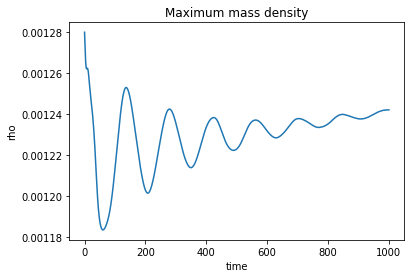

In [90]:
fig, ax = plt.subplots(1,1)
ax.plot(time, rhomax)
ax.set_title('Maximum mass density')
ax.set_xlabel('time')
ax.set_ylabel('rho')
plt.show()

Congratulations! You have setup Cactus, run your first simulations, and visualized some of the results! 

# Going Further

To learn more about Cactus, Simfactory and the Einstein Toolkit, check out these documentation pages:
- http://simfactory.org/info/documentation/userguide/index.html
- http://einsteintoolkit.org/documentation.html

Here are some articles that give an overview of the Cactus framework, Simfactory, and the Einstein Toolkit: 
- https://arxiv.org/abs/1008.4571
- https://arxiv.org/abs/1009.1341
- https://arxiv.org/abs/1111.3344